In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

**LIMPIEZA DE DATOS DE PRODUCCION PARA PODER INCORPORAR EN EL ANALISIS DE VENTAS**


In [ ]:
df_produccion=pd.read_excel('')

In [ ]:
df_produccion = df_produccion.add_prefix("produccion_")

In [ ]:
df_produccion.head()

produccion_Lote produccion_Fecha produccion_Proveedor  \
0           204434       2020-10-26              Moderna   
1           204434       2020-10-26              Moderna   
2           204434       2020-10-26              Moderna   
3           204434       2020-10-26              Moderna   
4           204434       2020-10-26              Moderna   

   produccion_Materia Prima  produccion_Rendimiento produccion_Producto  \
0                     120.0                  0.6925          Bloque 1Kg   
1                     120.0                  0.6925              Grande   
2                     120.0                  0.6925             100g GR   
3                     120.0                  0.6925                500g   
4                     120.0                  0.6925              Retazo   

   produccion_Cantidad  produccion_Cat. Producto  
0                13.84        FILETE CON CORTE C  
1                43.69        FILETE CON CORTE C  
2                15.90  FILETE DE TRUCHA AHUMADA  
3                 5.00  FILETE DE TRUCHA AHUMADA  
4                 0.58  RETAZO DE TRUCHA AHUMADA

In [ ]:
# Limpiar espacios al inicio y final de todas las categorías
df_produccion['produccion_Cat. Producto'] = df_produccion['produccion_Cat. Producto'].str.strip()
print(df_produccion['produccion_Cat. Producto'].unique())

['FILETE CON CORTE C' 'FILETE DE TRUCHA AHUMADA'
 'RETAZO DE TRUCHA AHUMADA' 'OVAS' 'PORCIONADO FILETE CORTE C'
 'TRUCHA ENTERA']


In [ ]:
#Se eliminan los productos que no son de interes en ventas o inventario.
categorias_eliminar = ['TRUCHA ENTERA',  'OVAS'
 ,'RETAZO DE TRUCHA AHUMADA']
df_produccion = df_produccion[~df_produccion['produccion_Cat. Producto'].isin(categorias_eliminar)]

# Verificar
print(df_produccion['produccion_Cat. Producto'].unique())

['FILETE CON CORTE C' 'FILETE DE TRUCHA AHUMADA'
 'PORCIONADO FILETE CORTE C']


In [ ]:
df_produccion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 0 to 1148
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   produccion_Lote           1022 non-null   int64         
 1   produccion_Fecha          1022 non-null   datetime64[ns]
 2   produccion_Proveedor      1022 non-null   object        
 3   produccion_Materia Prima  1022 non-null   float64       
 4   produccion_Rendimiento    1022 non-null   float64       
 5   produccion_Producto       1022 non-null   object        
 6   produccion_Cantidad       1022 non-null   float64       
 7   produccion_Cat. Producto  1022 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 71.9+ KB


**LIMPIEZA DE DATOS**

In [ ]:
df_ventasFAC=pd.read_excel('/content/drive/MyDrive/Capstone/GM VENTAS FAC_sept2025.xlsx')

In [ ]:
df_ventasFAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Fecha                    6309 non-null   datetime64[ns]
 1   Año                      6309 non-null   int64         
 2   Mes                      6309 non-null   int64         
 3   Tipo Registro            6309 non-null   object        
 4   Tipo Documento           6309 non-null   object        
 5   # Documento              6309 non-null   object        
 6   Autorización             6237 non-null   object        
 7   Persona                  6309 non-null   object        
 8   Identificación           6309 non-null   int64         
 9   Campo 1                  0 non-null      float64       
 10  Campo 2                  0 non-null      float64       
 11  Campo 3                  0 non-null      float64       
 12  Campo 4                  0 non-nul

In [ ]:
# Crear copia
df_ventasFAC_limpio = df_ventasFAC.copy()

In [ ]:
df_ventasFAC_limpio = df_ventasFAC_limpio[['Fecha', 'Nombre', 'Cat. Producto', 'Cantidad', 'Precio', '% Descuento', 'Total', 'Estado']]

In [ ]:
df_ventasFAC_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          6309 non-null   datetime64[ns]
 1   Nombre         6309 non-null   object        
 2   Cat. Producto  6236 non-null   object        
 3   Cantidad       6309 non-null   float64       
 4   Precio         6309 non-null   float64       
 5   % Descuento    6309 non-null   float64       
 6   Total          6309 non-null   float64       
 7   Estado         6309 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 394.4+ KB


In [ ]:
#Primero verificamos que son los blancos en Cat.Producto
# Ver las filas donde Cat. Producto está vacío
df_ventasFAC_limpio[df_ventasFAC_limpio['Cat. Producto'].isna()]


Fecha                              Nombre Cat. Producto  Cantidad  \
1305 2022-07-05  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
1421 2022-08-11  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
1528 2022-09-12           Devoluciones sobre Ventas           NaN       1.0   
2051 2023-03-09  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
2082 2023-03-15  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
...         ...                                 ...           ...       ...   
6187 2025-09-08  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
6188 2025-09-08  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
6189 2025-09-08  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
6190 2025-09-08  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   
6191 2025-09-08  Rebaja y/o Descuentos sobre Ventas           NaN       1.0   

      Precio  % Descuento   Total   Estado  
1305   55.00          0.0   55.00   Pagado  
1421   68.00          0.0   76.16   Pagado  
1528  140.30          0.0  157.14   Pagado  
2051  173.89          0.0  173.89   Pagado  
2082   34.54          0.0   34.54   Pagado  
...      ...          ...     ...      ...  
6187   26.12          0.0   26.12   Pagado  
6188  115.60          0.0  115.60   Pagado  
6189   26.12          0.0   30.04  Anulado  
6190   54.30          0.0   54.30   Pagado  
6191  724.00          7.5  669.70  Anulado  

[73 rows x 8 columns]

In [ ]:
#Las filas que estan en blanco Cat. Producto son movimientos contables y no afectan en cantidades de venta de prodcuto, Se van a eliminar.
# Eliminar ambos: NaN y cadenas vacías
df_ventasFAC_limpio = df_ventasFAC_limpio[df_ventasFAC_limpio['Cat. Producto'].notna() & (df_ventasFAC_limpio['Cat. Producto'] != '')]

In [ ]:
 print(df_ventasFAC_limpio['Cat. Producto'].unique())

['FILETE DE TRUCHA AHUMADA ' 'FILETE CON CORTE C ' 'TRUCHA ENTERA '
 'ENVIOS DE PRODUCTOS' 'PORCIONADO FILETE CORTE C ' 'OVAS'
 'FILETEO PAICHE' 'DIP Trucha Ahumada' 'RETAZO DE TRUCHA AHUMADA '
 'SERVICIOS CONTRATADOS']


In [ ]:
# Limpiar espacios al inicio y final de todas las categorías
df_ventasFAC_limpio['Cat. Producto'] = df_ventasFAC_limpio['Cat. Producto'].str.strip()

In [ ]:
 print(df_ventasFAC_limpio['Cat. Producto'].unique())

['FILETE DE TRUCHA AHUMADA' 'FILETE CON CORTE C' 'TRUCHA ENTERA'
 'ENVIOS DE PRODUCTOS' 'PORCIONADO FILETE CORTE C' 'OVAS' 'FILETEO PAICHE'
 'DIP Trucha Ahumada' 'RETAZO DE TRUCHA AHUMADA' 'SERVICIOS CONTRATADOS']


In [ ]:
#Se eliminan los productos que no son de interes en ventas o inventario.
categorias_eliminar = ['DIP Trucha Ahumada', 'OVAS', 'ENVIOS DE PRODUCTOS',
                       'SERVICIOS CONTRATADOS', 'RETAZO DE TRUCHA AHUMADA',
                       'FILETEO PAICHE', 'TRUCHA ENTERA']
df_ventasFAC_limpio = df_ventasFAC_limpio[~df_ventasFAC_limpio['Cat. Producto'].isin(categorias_eliminar)]

# Verificar
print(df_ventasFAC_limpio['Cat. Producto'].unique())

['FILETE DE TRUCHA AHUMADA' 'FILETE CON CORTE C'
 'PORCIONADO FILETE CORTE C']


In [ ]:
df_ventasFAC_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5146 entries, 0 to 6308
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          5146 non-null   datetime64[ns]
 1   Nombre         5146 non-null   object        
 2   Cat. Producto  5146 non-null   object        
 3   Cantidad       5146 non-null   float64       
 4   Precio         5146 non-null   float64       
 5   % Descuento    5146 non-null   float64       
 6   Total          5146 non-null   float64       
 7   Estado         5146 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 361.8+ KB


In [ ]:
#Se va a verificar los estados de las facturaciones ya que nos interesan las que se han cobrado y pendientes. Pagado hace referencia a devoluciones, Anulado son correcciones de las facturas por que vamos a eliminar pagado y anulado.
print(df_ventasFAC_limpio['Estado'].value_counts())

Estado
Cobrado      4893
Pendiente     154
Anulado        98
Pagado          1
Name: count, dtype: int64


In [ ]:
# Estados a eliminar
estados_eliminar = ['Anulado', 'Pagado']

# Filtrar el dataframe
df_ventasFAC_limpio = df_ventasFAC_limpio[~df_ventasFAC_limpio['Estado'].isin(estados_eliminar)]

# Verificar
print(df_ventasFAC_limpio['Estado'].value_counts())

Estado
Cobrado      4893
Pendiente     154
Name: count, dtype: int64


In [ ]:
df_ventasFAC_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5047 entries, 0 to 6308
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          5047 non-null   datetime64[ns]
 1   Nombre         5047 non-null   object        
 2   Cat. Producto  5047 non-null   object        
 3   Cantidad       5047 non-null   float64       
 4   Precio         5047 non-null   float64       
 5   % Descuento    5047 non-null   float64       
 6   Total          5047 non-null   float64       
 7   Estado         5047 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 354.9+ KB


In [ ]:
# Convertir la columna Fecha a tipo datetime
df_ventasFAC_limpio['Fecha'] = pd.to_datetime(df_ventasFAC_limpio['Fecha'])

In [ ]:
df_ventasFAC_limpio = df_ventasFAC_limpio.add_prefix("ventas_")

In [ ]:
df_ventasFAC_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5047 entries, 0 to 6308
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ventas_Fecha          5047 non-null   datetime64[ns]
 1   ventas_Nombre         5047 non-null   object        
 2   ventas_Cat. Producto  5047 non-null   object        
 3   ventas_Cantidad       5047 non-null   float64       
 4   ventas_Precio         5047 non-null   float64       
 5   ventas_% Descuento    5047 non-null   float64       
 6   ventas_Total          5047 non-null   float64       
 7   ventas_Estado         5047 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 354.9+ KB


**DEFINICIÓN DE DATA FRAME A ANALIZAR**



In [ ]:
#Ahora que tenemos solo los valores que necesitamos y las categorías de interes, se va analizar.
df_ventasFAC_limpio.describe(include='number')

ventas_Cantidad  ventas_Precio  ventas_% Descuento  ventas_Total
count      5047.000000    5047.000000         5047.000000   5047.000000
mean          7.591694      15.678863            0.956212     86.557551
std          21.725929       6.790153            8.411712    201.633061
min           0.100000       0.710000            0.000000      0.000000
25%           0.530000      10.600000            0.000000     10.940000
50%           1.600000      12.000000            0.000000     26.450000
75%           5.000000      23.000000            0.000000     67.180000
max         271.110000      38.500000          100.000000   2439.990000

In [ ]:
df_ventasFAC_limpio.head()

ventas_Fecha              ventas_Nombre      ventas_Cat. Producto  \
0   2021-01-04       Ahumado 100gr granel  FILETE DE TRUCHA AHUMADA   
1   2021-01-05  Filete corte C bloque 1kg        FILETE CON CORTE C   
2   2021-01-08          Kg. Ahumado 500gr  FILETE DE TRUCHA AHUMADA   
3   2021-01-08       Ahumado 100gr granel  FILETE DE TRUCHA AHUMADA   
4   2021-01-08  Filete corte C Individual        FILETE CON CORTE C   

   ventas_Cantidad  ventas_Precio  ventas_% Descuento  ventas_Total  \
0             1.00           23.0                 0.0         25.76   
1            25.72            9.0                 0.0        231.48   
2             5.00           22.0                 0.0        123.20   
3             5.00           23.0                 0.0        128.80   
4             2.42           10.6                 0.0         25.65   

  ventas_Estado  
0       Cobrado  
1       Cobrado  
2       Cobrado  
3       Cobrado  
4       Cobrado

**AÑADIR FERIADOS**

In [ ]:
import pandas as pd

# Diccionario completo de feriados de Ecuador 2021-2025
feriados_ecuador = {
    # 2021
    '2021-01-01': 'Año Nuevo',
    '2021-02-15': 'Carnaval',
    '2021-02-16': 'Martes de Carnaval',
    '2021-04-02': 'Viernes Santo',
    '2021-04-30': 'Día del Trabajo',
    '2021-05-24': 'Batalla de Pichincha',
    '2021-08-09': 'Primer Grito de Independencia',
    '2021-10-08': 'Independencia de Guayaquil',
    '2021-11-01': 'Día de los Difuntos',
    '2021-11-05': 'Independencia de Cuenca',
    '2021-12-25': 'Navidad',

    # 2022
    '2021-12-31': 'Año Nuevo (traslado)',
    '2022-01-01': 'Año Nuevo',
    '2022-02-28': 'Carnaval',
    '2022-03-01': 'Martes de Carnaval',
    '2022-04-15': 'Viernes Santo',
    '2022-05-02': 'Día del Trabajo',
    '2022-05-23': 'Batalla de Pichincha',
    '2022-08-12': 'Primer Grito de Independencia',
    '2022-10-10': 'Independencia de Guayaquil',
    '2022-11-03': 'Día de los Difuntos',
    '2022-11-04': 'Independencia de Cuenca',
    '2022-12-26': 'Navidad (traslado)',

    # 2023
    '2023-01-02': 'Año Nuevo (traslado)',
    '2023-02-20': 'Carnaval',
    '2023-02-21': 'Martes de Carnaval',
    '2023-04-07': 'Viernes Santo',
    '2023-05-01': 'Día del Trabajo',
    '2023-05-26': 'Batalla de Pichincha',
    '2023-08-11': 'Primer Grito de Independencia',
    '2023-10-09': 'Independencia de Guayaquil',
    '2023-11-02': 'Día de los Difuntos',
    '2023-11-03': 'Independencia de Cuenca',
    '2023-12-25': 'Navidad',

    # 2024
    '2024-01-01': 'Año Nuevo',
    '2024-02-12': 'Carnaval',
    '2024-02-13': 'Martes de Carnaval',
    '2024-03-29': 'Viernes Santo',
    '2024-05-03': 'Día del Trabajo',
    '2024-05-24': 'Batalla de Pichincha',
    '2024-08-09': 'Primer Grito de Independencia',
    '2024-10-11': 'Independencia de Guayaquil',
    '2024-11-01': 'Día de los Difuntos',
    '2024-11-04': 'Independencia de Cuenca',
    '2024-12-25': 'Navidad',

    # 2025
    '2025-01-01': 'Año Nuevo',
    '2025-03-03': 'Carnaval',
    '2025-03-04': 'Martes de Carnaval',
    '2025-04-18': 'Viernes Santo',
    '2025-05-02': 'Día del Trabajo',
    '2025-05-23': 'Batalla de Pichincha',
    '2025-08-11': 'Primer Grito de Independencia',
    '2025-10-10': 'Independencia de Guayaquil',
    '2025-11-02': 'Día de los Difuntos',
    '2025-11-03': 'Independencia de Cuenca',
    '2025-12-25': 'Navidad'
}

# === 1️⃣ Preparación de feriados ===
# Convertir fechas a datetime
feriados_ec_dict = {pd.to_datetime(fecha): nombre for fecha, nombre in feriados_ecuador.items()}
fechas_feriados = pd.Series(list(feriados_ec_dict.keys()))

# === 2️⃣ Calcular la semana (lunes como inicio de semana) ===
df_ventasFAC_limpio['Semana'] = df_ventasFAC_limpio['ventas_Fecha'] - pd.to_timedelta(
    df_ventasFAC_limpio['ventas_Fecha'].dt.weekday, unit='D'
)

# === 3️⃣ Determinar las semanas que contienen al menos un feriado ===
semanas_con_feriado = (
    fechas_feriados
    .map(lambda d: d - pd.Timedelta(days=d.weekday()))  # obtener el lunes de esa semana
    .drop_duplicates()
)

# === 4️⃣ Calcular semanas previas y posteriores ===
semanas_pre = semanas_con_feriado - pd.Timedelta(weeks=1)
semanas_post = semanas_con_feriado + pd.Timedelta(weeks=1)

# === 5️⃣ Inicializar columnas ===
df_ventasFAC_limpio['Es_Feriado'] = 0
df_ventasFAC_limpio['Pre_Feriado'] = 0
df_ventasFAC_limpio['Post_Feriado'] = 0

# === 6️⃣ Marcar semanas ===
# Semanas con feriado
df_ventasFAC_limpio.loc[df_ventasFAC_limpio['Semana'].isin(semanas_con_feriado), 'Es_Feriado'] = 1

# Semanas pre-feriado (si no es feriado)
df_ventasFAC_limpio.loc[
    (df_ventasFAC_limpio['Semana'].isin(semanas_pre)) &
    (df_ventasFAC_limpio['Es_Feriado'] == 0),
    'Pre_Feriado'
] = 1

# Semanas post-feriado (si no es feriado ni pre-feriado)
df_ventasFAC_limpio.loc[
    (df_ventasFAC_limpio['Semana'].isin(semanas_post)) &
    (df_ventasFAC_limpio['Es_Feriado'] == 0) &
    (df_ventasFAC_limpio['Pre_Feriado'] == 0),
    'Post_Feriado'
] = 1

# === 7️⃣ Nombre del feriado (solo para el día exacto, opcional) ===
df_ventasFAC_limpio['Nombre_Feriado'] = df_ventasFAC_limpio['ventas_Fecha'].map(feriados_ec_dict).fillna('')

# === 8️⃣ Reporte de validación ===
print("=== RESUMEN DE FERIADOS (POR SEMANA) ===")
print(f"Total de feriados únicos definidos: {len(feriados_ecuador)}")
print(f"  - Semanas con feriado: {df_ventasFAC_limpio['Es_Feriado'].sum()}")
print(f"  - Semanas pre-feriado: {df_ventasFAC_limpio['Pre_Feriado'].sum()}")
print(f"  - Semanas post-feriado: {df_ventasFAC_limpio['Post_Feriado'].sum()}")
print(f"  - Semanas normales: {((df_ventasFAC_limpio['Es_Feriado'] == 0) & (df_ventasFAC_limpio['Pre_Feriado'] == 0) & (df_ventasFAC_limpio['Post_Feriado'] == 0)).sum()}")

# === 9️⃣ Ejemplos de cada tipo ===
print("\n=== SEMANAS CON FERIADO ===")
feriados_en_datos = df_ventasFAC_limpio[df_ventasFAC_limpio['Es_Feriado'] == 1][['Semana']].drop_duplicates().sort_values('Semana')
print(feriados_en_datos.to_string(index=False))

print("\n=== SEMANAS PRE-FERIADO ===")
ejemplos_pre = df_ventasFAC_limpio[df_ventasFAC_limpio['Pre_Feriado'] == 1][['ventas_Fecha', 'Semana']].drop_duplicates('Semana').sort_values('Semana').head(10)
print(ejemplos_pre.to_string(index=False))

print("\n=== SEMANAS POST-FERIADO ===")
ejemplos_post = df_ventasFAC_limpio[df_ventasFAC_limpio['Post_Feriado'] == 1][['ventas_Fecha', 'Semana']].drop_duplicates('Semana').sort_values('Semana').head(10)
print(ejemplos_post.to_string(index=False))

print("\n=== ESTRUCTURA FINAL DEL DATAFRAME ===")
print(df_ventasFAC_limpio.info())


=== RESUMEN DE FERIADOS (POR SEMANA) ===
Total de feriados únicos definidos: 56
  - Semanas con feriado: 694
  - Semanas pre-feriado: 824
  - Semanas post-feriado: 798
  - Semanas normales: 2731

=== SEMANAS CON FERIADO ===
    Semana
2021-02-15
2021-03-29
2021-04-26
2021-05-24
2021-08-09
2021-10-04
2021-11-01
2021-12-20
2021-12-27
2022-02-28
2022-04-11
2022-05-02
2022-05-23
2022-08-08
2022-10-10
2022-10-31
2022-12-26
2023-01-02
2023-02-20
2023-04-03
2023-05-01
2023-05-22
2023-08-07
2023-10-09
2023-10-30
2023-12-25
2024-01-01
2024-02-12
2024-03-25
2024-04-29
2024-05-20
2024-08-05
2024-10-07
2024-10-28
2024-11-04
2024-12-23
2025-03-03
2025-04-14
2025-04-28
2025-05-19
2025-08-11

=== SEMANAS PRE-FERIADO ===
ventas_Fecha     Semana
  2021-02-10 2021-02-08
  2021-03-23 2021-03-22
  2021-04-19 2021-04-19
  2021-05-17 2021-05-17
  2021-08-04 2021-08-02
  2021-09-27 2021-09-27
  2021-10-25 2021-10-25
  2021-12-13 2021-12-13
  2022-02-21 2022-02-21
  2022-04-04 2022-04-04

=== SEMANAS POST-FER

**GENERAR INVENTARIO DE LA BASE DE DATOS DE PRODUCCION Y AÑADIR A LA BASE DE DATOS DE VENTAS**

In [ ]:
df_ventasFAC_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5047 entries, 0 to 6308
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ventas_Fecha          5047 non-null   datetime64[ns]
 1   ventas_Nombre         5047 non-null   object        
 2   ventas_Cat. Producto  5047 non-null   object        
 3   ventas_Cantidad       5047 non-null   float64       
 4   ventas_Precio         5047 non-null   float64       
 5   ventas_% Descuento    5047 non-null   float64       
 6   ventas_Total          5047 non-null   float64       
 7   ventas_Estado         5047 non-null   object        
 8   Semana                5047 non-null   datetime64[ns]
 9   Es_Feriado            5047 non-null   int64         
 10  Pre_Feriado           5047 non-null   int64         
 11  Post_Feriado          5047 non-null   int64         
 12  Nombre_Feriado        5047 non-null   object        
dtypes: datetime64[ns](2), f

In [ ]:

# Extraer df_produccion con Año_Semana
df_produccion['Año'] = df_produccion['produccion_Fecha'].dt.isocalendar().year
df_produccion['Semana'] = df_produccion['produccion_Fecha'].dt.isocalendar().week
df_produccion['Año_Semana'] = df_produccion['Año'].astype(str) + '-' + df_produccion['Semana'].astype(str).str.zfill(2)

# Añadir las mismas a ventas (ya tienes estas columnas, pero por si acaso)
df_ventasFAC_limpio['ventas_Año'] = df_ventasFAC_limpio['ventas_Fecha'].dt.year
df_ventasFAC_limpio['ventas_Semana'] = df_ventasFAC_limpio['ventas_Fecha'].dt.isocalendar().week
df_ventasFAC_limpio['Año_Semana'] = df_ventasFAC_limpio['ventas_Año'].astype(str) + '-' + df_ventasFAC_limpio['ventas_Semana'].astype(str).str.zfill(2)

# FILTRAR: Solo 2021-2025
df_produccion_filtrado = df_produccion[df_produccion['Año'].between(2021, 2025)].copy()
df_ventasFAC_filtrado = df_ventasFAC_limpio[df_ventasFAC_limpio['ventas_Año'].between(2021, 2025)].copy()

# Agregar producción por semana y categoría
produccion_semanal = df_produccion_filtrado.groupby(['Año_Semana', 'produccion_Cat. Producto']).agg({
    'produccion_Cantidad': 'sum',
    'produccion_Fecha': 'min'
}).reset_index()
produccion_semanal.columns = ['Año_Semana', 'Categoria', 'Cantidad_Producida', 'Fecha']

# Agregar ventas por semana y categoría (INCLUYENDO VARIABLES DE FERIADOS)
ventas_semanal = df_ventasFAC_filtrado.groupby(['Año_Semana', 'ventas_Cat. Producto']).agg({
    'ventas_Cantidad': 'sum',
    'ventas_Precio': 'mean',
    'ventas_Total': 'sum',
    'Es_Feriado': 'max',           # Si hay al menos 1 día feriado en la semana
    'Pre_Feriado': 'max',          # Si hay al menos 1 día pre-feriado
    'Post_Feriado': 'max',         # Si hay al menos 1 día post-feriado
    'ventas_Fecha': 'min'
}).reset_index()

ventas_semanal.columns = ['Año_Semana', 'Categoria', 'Cantidad_Vendida', 'Precio_Promedio',
                          'Ventas_Total', 'Es_Feriado', 'Pre_Feriado', 'Post_Feriado', 'Fecha_Venta']



In [ ]:
# Crear df_analisis con la unión de los dos data frames
df_analisis = pd.merge(
    produccion_semanal,
    ventas_semanal,
    on=['Año_Semana', 'Categoria'],
    how='outer'
)

# Rellenar NaN con 0 para cantidades
df_analisis['Cantidad_Producida'] = df_analisis['Cantidad_Producida'].fillna(0)
df_analisis['Cantidad_Vendida'] = df_analisis['Cantidad_Vendida'].fillna(0)
df_analisis['Ventas_Total'] = df_analisis['Ventas_Total'].fillna(0)
df_analisis['Es_Feriado'] = df_analisis['Es_Feriado'].fillna(0).astype(int)
df_analisis['Pre_Feriado'] = df_analisis['Pre_Feriado'].fillna(0).astype(int)
df_analisis['Post_Feriado'] = df_analisis['Post_Feriado'].fillna(0).astype(int)

# Usar Fecha de producción o venta (la que exista)
df_analisis['Fecha'] = df_analisis['Fecha'].fillna(df_analisis['Fecha_Venta'])
df_analisis['Fecha'] = pd.to_datetime(df_analisis['Fecha'])

# Extraer Año y Semana_Num
df_analisis['Año'] = df_analisis['Fecha'].dt.year
df_analisis['Semana_Num'] = df_analisis['Fecha'].dt.isocalendar().week

# Ordenar por categoría, año y semana
df_analisis = df_analisis.sort_values(['Categoria', 'Año', 'Semana_Num']).reset_index(drop=True)

# Rellenar precios promedios
df_analisis['Precio_Promedio'] = df_analisis.groupby(['Año', 'Categoria'])['Precio_Promedio'].ffill()
df_analisis['Precio_Promedio'] = df_analisis.groupby(['Año', 'Categoria'])['Precio_Promedio'].bfill()
precio_promedio_anual = df_analisis.groupby(['Año', 'Categoria'])['Precio_Promedio'].transform('mean')
df_analisis['Precio_Promedio'] = df_analisis['Precio_Promedio'].fillna(precio_promedio_anual)

print("\n VERIFICACIÓN DE PRECIOS")
print(f"Precios nulos restantes: {df_analisis['Precio_Promedio'].isnull().sum()}")




 VERIFICACIÓN DE PRECIOS
Precios nulos restantes: 0


In [ ]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          656 non-null    object        
 1   Categoria           656 non-null    object        
 2   Cantidad_Producida  656 non-null    float64       
 3   Fecha               656 non-null    datetime64[ns]
 4   Cantidad_Vendida    656 non-null    float64       
 5   Precio_Promedio     656 non-null    float64       
 6   Ventas_Total        656 non-null    float64       
 7   Es_Feriado          656 non-null    int64         
 8   Pre_Feriado         656 non-null    int64         
 9   Post_Feriado        656 non-null    int64         
 10  Fecha_Venta         643 non-null    datetime64[ns]
 11  Año                 656 non-null    int32         
 12  Semana_Num          656 non-null    UInt32        
dtypes: UInt32(1), datetime64[ns](2), float64(4), int32

In [ ]:
# INVENTARIO INICIAL AJUSTADO CON MERMAS
inventario_inicial = {
    'FILETE CON CORTE C': 651.63,
    'FILETE DE TRUCHA AHUMADA': 172.03,
    'PORCIONADO FILETE CORTE C': 57.68,
}

mermas_por_categoria = {
    'FILETE CON CORTE C': 0.03,  # 3%
    'FILETE DE TRUCHA AHUMADA': 0.02,  # 2%
    'PORCIONADO FILETE CORTE C': 0.05,  # 5%
}

# Calcular mermas por congelación/descongelación
df_analisis['Mermas'] = df_analisis.apply(
    lambda row: row['Cantidad_Producida'] * mermas_por_categoria.get(row['Categoria'], 0.03),
    axis=1
)

# CALCULAR INVENTARIO (acumulativo por categoría con inventario inicial y mermas)
df_analisis['Inventario'] = 0.0

for categoria in df_analisis['Categoria'].unique():
    mask = df_analisis['Categoria'] == categoria
    inv_inicial = inventario_inicial.get(categoria, 0.0)

    # Calcular diferencia (Producción - Mermas - Ventas)
    diferencia = (
        df_analisis.loc[mask, 'Cantidad_Producida'] -
        df_analisis.loc[mask, 'Mermas'] -
        df_analisis.loc[mask, 'Cantidad_Vendida']
    )

    df_analisis.loc[mask, 'Inventario'] = inv_inicial + diferencia.cumsum()

# Limpiar columnas auxiliares
df_analisis = df_analisis.drop(columns=['Fecha_Venta'])

# Reordenar columnas (INCLUYENDO VARIABLES DE FERIADOS)
df_analisis = df_analisis[[
    'Año_Semana', 'Año', 'Semana_Num', 'Categoria', 'Fecha',
    'Es_Feriado', 'Pre_Feriado', 'Post_Feriado',
    'Cantidad_Producida', 'Mermas', 'Cantidad_Vendida', 'Inventario',
    'Precio_Promedio', 'Ventas_Total'
]]

# Mostrar información del nuevo DataFrame
print(" DF_ANALISIS CREADO (2021-2025 CON INVENTARIO, MERMAS Y VARIABLES DE FERIADOS)")
print(df_analisis.info())

print("\n RANGO DE AÑOS")
print(f"Años únicos: {sorted(df_analisis['Año'].unique())}")
print(f"Rango de fechas: {df_analisis['Fecha'].min()} a {df_analisis['Fecha'].max()}")

print("\nINVENTARIO INICIAL APLICADO")
for cat, inv in inventario_inicial.items():
    primera_semana = df_analisis[df_analisis['Categoria'] == cat].iloc[0] if cat in df_analisis['Categoria'].values else None
    if primera_semana is not None:
        print(f"{cat}: {inv} kg")
        print(f"  → Primera semana ({primera_semana['Año_Semana']}): Inventario = {primera_semana['Inventario']:.2f} kg")

print("\n RESUMEN DE MERMAS POR CATEGORÍA")
print(df_analisis.groupby('Categoria')['Mermas'].agg(['sum', 'mean']).round(2))

print("\n ESTADÍSTICAS DE INVENTARIO POR CATEGORÍA")
print(df_analisis.groupby('Categoria')['Inventario'].describe().round(2))

print("\n VERIFICACIÓN - Inventario negativo")
inventario_negativo = df_analisis[df_analisis['Inventario'] < 0]
if len(inventario_negativo) > 0:
    print(f" {len(inventario_negativo)} semanas con inventario negativo")
    print(inventario_negativo[['Año_Semana', 'Categoria', 'Inventario']].head(10))
else:
    print(" No hay inventarios negativos")

print("\nVERIFICACIÓN - Variables de Feriados")
print(f"Semanas con feriados: {df_analisis['Es_Feriado'].sum()}")
print(f"Semanas pre-feriado: {df_analisis['Pre_Feriado'].sum()}")
print(f"Semanas post-feriado: {df_analisis['Post_Feriado'].sum()}")

# Ver algunas semanas con feriados
print("\n EJEMPLOS DE SEMANAS CON FERIADOS:")
ejemplos_feriados = df_analisis[df_analisis['Es_Feriado'] == 1][['Año_Semana', 'Categoria', 'Es_Feriado', 'Cantidad_Vendida']].head(10)
print(ejemplos_feriados.to_string(index=False))

 DF_ANALISIS CREADO (2021-2025 CON INVENTARIO, MERMAS Y VARIABLES DE FERIADOS)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          656 non-null    object        
 1   Año                 656 non-null    int32         
 2   Semana_Num          656 non-null    UInt32        
 3   Categoria           656 non-null    object        
 4   Fecha               656 non-null    datetime64[ns]
 5   Es_Feriado          656 non-null    int64         
 6   Pre_Feriado         656 non-null    int64         
 7   Post_Feriado        656 non-null    int64         
 8   Cantidad_Producida  656 non-null    float64       
 9   Mermas              656 non-null    float64       
 10  Cantidad_Vendida    656 non-null    float64       
 11  Inventario          656 non-null    float64       
 12  Precio_Promedio     656 non

In [ ]:
df_analisis.head()

Año_Semana   Año  Semana_Num           Categoria      Fecha  Es_Feriado  \
0    2021-01  2021           1  FILETE CON CORTE C 2021-01-05           0   
1    2021-02  2021           2  FILETE CON CORTE C 2021-01-11           0   
2    2021-03  2021           3  FILETE CON CORTE C 2021-01-18           0   
3    2021-04  2021           4  FILETE CON CORTE C 2021-01-25           0   
4    2021-05  2021           5  FILETE CON CORTE C 2021-02-01           0   

   Pre_Feriado  Post_Feriado  Cantidad_Producida  Mermas  Cantidad_Vendida  \
0            0             1               72.79  2.1837             61.18   
1            0             0              193.42  5.8026             45.94   
2            0             0              143.37  4.3011            192.23   
3            0             0              196.70  5.9010            160.12   
4            0             0               47.85  1.4355            172.24   

   Inventario  Precio_Promedio  Ventas_Total  
0    661.0563        11.070000        633.40  
1    802.7337        10.838889        487.91  
2    749.5726         9.950000       1792.29  
3    780.2516        13.063636       1513.87  
4    654.4261        10.594444       1609.53

In [ ]:
# Descargar ambos formatos
df_analisis.to_excel('df_analisis_completo.xlsx', index=False)
df_analisis.to_csv('df_analisis_completo.csv', index=False, encoding='utf-8-sig')

print("Archivos descargados:")
print("   - df_analisis_completo.xlsx")
print("   - df_analisis_completo.csv")

Archivos descargados:
   - df_analisis_completo.xlsx
   - df_analisis_completo.csv


In [ ]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          656 non-null    object        
 1   Año                 656 non-null    int32         
 2   Semana_Num          656 non-null    UInt32        
 3   Categoria           656 non-null    object        
 4   Fecha               656 non-null    datetime64[ns]
 5   Es_Feriado          656 non-null    int64         
 6   Pre_Feriado         656 non-null    int64         
 7   Post_Feriado        656 non-null    int64         
 8   Cantidad_Producida  656 non-null    float64       
 9   Mermas              656 non-null    float64       
 10  Cantidad_Vendida    656 non-null    float64       
 11  Inventario          656 non-null    float64       
 12  Precio_Promedio     656 non-null    float64       
 13  Ventas_Total        656 non-null    float64       

/tmp/ipython-input-359458436.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analisis,
/tmp/ipython-input-359458436.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias_labels, rotation=0, ha='center', fontsize=10)


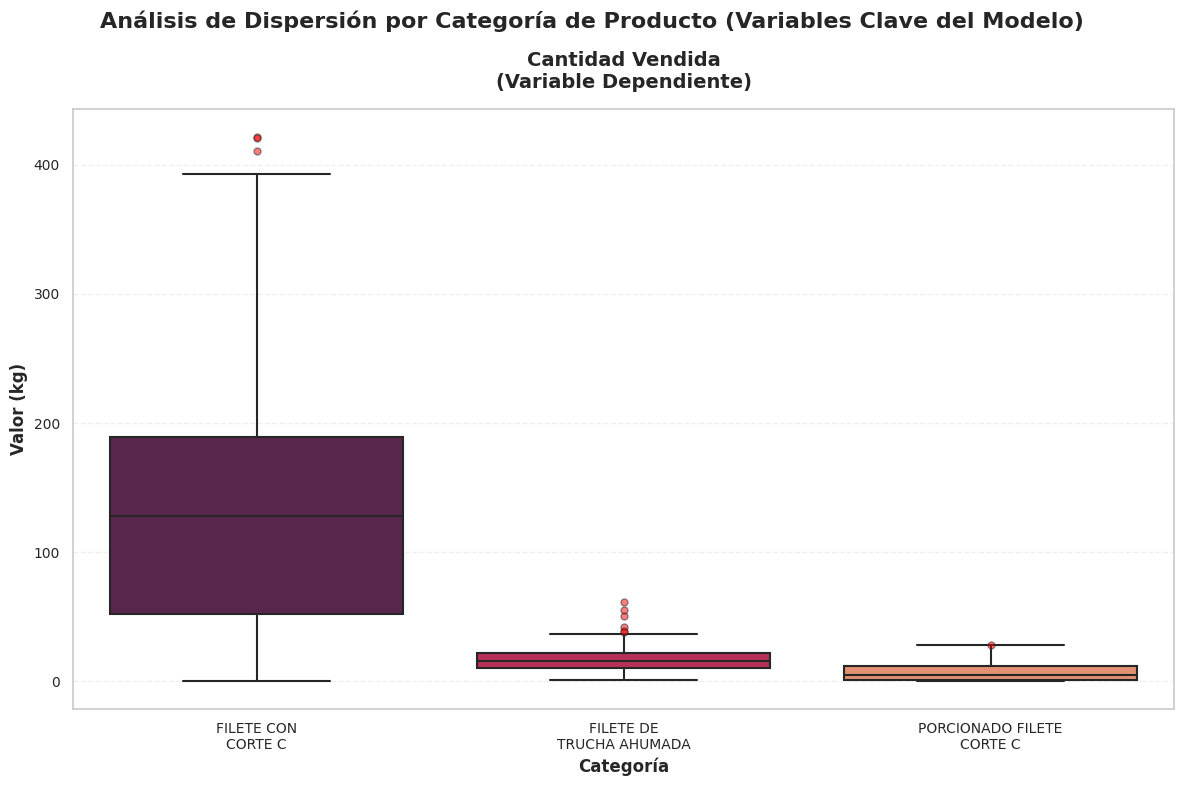

In [ ]:
# CONFIGURACIÓN GLOBAL CON PALETA ROCKET
sns.set_theme(style="whitegrid", palette="rocket")
plt.rcParams['figure.dpi'] = 100

# Obtener colores de la paleta rocket
colores_rocket = sns.color_palette("rocket", n_colors=3)

# Variables seleccionadas estratégicamente
variables_boxplot = [
    'Cantidad_Vendida',
]

# Títulos personalizados
titulos = [
    'Cantidad Vendida\n(Variable Dependiente)',
]

# Crear figura con subplots
fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle('Análisis de Dispersión por Categoría de Producto (Variables Clave del Modelo)',
             fontsize=16, fontweight='bold', y=0.98)

# Crear el boxplot
variable = variables_boxplot[0]
titulo = titulos[0]

# Boxplot con paleta rocket
sns.boxplot(data=df_analisis,
            x='Categoria',
            y=variable,
            ax=ax,
            palette='rocket',
            linewidth=1.5,
            flierprops=dict(marker='o', markerfacecolor='red',
                           markersize=5, alpha=0.5))

# Título del subplot
ax.set_title(titulo, fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Categoría', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor (kg)', fontsize=12, fontweight='bold')

# Etiquetas del eje X en horizontal con dos líneas
categorias_labels = []
for cat in df_analisis['Categoria'].unique():
    # Dividir el nombre en dos líneas si es largo
    palabras = cat.split()
    if len(palabras) > 2:
        # Dividir aproximadamente por la mitad
        mitad = len(palabras) // 2
        linea1 = ' '.join(palabras[:mitad])
        linea2 = ' '.join(palabras[mitad:])
        categorias_labels.append(f'{linea1}\n{linea2}')
    else:
        categorias_labels.append(cat)

ax.set_xticklabels(categorias_labels, rotation=0, ha='center', fontsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  # Agregado para mejor espaciado
plt.show()

Se agregan las categorias por semana debido a que el interés es en la cantidad de materia prima a comprar. Se requieren más datos para predecir las ventas por categorías y por el crecimiento grande existe mucha variabilidad.

In [ ]:
df_total = df_analisis.groupby(['Año_Semana', 'Año', 'Semana_Num']).agg({
    'Fecha': 'first',                 # Tomar la primera fecha de la semana
    'Cantidad_Producida': 'sum',      # Sumar producción de las 3 categorías
    'Mermas': 'sum',                  # Sumar mermas
    'Cantidad_Vendida': 'sum',        # Sumar ventas de las 3 categorías
    'Inventario': 'sum',              # Sumar inventario
    'Precio_Promedio': 'mean',        # Promedio de precios
    'Ventas_Total': 'sum',            # Sumar ventas totales en $
    'Es_Feriado': 'max',              # Mantener si hay feriado
    'Pre_Feriado': 'max',             # Mantener pre-feriado
    'Post_Feriado': 'max'             # Mantener post-feriado
}).reset_index()

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          247 non-null    object        
 1   Año                 247 non-null    int32         
 2   Semana_Num          247 non-null    UInt32        
 3   Fecha               247 non-null    datetime64[ns]
 4   Cantidad_Producida  247 non-null    float64       
 5   Mermas              247 non-null    float64       
 6   Cantidad_Vendida    247 non-null    float64       
 7   Inventario          247 non-null    float64       
 8   Precio_Promedio     247 non-null    float64       
 9   Ventas_Total        247 non-null    float64       
 10  Es_Feriado          247 non-null    int64         
 11  Pre_Feriado         247 non-null    int64         
 12  Post_Feriado        247 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(6), int32

In [ ]:
# Guardar como CSV
df_total.to_csv('df_total.csv', index=False, encoding='utf-8')
print("✓ Archivo guardado: df_total.csv")

✓ Archivo guardado: df_total.csv


In [ ]:
# Guardar como Excel
df_total.to_excel('df_total.xlsx', index=False, engine='openpyxl')
print("✓ Archivo guardado: df_total.xlsx")

✓ Archivo guardado: df_total.xlsx


**MEDIDAS DE DISPERSIÓN Y VARIABILIDAD**


IDENTIFICACIÓN DE OUTLIERS - Cantidad_Vendida
Q1 (25%): 68.33
Q3 (75%): 218.38
IQR: 150.05
Límite Inferior: -156.75
Límite Superior: 443.47

Outliers detectados: 4 (1.62%)
Valores normales: 243 (98.38%)


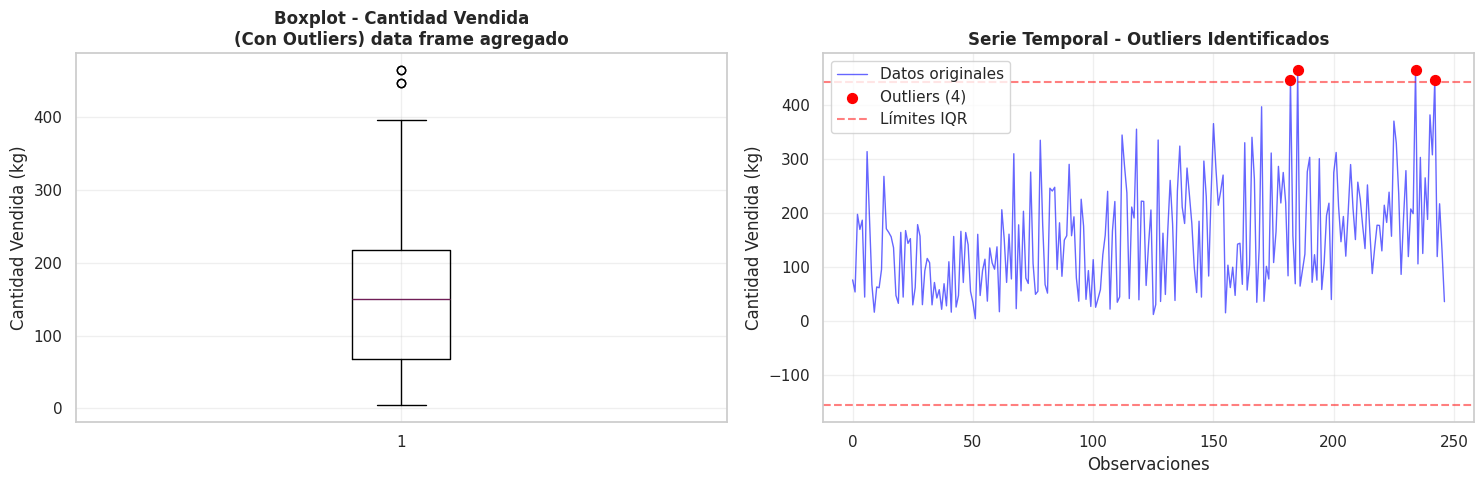

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def identificar_outliers(df, columna):
    """Identifica outliers usando el método IQR"""
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    print(f"\n{'='*70}")
    print(f"IDENTIFICACIÓN DE OUTLIERS - {columna}")
    print(f"{'='*70}")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Límite Inferior: {limite_inferior:.2f}")
    print(f"Límite Superior: {limite_superior:.2f}")
    print(f"\nOutliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"Valores normales: {len(df) - len(outliers)} ({(len(df)-len(outliers))/len(df)*100:.2f}%)")

    return outliers, limite_inferior, limite_superior

# Identificar outliers en Cantidad_Vendida
outliers, lim_inf, lim_sup = identificar_outliers(df_total, 'Cantidad_Vendida')

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot
axes[0].boxplot(df_total['Cantidad_Vendida'])
axes[0].set_title('Boxplot - Cantidad Vendida\n(Con Outliers) data frame agregado', fontweight='bold')
axes[0].set_ylabel('Cantidad Vendida (kg)')
axes[0].grid(True, alpha=0.3)

# Serie temporal con outliers marcados
axes[1].plot(df_total.index, df_total['Cantidad_Vendida'],
             linewidth=1, color='blue', alpha=0.6, label='Datos originales')
axes[1].scatter(outliers.index, outliers['Cantidad_Vendida'],
                color='red', s=50, zorder=5, label=f'Outliers ({len(outliers)})')
axes[1].axhline(y=lim_sup, color='red', linestyle='--', alpha=0.5, label='Límites IQR')
axes[1].axhline(y=lim_inf, color='red', linestyle='--', alpha=0.5)
axes[1].set_title('Serie Temporal - Outliers Identificados', fontweight='bold')
axes[1].set_xlabel('Observaciones')
axes[1].set_ylabel('Cantidad Vendida (kg)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
df_total.head()

Año_Semana   Año  Semana_Num      Fecha  Cantidad_Producida  Mermas  \
0    2021-01  2021           1 2021-01-05               72.79  2.1837   
1    2021-02  2021           2 2021-01-11              228.72  6.5086   
2    2021-03  2021           3 2021-01-18              143.37  4.3011   
3    2021-04  2021           4 2021-01-25              196.70  5.9010   
4    2021-05  2021           5 2021-02-01               81.55  2.1095   

   Cantidad_Vendida  Inventario  Precio_Promedio  Ventas_Total  Es_Feriado  \
0             75.98    818.2863        17.892143       1014.76           0   
1             53.64    986.8577        17.919444        700.60           0   
2            197.53    928.3966        16.600000       1928.03           0   
3            169.52    949.6756        18.448485       1756.24           0   
4            186.74    842.3761        17.297222       2008.81           0   

   Pre_Feriado  Post_Feriado  
0            0             1  
1            0             0  
2            0             0  
3            0             0  
4            0             0

**GRAFICO DE BARRAS**


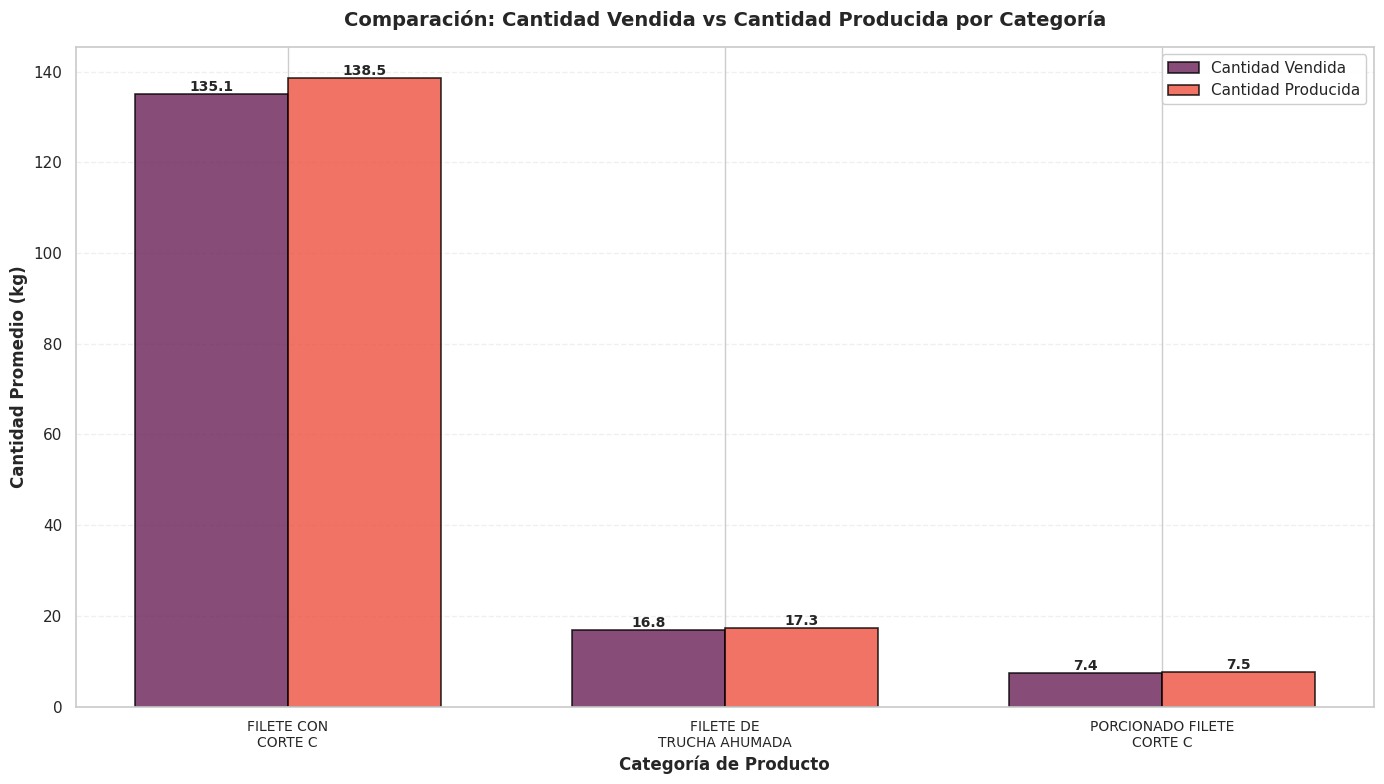

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# CONFIGURACIÓN GLOBAL CON PALETA ROCKET

sns.set_theme(style="whitegrid", palette="rocket")
plt.rcParams['figure.dpi'] = 100

# Obtener colores de la paleta rocket
colores_rocket = sns.color_palette("rocket", n_colors=10)



# GRÁFICO 3: BARRAS AGRUPADAS (CANTIDAD VENDIDA VS PRODUCIDA)

fig, ax = plt.subplots(figsize=(14, 8))

# Datos
categorias = df_analisis['Categoria'].unique()
x_pos = np.arange(len(categorias))
width = 0.35

vendida = [df_analisis[df_analisis['Categoria']==cat]['Cantidad_Vendida'].mean()
           for cat in categorias]
producida = [df_analisis[df_analisis['Categoria']==cat]['Cantidad_Producida'].mean()
             for cat in categorias]

# Barras agrupadas
bars1 = ax.bar(x_pos - width/2, vendida, width,
               label='Cantidad Vendida',
               color=colores_rocket[2], alpha=0.8,
               edgecolor='black', linewidth=1.2)

bars2 = ax.bar(x_pos + width/2, producida, width,
               label='Cantidad Producida',
               color=colores_rocket[6], alpha=0.8,
               edgecolor='black', linewidth=1.2)

# Valores encima
for i, v in enumerate(vendida):
    ax.text(i - width/2, v, f'{v:.1f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

for i, v in enumerate(producida):
    ax.text(i + width/2, v, f'{v:.1f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configuración
ax.set_title('Comparación: Cantidad Vendida vs Cantidad Producida por Categoría',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax.set_ylabel('Cantidad Promedio (kg)', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)

# Etiquetas en dos líneas
etiquetas = []
for cat in categorias:
    palabras = cat.split()
    if len(palabras) > 2:
        mitad = len(palabras) // 2
        etiquetas.append(' '.join(palabras[:mitad]) + '\n' + ' '.join(palabras[mitad:]))
    else:
        etiquetas.append(cat)

ax.set_xticklabels(etiquetas, fontsize=10)
ax.legend(fontsize=11, loc='upper right', framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('barras_vendida_vs_producida.png', dpi=300, bbox_inches='tight')
plt.show()



**WINSORIZACION**


In [ ]:
from scipy.stats import mstats

def winsorizar(df, columna, limits=(0.05, 0.05)):
    """
    Reemplaza outliers extremos con percentiles
    limits: (percentil_inferior, percentil_superior) a recortar
    """
    df_tratado = df.copy()

    # Calcular CV antes
    cv_antes = (df[columna].std() / df[columna].mean()) * 100

    # Aplicar winsorización
    df_tratado[columna] = mstats.winsorize(df[columna], limits=limits)

    # Calcular CV después
    cv_despues = (df_tratado[columna].std() / df_tratado[columna].mean()) * 100

    print(f"\n{'='*70}")
    print(f"WINSORIZACIÓN - {columna}")
    print(f"{'='*70}")
    print(f"Límites aplicados: {limits[0]*100}% inferior, {limits[1]*100}% superior")
    print(f"\nCV Antes: {cv_antes:.2f}%")
    print(f"CV Después: {cv_despues:.2f}%")
    print(f"Reducción: {cv_antes - cv_despues:.2f} puntos porcentuales ({((cv_antes-cv_despues)/cv_antes*100):.1f}%)")
    print(f"\nRegistros modificados: {(df[columna] != df_tratado[columna]).sum()}")

    return df_tratado, cv_antes, cv_despues

# Aplicar winsorización
df_winsorizado, cv_antes, cv_despues = winsorizar(df_total, 'Cantidad_Vendida', limits=(0.05, 0.05))


WINSORIZACIÓN - Cantidad_Vendida
Límites aplicados: 5.0% inferior, 5.0% superior

CV Antes: 64.62%
CV Después: 60.81%
Reducción: 3.81 puntos porcentuales (5.9%)

Registros modificados: 24


In [ ]:
import numpy as np

# Función para calcular el coeficiente de variación
def coeficiente_variacion(data):
    """Calcula el coeficiente de variación (CV = desviación estándar / media * 100)"""
    return (data.std() / data.mean()) * 100

# 1. Coeficiente de Variación por Categoría (df_analisis)
print("COEFICIENTE DE VARIACIÓN POR CATEGORÍA (df_analisis)")

cv_categorias = {}
for categoria in df_analisis['Categoria'].unique():
    datos_cat = df_analisis[df_analisis['Categoria'] == categoria]['Cantidad_Vendida']
    cv = coeficiente_variacion(datos_cat)
    cv_categorias[categoria] = cv

    print(f"\n{categoria}:")
    print(f"  Media: {datos_cat.mean():.2f} kg")
    print(f"  Desv. Estándar: {datos_cat.std():.2f} kg")
    print(f"  Coeficiente de Variación: {cv:.2f}%")

# 2. Coeficiente de Variación Total (df_total)
print("COEFICIENTE DE VARIACIÓN TOTAL (df_total)")

cv_total = coeficiente_variacion(df_total['Cantidad_Vendida'])
print(f"\n  Media: {df_total['Cantidad_Vendida'].mean():.2f} kg")
print(f"  Desv. Estándar: {df_total['Cantidad_Vendida'].std():.2f} kg")
print(f"  Coeficiente de Variación: {cv_total:.2f}%")

# 3. Comparación y Análisis
print("ANÁLISIS COMPARATIVO")

cv_promedio_categorias = np.mean(list(cv_categorias.values()))
print(f"\nCV Promedio de Categorías: {cv_promedio_categorias:.2f}%")
print(f"CV Total (Unificado): {cv_total:.2f}%")
print(f"\nReducción de Variabilidad: {cv_promedio_categorias - cv_total:.2f} puntos porcentuales")
print(f"Mejora Relativa: {((cv_promedio_categorias - cv_total) / cv_promedio_categorias * 100):.2f}%")


COEFICIENTE DE VARIACIÓN POR CATEGORÍA (df_analisis)

FILETE CON CORTE C:
  Media: 135.07 kg
  Desv. Estándar: 94.95 kg
  Coeficiente de Variación: 70.29%

FILETE DE TRUCHA AHUMADA:
  Media: 16.79 kg
  Desv. Estándar: 9.22 kg
  Coeficiente de Variación: 54.90%

PORCIONADO FILETE CORTE C:
  Media: 7.44 kg
  Desv. Estándar: 7.55 kg
  Coeficiente de Variación: 101.43%
COEFICIENTE DE VARIACIÓN TOTAL (df_total)

  Media: 155.12 kg
  Desv. Estándar: 100.24 kg
  Coeficiente de Variación: 64.62%
ANÁLISIS COMPARATIVO

CV Promedio de Categorías: 75.54%
CV Total (Unificado): 64.62%

Reducción de Variabilidad: 10.92 puntos porcentuales
Mejora Relativa: 14.46%


/tmp/ipython-input-1643975264.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data,
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


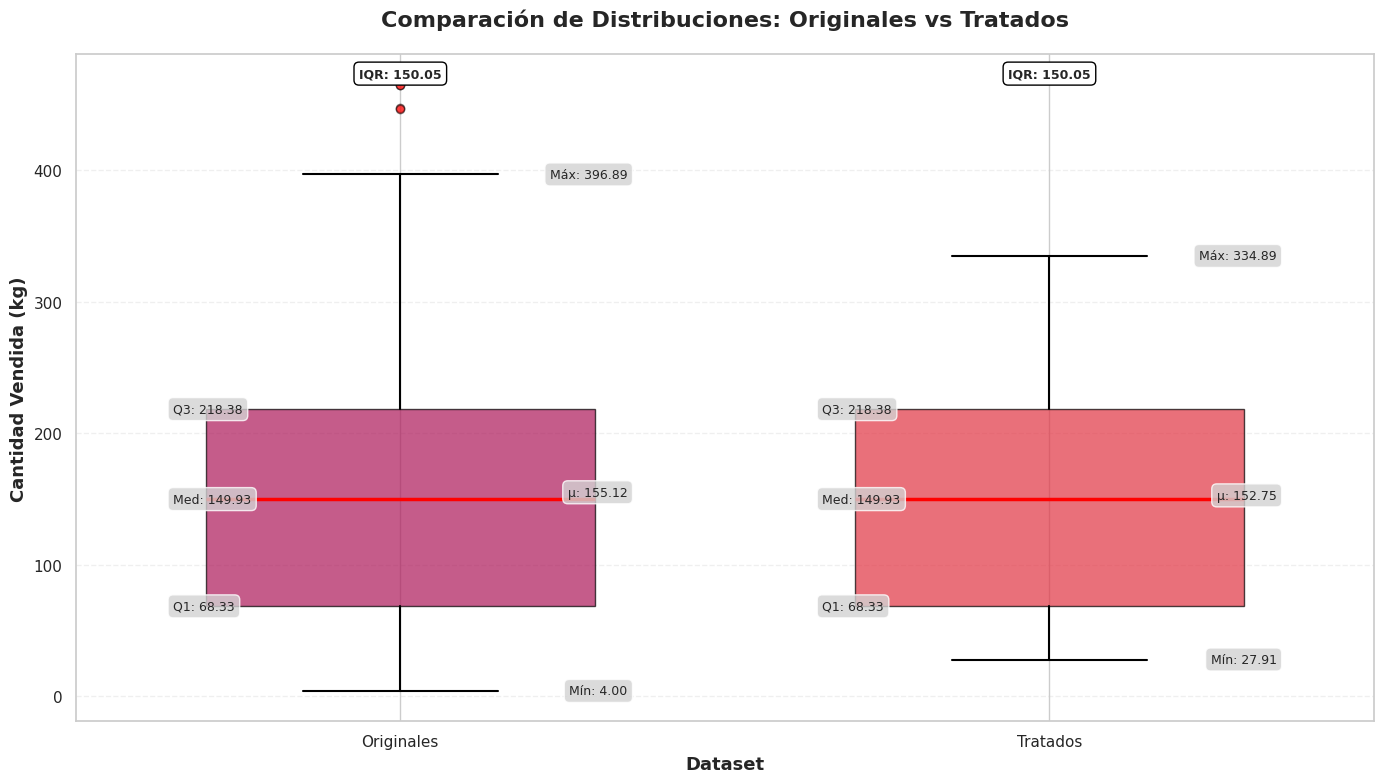

In [ ]:
# Boxplot comparativo: df_total vs df_winsorizado en los mismos ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Preparar datos para ambos boxplots
data = [df_total['Cantidad_Vendida'], df_winsorizado['Cantidad_Vendida']]
labels = ['Originales', 'Tratados']

# Crear boxplots
bp = ax.boxplot(data,
                labels=labels,
                vert=True,
                patch_artist=True,
                widths=0.6,
                medianprops=dict(color='red', linewidth=2.5),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))

# Colorear cada boxplot
colors = [sns.color_palette("rocket")[2], sns.color_palette("rocket")[3]]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Comparación de Distribuciones: Originales vs Tratados',
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Cantidad Vendida (kg)', fontsize=13, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=13, fontweight='bold')

# === ESTADÍSTICAS df_total (posición 1) ===
media1 = df_total['Cantidad_Vendida'].mean()
mediana1 = df_total['Cantidad_Vendida'].median()
q1_1 = df_total['Cantidad_Vendida'].quantile(0.25)
q3_1 = df_total['Cantidad_Vendida'].quantile(0.75)
iqr1 = q3_1 - q1_1
whisker_low1 = bp['whiskers'][0].get_ydata()[1]
whisker_high1 = bp['whiskers'][1].get_ydata()[1]

# Textos lado izquierdo (df_total)
ax.text(0.65, q3_1, f'Q3: {q3_1:.2f}', fontsize=9, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(0.65, mediana1, f'Med: {mediana1:.2f}', fontsize=9, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(0.65, q1_1, f'Q1: {q1_1:.2f}', fontsize=9, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))

# Textos lado derecho (df_total)
ax.text(1.35, media1, f'μ: {media1:.2f}', fontsize=9, ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(1.35, whisker_high1, f'Máx: {whisker_high1:.2f}', fontsize=9, ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(1.35, whisker_low1, f'Mín: {whisker_low1:.2f}', fontsize=9, ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))

# IQR arriba (df_total)
ax.text(1, ax.get_ylim()[1] * 0.98, f'IQR: {iqr1:.2f}', fontsize=9, ha='center', va='top',
        fontweight='bold', bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='black'))

# === ESTADÍSTICAS df_winsorizado (posición 2) ===
media2 = df_winsorizado['Cantidad_Vendida'].mean()
mediana2 = df_winsorizado['Cantidad_Vendida'].median()
q1_2 = df_winsorizado['Cantidad_Vendida'].quantile(0.25)
q3_2 = df_winsorizado['Cantidad_Vendida'].quantile(0.75)
iqr2 = q3_2 - q1_2
whisker_low2 = bp['whiskers'][2].get_ydata()[1]
whisker_high2 = bp['whiskers'][3].get_ydata()[1]

# Textos lado izquierdo (df_winsorizado)
ax.text(1.65, q3_2, f'Q3: {q3_2:.2f}', fontsize=9, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(1.65, mediana2, f'Med: {mediana2:.2f}', fontsize=9, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(1.65, q1_2, f'Q1: {q1_2:.2f}', fontsize=9, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))

# Textos lado derecho (df_winsorizado)
ax.text(2.35, media2, f'μ: {media2:.2f}', fontsize=9, ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(2.35, whisker_high2, f'Máx: {whisker_high2:.2f}', fontsize=9, ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))
ax.text(2.35, whisker_low2, f'Mín: {whisker_low2:.2f}', fontsize=9, ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.8))

# IQR arriba (df_winsorizado)
ax.text(2, ax.get_ylim()[1] * 0.98, f'IQR: {iqr2:.2f}', fontsize=9, ha='center', va='top',
        fontweight='bold', bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='black'))

ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('boxplot_comparacion.png', dpi=300, bbox_inches='tight')
plt.show()

**CRECIMIENTO DE VENTAS**


In [ ]:
df_winsorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          247 non-null    object        
 1   Año                 247 non-null    int32         
 2   Semana_Num          247 non-null    UInt32        
 3   Fecha               247 non-null    datetime64[ns]
 4   Cantidad_Producida  247 non-null    float64       
 5   Mermas              247 non-null    float64       
 6   Cantidad_Vendida    247 non-null    float64       
 7   Inventario          247 non-null    float64       
 8   Precio_Promedio     247 non-null    float64       
 9   Ventas_Total        247 non-null    float64       
 10  Es_Feriado          247 non-null    int64         
 11  Pre_Feriado         247 non-null    int64         
 12  Post_Feriado        247 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(6), int32

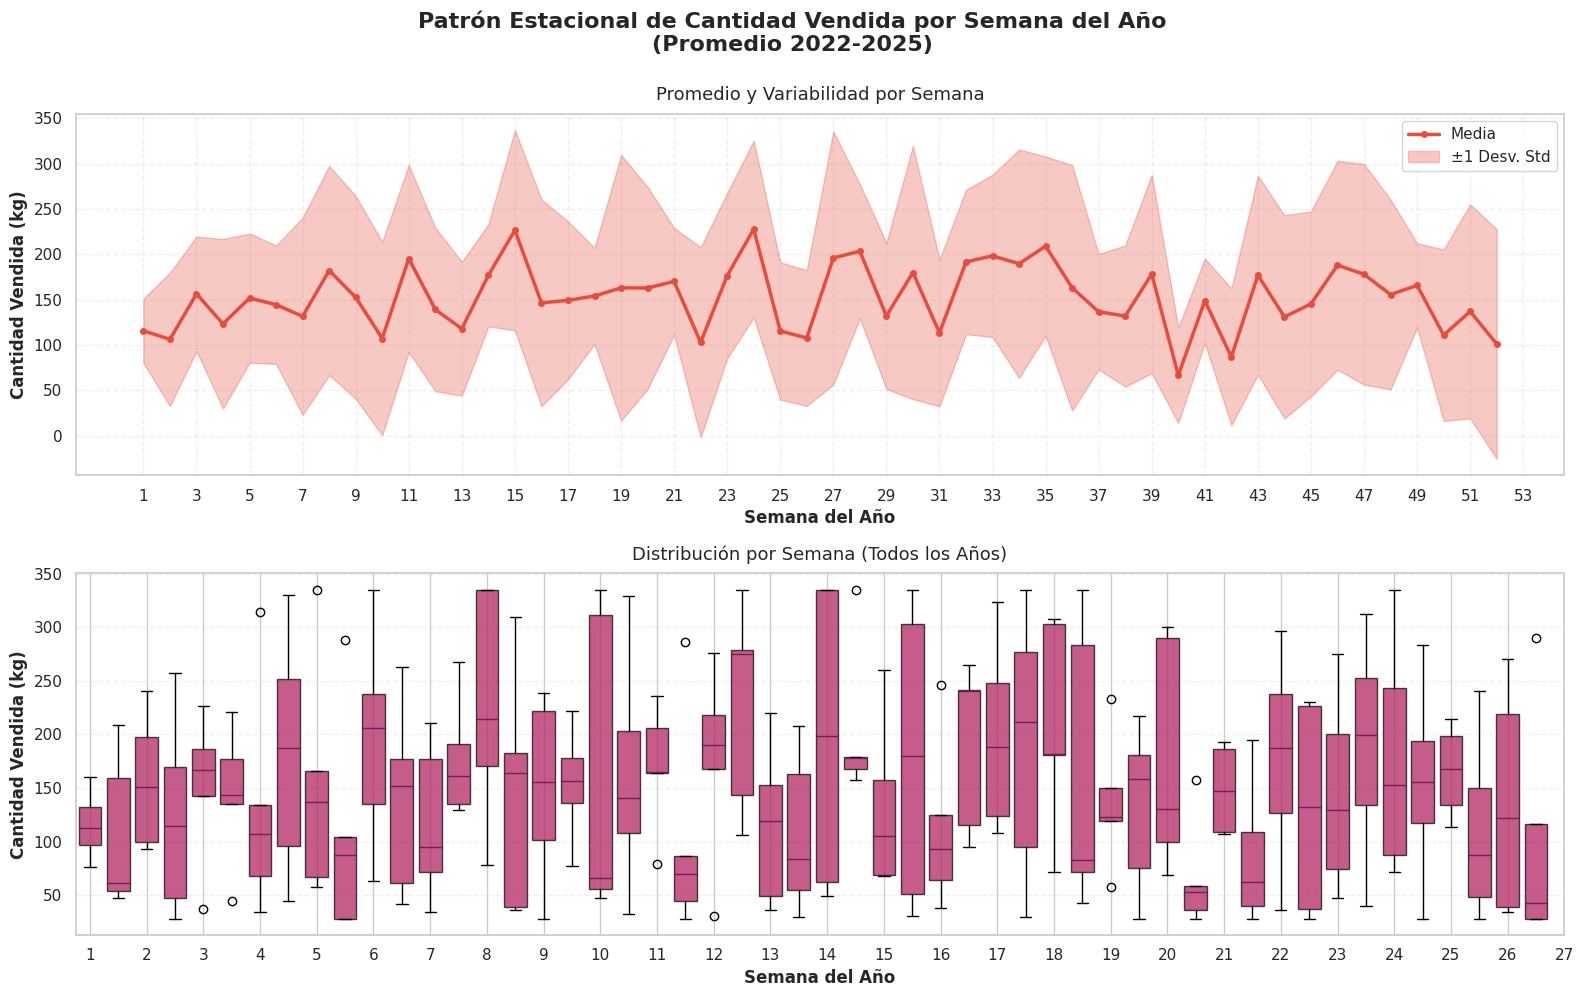

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurarte de tener la columna Semana_Num
if 'Semana_Num' not in df_winsorizado.columns:
    df_winsorizado['Semana_Num'] = df_winsorizado['Fecha'].dt.isocalendar().week

# Agrupar por semana del año (promedio de todos los años)
patron_semanal = df_winsorizado.groupby('Semana_Num')['Cantidad_Vendida'].agg([
    ('Media', 'mean'),
    ('Desv_Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).reset_index()

# Crear el gráfico
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Patrón Estacional de Cantidad Vendida por Semana del Año\n(Promedio 2022-2025)',
             fontsize=16, fontweight='bold', y=0.995)

# GRÁFICO 1: Línea con banda de confianza
axes[0].plot(patron_semanal['Semana_Num'], patron_semanal['Media'],
             linewidth=2.5, color='#e74c3c', marker='o', markersize=4, label='Media')

# Banda de confianza (±1 desviación estándar)
axes[0].fill_between(patron_semanal['Semana_Num'],
                      patron_semanal['Media'] - patron_semanal['Desv_Std'],
                      patron_semanal['Media'] + patron_semanal['Desv_Std'],
                      alpha=0.3, color='#e74c3c', label='±1 Desv. Std')

axes[0].set_xlabel('Semana del Año', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cantidad Vendida (kg)', fontsize=12, fontweight='bold')
axes[0].set_title('Promedio y Variabilidad por Semana', fontsize=13, pad=10)
axes[0].set_xticks(range(1, 54, 2))
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend(fontsize=11, loc='best')

# GRÁFICO 2: Boxplot por semana
# Crear datos para boxplot (todas las observaciones por semana)
datos_boxplot = []
semanas_boxplot = []
for semana in range(1, 53):
    datos_semana = df_winsorizado[df_winsorizado['Semana_Num'] == semana]['Cantidad_Vendida'].values
    if len(datos_semana) > 0:
        datos_boxplot.append(datos_semana)
        semanas_boxplot.append(semana)

bp = axes[1].boxplot(datos_boxplot, positions=semanas_boxplot, widths=0.8,
                      patch_artist=True, showfliers=True)

# Colorear los boxplots
for patch in bp['boxes']:
    patch.set_facecolor(sns.color_palette("rocket")[2])
    patch.set_alpha(0.7)

axes[1].set_xlabel('Semana del Año', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cantidad Vendida (kg)', fontsize=12, fontweight='bold')
axes[1].set_title('Distribución por Semana (Todos los Años)', fontsize=13, pad=10)
axes[1].set_xticks(range(1, 54, 2))
axes[1].grid(True, alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.savefig("patron_estacional_por_semana.png", dpi=300, bbox_inches='tight')
plt.show()



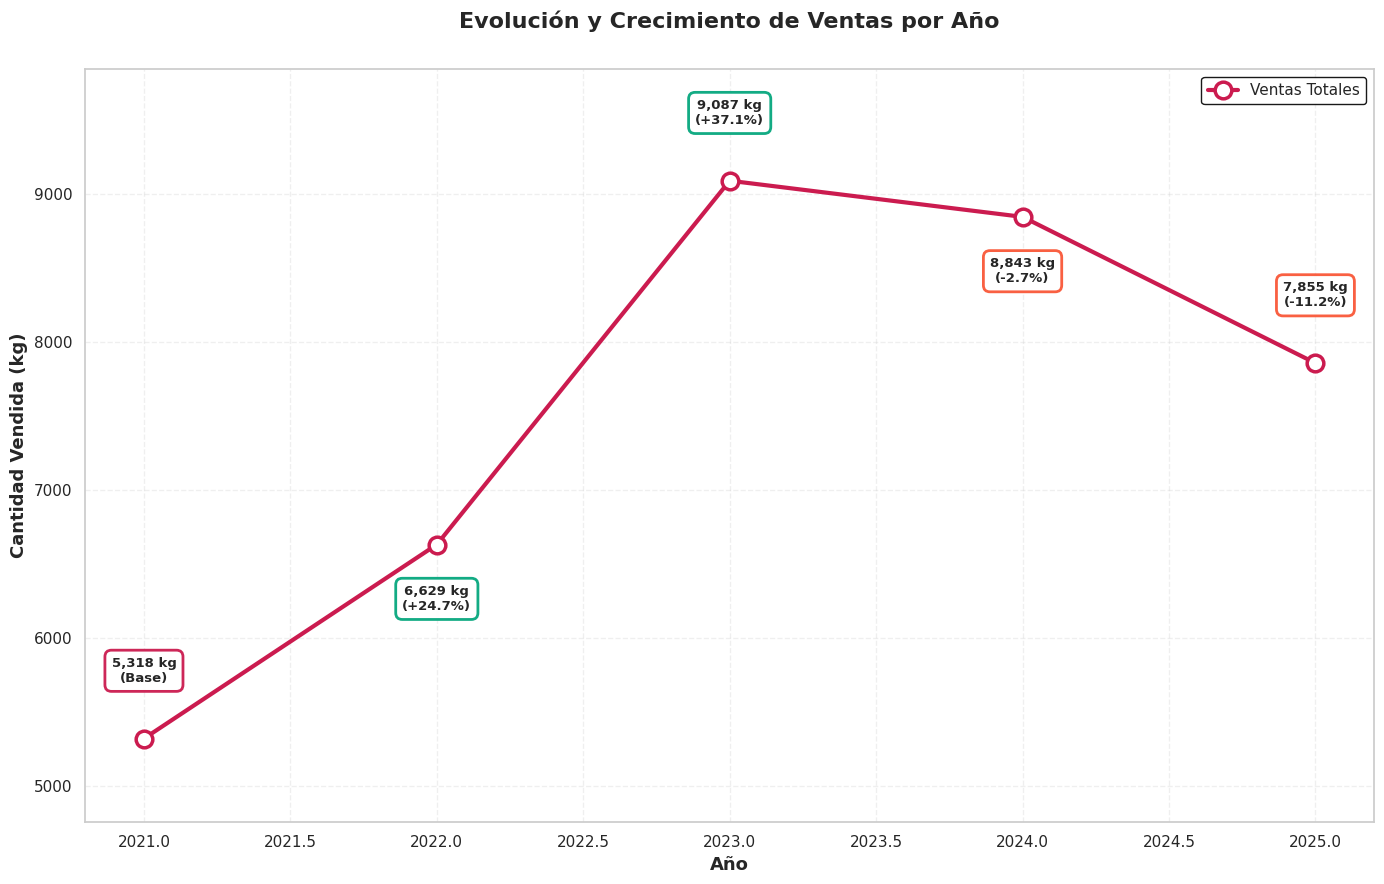

In [ ]:
import numpy as np
import seaborn as sns

# Calcular ventas por año
ventas_por_año = df_winsorizado.groupby('Año')['Cantidad_Vendida'].sum().reset_index()

# Calcular crecimiento porcentual
ventas_por_año['Crecimiento_%'] = ventas_por_año['Cantidad_Vendida'].pct_change() * 100

# Obtener colores de la paleta rocket
colores_rocket = sns.color_palette("rocket", n_colors=5)
color_principal = colores_rocket[2]  # Color medio de la paleta
color_tendencia = colores_rocket[4]  # Color más intenso para la tendencia

# Crear gráfico con más espacio vertical
plt.figure(figsize=(14, 9))

# Línea principal
plt.plot(ventas_por_año['Año'], ventas_por_año['Cantidad_Vendida'],
         marker='o', markersize=12, linewidth=3, color=color_principal,
         label='Ventas Totales', markerfacecolor='white',
         markeredgewidth=2.5, markeredgecolor=color_principal)

# Calcular el máximo y mínimo para posicionar mejor los textos
max_ventas = ventas_por_año['Cantidad_Vendida'].max()
min_ventas = ventas_por_año['Cantidad_Vendida'].min()
rango = max_ventas - min_ventas

# Agregar valores en los puntos con porcentaje de crecimiento
for i, (año, ventas, crecimiento) in enumerate(zip(ventas_por_año['Año'],
                                                     ventas_por_año['Cantidad_Vendida'],
                                                     ventas_por_año['Crecimiento_%'])):
    # Crear el texto con ventas y crecimiento
    if pd.notna(crecimiento):  # Si hay crecimiento calculado
        color_crec = '#06A77D' if crecimiento > 0 else '#F95738'
        texto = f'{ventas:,.0f} kg\n({crecimiento:+.1f}%)'
    else:  # Primer año (sin crecimiento)
        color_crec = color_principal
        texto = f'{ventas:,.0f} kg\n(Base)'

   # Alternar posición
    if i % 2 == 0:  # Posición arriba
        offset = max_ventas * 0.04
        va = 'bottom'
    else:  # Posición abajo
        offset = -max_ventas * 0.03
        va = 'top'
    plt.text(año, ventas + offset,
             texto, ha='center', va=va,
             fontsize=9.5, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                      edgecolor=color_crec, linewidth=2, alpha=0.95))

plt.title('Evolución y Crecimiento de Ventas por Año',
          fontsize=16, fontweight='bold', pad=30)
plt.xlabel('Año', fontsize=13, fontweight='bold')
plt.ylabel('Cantidad Vendida (kg)', fontsize=13, fontweight='bold')
plt.legend(fontsize=11, loc='best', framealpha=0.9, edgecolor='black')
plt.grid(True, alpha=0.3, linestyle='--')

# Ajustar límites del eje Y para dar más espacio a los textos
plt.ylim(min_ventas - rango * 0.15, max_ventas + rango * 0.2)

plt.tight_layout()
plt.savefig('evolucion_ventas_año.png', dpi=300, bbox_inches='tight')
plt.show()


**ANALISIS DE ESTACIONARIEDAD**

In [ ]:
df_winsorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          247 non-null    object        
 1   Año                 247 non-null    int32         
 2   Semana_Num          247 non-null    UInt32        
 3   Fecha               247 non-null    datetime64[ns]
 4   Cantidad_Producida  247 non-null    float64       
 5   Mermas              247 non-null    float64       
 6   Cantidad_Vendida    247 non-null    float64       
 7   Inventario          247 non-null    float64       
 8   Precio_Promedio     247 non-null    float64       
 9   Ventas_Total        247 non-null    float64       
 10  Es_Feriado          247 non-null    int64         
 11  Pre_Feriado         247 non-null    int64         
 12  Post_Feriado        247 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(6), int32

In [ ]:
# Código para verificar solo Cantidad_Vendida
from statsmodels.tsa.stattools import adfuller

def test_estacionariedad_simple(serie, nombre):
    resultado = adfuller(serie.dropna(), autolag='AIC')
    return {
        'Variable': nombre,
        'Estadístico ADF': round(resultado[0], 4),
        'Valor p': round(resultado[1], 4),
        'Es Estacionaria': '✓ Sí' if resultado[1] < 0.05 else '✗ No',
        'Acción Requerida': 'Ninguna' if resultado[1] < 0.05 else 'Aplicar diferenciación'
    }

# Analizar variable dependiente
resultado_dep = test_estacionariedad_simple(df_winsorizado['Cantidad_Vendida'], 'Cantidad_Vendida (Dependiente)')


print("ANÁLISIS DE ESTACIONARIEDAD PARA MODELO ARIMA datos windsorizado")

print(f"\nVariable: {resultado_dep['Variable']}")
print(f"Estadístico ADF: {resultado_dep['Estadístico ADF']}")
print(f"Valor p: {resultado_dep['Valor p']}")




ANÁLISIS DE ESTACIONARIEDAD PARA MODELO ARIMA datos windsorizado

Variable: Cantidad_Vendida (Dependiente)
Estadístico ADF: -4.7225
Valor p: 0.0001


/tmp/ipython-input-2977026279.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_winsorizado_vendida[orden].values, y=orden, palette="rocket", ax=ax)


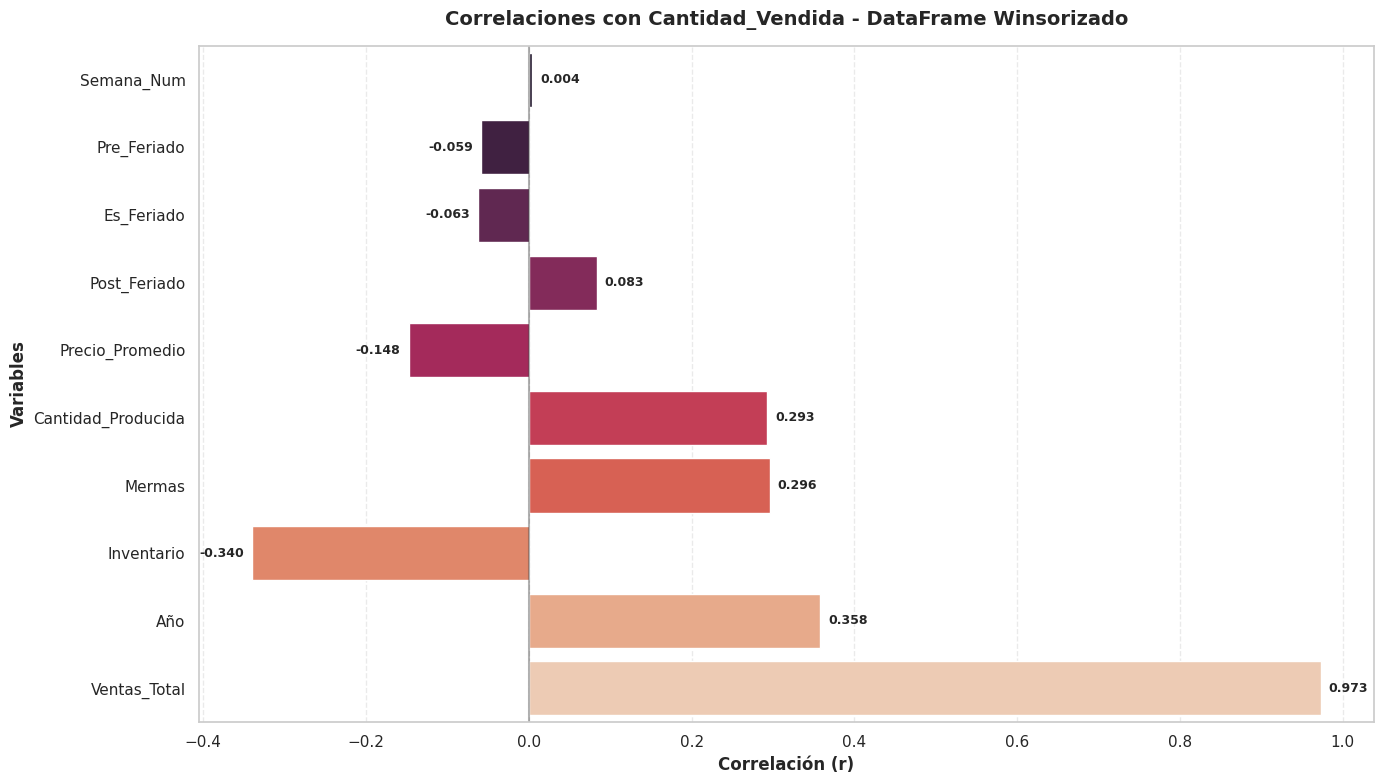

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

# Calcular correlaciones, excluyendo columnas no numéricas como 'Año_Semana'
columnas_numericas = df_winsorizado.select_dtypes(include=['float64', 'int64', 'int32', 'uint32']).columns
corr_winsorizado_vendida = df_winsorizado[columnas_numericas].corr()['Cantidad_Vendida'].drop('Cantidad_Vendida')
orden = corr_winsorizado_vendida.abs().sort_values(ascending=True).index

# Gráfico Winsorizado
sns.barplot(x=corr_winsorizado_vendida[orden].values, y=orden, palette="rocket", ax=ax)
ax.set_title('Correlaciones con Cantidad_Vendida - DataFrame Winsorizado',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Correlación (r)', fontsize=12, fontweight='bold')
ax.set_ylabel('Variables', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=1.5, alpha=0.3)
ax.grid(axis='x', linestyle='--', alpha=0.4)

# Añadir valores
for i, value in enumerate(corr_winsorizado_vendida[orden].values):
    ax.text(value + 0.01 if value >= 0 else value - 0.01, i,
            f"{value:.3f}", va='center',
            ha='left' if value >= 0 else 'right', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig("correlacion_winsorizado.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Código para verificar solo Cantidad_Vendida
from statsmodels.tsa.stattools import adfuller

def test_estacionariedad_simple(serie, nombre):
    resultado = adfuller(serie.dropna(), autolag='AIC')
    return {
        'Variable': nombre,
        'Estadístico ADF': round(resultado[0], 4),
        'Valor p': round(resultado[1], 4),
        'Es Estacionaria': '✓ Sí' if resultado[1] < 0.05 else '✗ No',
        'Acción Requerida': 'Ninguna' if resultado[1] < 0.05 else 'Aplicar diferenciación'
    }

# Analizar variable dependiente
resultado_dep = test_estacionariedad_simple(df_winsorizado['Cantidad_Vendida'], 'Cantidad_Vendida (Dependiente)')


print("ANÁLISIS DE ESTACIONARIEDAD PARA MODELO ARIMA df_TOTAL")

print(f"\nVariable: {resultado_dep['Variable']}")
print(f"Estadístico ADF: {resultado_dep['Estadístico ADF']}")
print(f"Valor p: {resultado_dep['Valor p']}")




ANÁLISIS DE ESTACIONARIEDAD PARA MODELO ARIMA df_TOTAL

Variable: Cantidad_Vendida (Dependiente)
Estadístico ADF: -4.7225
Valor p: 0.0001


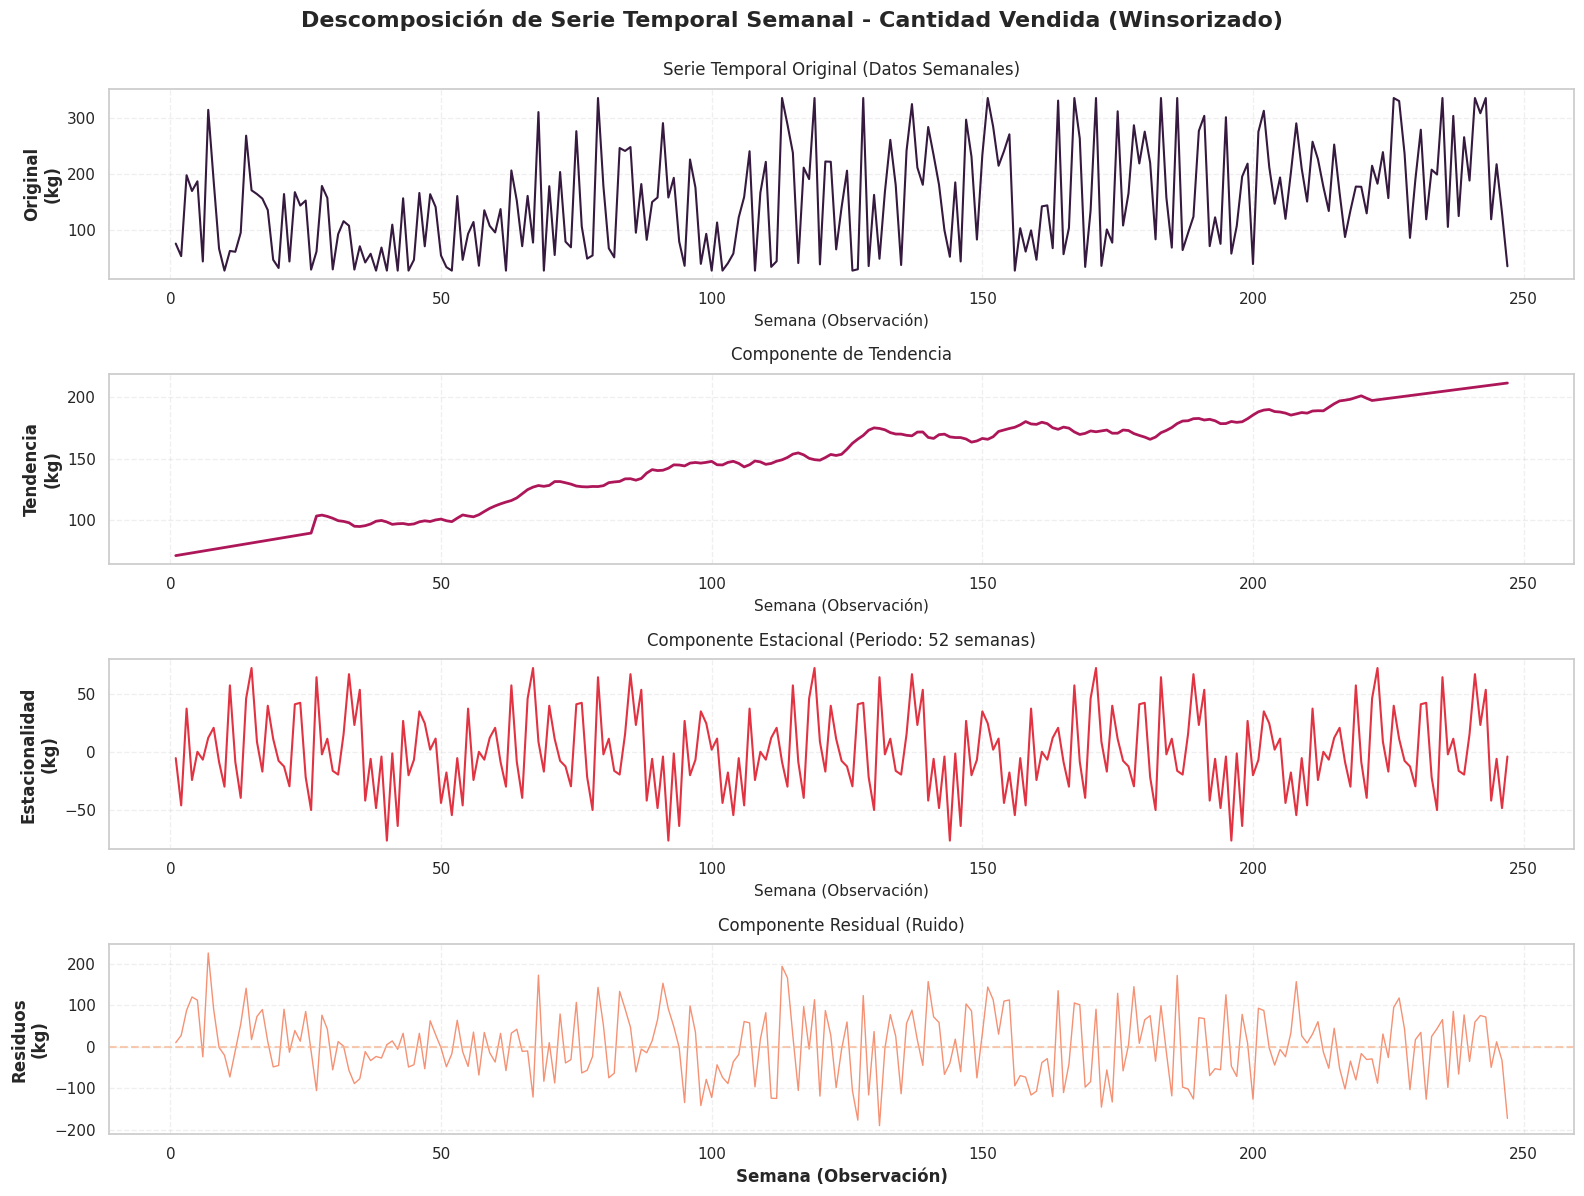


ESTADÍSTICAS DE LA DESCOMPOSICIÓN (DATOS SEMANALES)

Componente                  Media     Desv.Std          Min          Max
--------------------------------------------------------------------------------
Original                   152.75        92.90        27.91       334.89
Tendencia                  149.12        39.64        70.74       211.64
Estacionalidad               0.74        34.52       -75.81        71.95
Residuos                     2.90        80.31      -189.64       226.51

PROPORCIÓN DE VARIANZA EXPLICADA
Tendencia:       17.05%
Estacionalidad:  12.94%
Residuos:        70.01%

INFORMACIÓN ADICIONAL
Total de semanas analizadas: 247
Periodo estacional: 52 semanas (1 año)
Número de ciclos completos: 4.8 años


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener colores de la paleta rocket
colores_rocket = sns.color_palette("rocket", n_colors=6)

# Crear un índice numérico simple (número de semana/observación)
df_temp = df_winsorizado.copy()
df_temp['Observacion'] = range(1, len(df_temp) + 1)
df_temp = df_temp.set_index('Observacion')

# Realizar descomposición aditiva
decomposition = seasonal_decompose(df_temp['Cantidad_Vendida'],
                                   model='additive',
                                   period=52,  # 52 semanas = 1 año de estacionalidad
                                   extrapolate_trend='freq')

# Crear el gráfico
fig, axes = plt.subplots(4, 1, figsize=(16, 12))
fig.suptitle('Descomposición de Serie Temporal Semanal - Cantidad Vendida (Winsorizado)',
             fontsize=16, fontweight='bold', y=0.995)

# Serie Original - Color rocket[0]
axes[0].plot(decomposition.observed.index, decomposition.observed.values,
             linewidth=1.5, color=colores_rocket[0])
axes[0].set_ylabel('Original\n(kg)', fontsize=12, fontweight='bold')
axes[0].set_title('Serie Temporal Original (Datos Semanales)', fontsize=12, pad=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlabel('Semana (Observación)', fontsize=11)

# Tendencia - Color rocket[2]
axes[1].plot(decomposition.trend.index, decomposition.trend.values,
             linewidth=2, color=colores_rocket[2])
axes[1].set_ylabel('Tendencia\n(kg)', fontsize=12, fontweight='bold')
axes[1].set_title('Componente de Tendencia', fontsize=12, pad=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlabel('Semana (Observación)', fontsize=11)

# Estacionalidad - Color rocket[3]
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal.values,
             linewidth=1.5, color=colores_rocket[3])
axes[2].set_ylabel('Estacionalidad\n(kg)', fontsize=12, fontweight='bold')
axes[2].set_title('Componente Estacional (Periodo: 52 semanas)', fontsize=12, pad=10)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].set_xlabel('Semana (Observación)', fontsize=11)

# Residuos - Color rocket[4]
axes[3].plot(decomposition.resid.index, decomposition.resid.values,
             linewidth=1, color=colores_rocket[4], alpha=0.8)
axes[3].axhline(y=0, color=colores_rocket[5], linestyle='--', linewidth=1.5, alpha=0.7)
axes[3].set_ylabel('Residuos\n(kg)', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Semana (Observación)', fontsize=12, fontweight='bold')
axes[3].set_title('Componente Residual (Ruido)', fontsize=12, pad=10)
axes[3].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig("descomposicion_serie_semanal.png", dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas de cada componente
print("\n" + "="*80)
print("ESTADÍSTICAS DE LA DESCOMPOSICIÓN (DATOS SEMANALES)")
print("="*80)

componentes = {
    'Original': decomposition.observed,
    'Tendencia': decomposition.trend,
    'Estacionalidad': decomposition.seasonal,
    'Residuos': decomposition.resid
}

print(f"\n{'Componente':<20} {'Media':>12} {'Desv.Std':>12} {'Min':>12} {'Max':>12}")
print("-" * 80)

for nombre, serie in componentes.items():
    print(f"{nombre:<20} {serie.mean():>12.2f} {serie.std():>12.2f} "
          f"{serie.min():>12.2f} {serie.max():>12.2f}")

# Varianza explicada por cada componente
var_tendencia = decomposition.trend.var()
var_estacional = decomposition.seasonal.var()
var_residual = decomposition.resid.var()
var_total = var_tendencia + var_estacional + var_residual

print("\n" + "="*80)
print("PROPORCIÓN DE VARIANZA EXPLICADA")
print("="*80)
print(f"Tendencia:      {(var_tendencia/var_total)*100:>6.2f}%")
print(f"Estacionalidad: {(var_estacional/var_total)*100:>6.2f}%")
print(f"Residuos:       {(var_residual/var_total)*100:>6.2f}%")

print("\n" + "="*80)
print("INFORMACIÓN ADICIONAL")
print("="*80)
print(f"Total de semanas analizadas: {len(df_temp)}")
print(f"Periodo estacional: 52 semanas (1 año)")
print(f"Número de ciclos completos: {len(df_temp) / 52:.1f} años")

**MODELO SARIMAX Y XG BOOST CON DATOS DF TOTAL**

**MODELO SARIMAX Y XG BOOST CON DF_WINSORIZADO**

In [ ]:
df_winsorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          247 non-null    object        
 1   Año                 247 non-null    int32         
 2   Semana_Num          247 non-null    UInt32        
 3   Fecha               247 non-null    datetime64[ns]
 4   Cantidad_Producida  247 non-null    float64       
 5   Mermas              247 non-null    float64       
 6   Cantidad_Vendida    247 non-null    float64       
 7   Inventario          247 non-null    float64       
 8   Precio_Promedio     247 non-null    float64       
 9   Ventas_Total        247 non-null    float64       
 10  Es_Feriado          247 non-null    int64         
 11  Pre_Feriado         247 non-null    int64         
 12  Post_Feriado        247 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(6), int32

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_estacionariedad(serie, nombre='Serie'):
    """
    Realiza pruebas ADF y KPSS para evaluar estacionariedad
    """
    print(f"\n{'='*60}")
    print(f"ANÁLISIS DE ESTACIONARIEDAD: {nombre}")
    print(f"{'='*60}")

    # Test ADF (H0: serie NO es estacionaria)
    resultado_adf = adfuller(serie.dropna(), autolag='AIC')
    print("\n1. TEST AUGMENTED DICKEY-FULLER (ADF):")
    print(f"   Estadístico ADF: {resultado_adf[0]:.4f}")
    print(f"   p-value: {resultado_adf[1]:.4f}")
    print(f"   Valores críticos:")
    for key, value in resultado_adf[4].items():
        print(f"      {key}: {value:.4f}")

    if resultado_adf[1] < 0.05:
        print("   ✓ Conclusión: Rechazamos H0 → La serie ES estacionaria (ADF)")
    else:
        print("   ✗ Conclusión: No rechazamos H0 → La serie NO es estacionaria (ADF)")

    # Test KPSS (H0: serie ES estacionaria)
    resultado_kpss = kpss(serie.dropna(), regression='ct', nlags='auto')
    print("\n2. TEST KPSS:")
    print(f"   Estadístico KPSS: {resultado_kpss[0]:.4f}")
    print(f"   p-value: {resultado_kpss[1]:.4f}")
    print(f"   Valores críticos:")
    for key, value in resultado_kpss[3].items():
        print(f"      {key}: {value:.4f}")

    if resultado_kpss[1] > 0.05:
        print("   ✓ Conclusión: No rechazamos H0 → La serie ES estacionaria (KPSS)")
    else:
        print("   ✗ Conclusión: Rechazamos H0 → La serie NO es estacionaria (KPSS)")

    return resultado_adf[1], resultado_kpss[1]

# Analizar serie original
p_adf, p_kpss = test_estacionariedad(df_winsorizado['Cantidad_Vendida'], 'Cantidad Vendida Original')


ANÁLISIS DE ESTACIONARIEDAD: Cantidad Vendida Original

1. TEST AUGMENTED DICKEY-FULLER (ADF):
   Estadístico ADF: -4.7225
   p-value: 0.0001
   Valores críticos:
      1%: -3.4576
      5%: -2.8735
      10%: -2.5731
   ✓ Conclusión: Rechazamos H0 → La serie ES estacionaria (ADF)

2. TEST KPSS:
   Estadístico KPSS: 0.0458
   p-value: 0.1000
   Valores críticos:
      10%: 0.1190
      5%: 0.1460
      2.5%: 0.1760
      1%: 0.2160
   ✓ Conclusión: No rechazamos H0 → La serie ES estacionaria (KPSS)


/tmp/ipython-input-3353333856.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie.dropna(), regression='ct', nlags='auto')


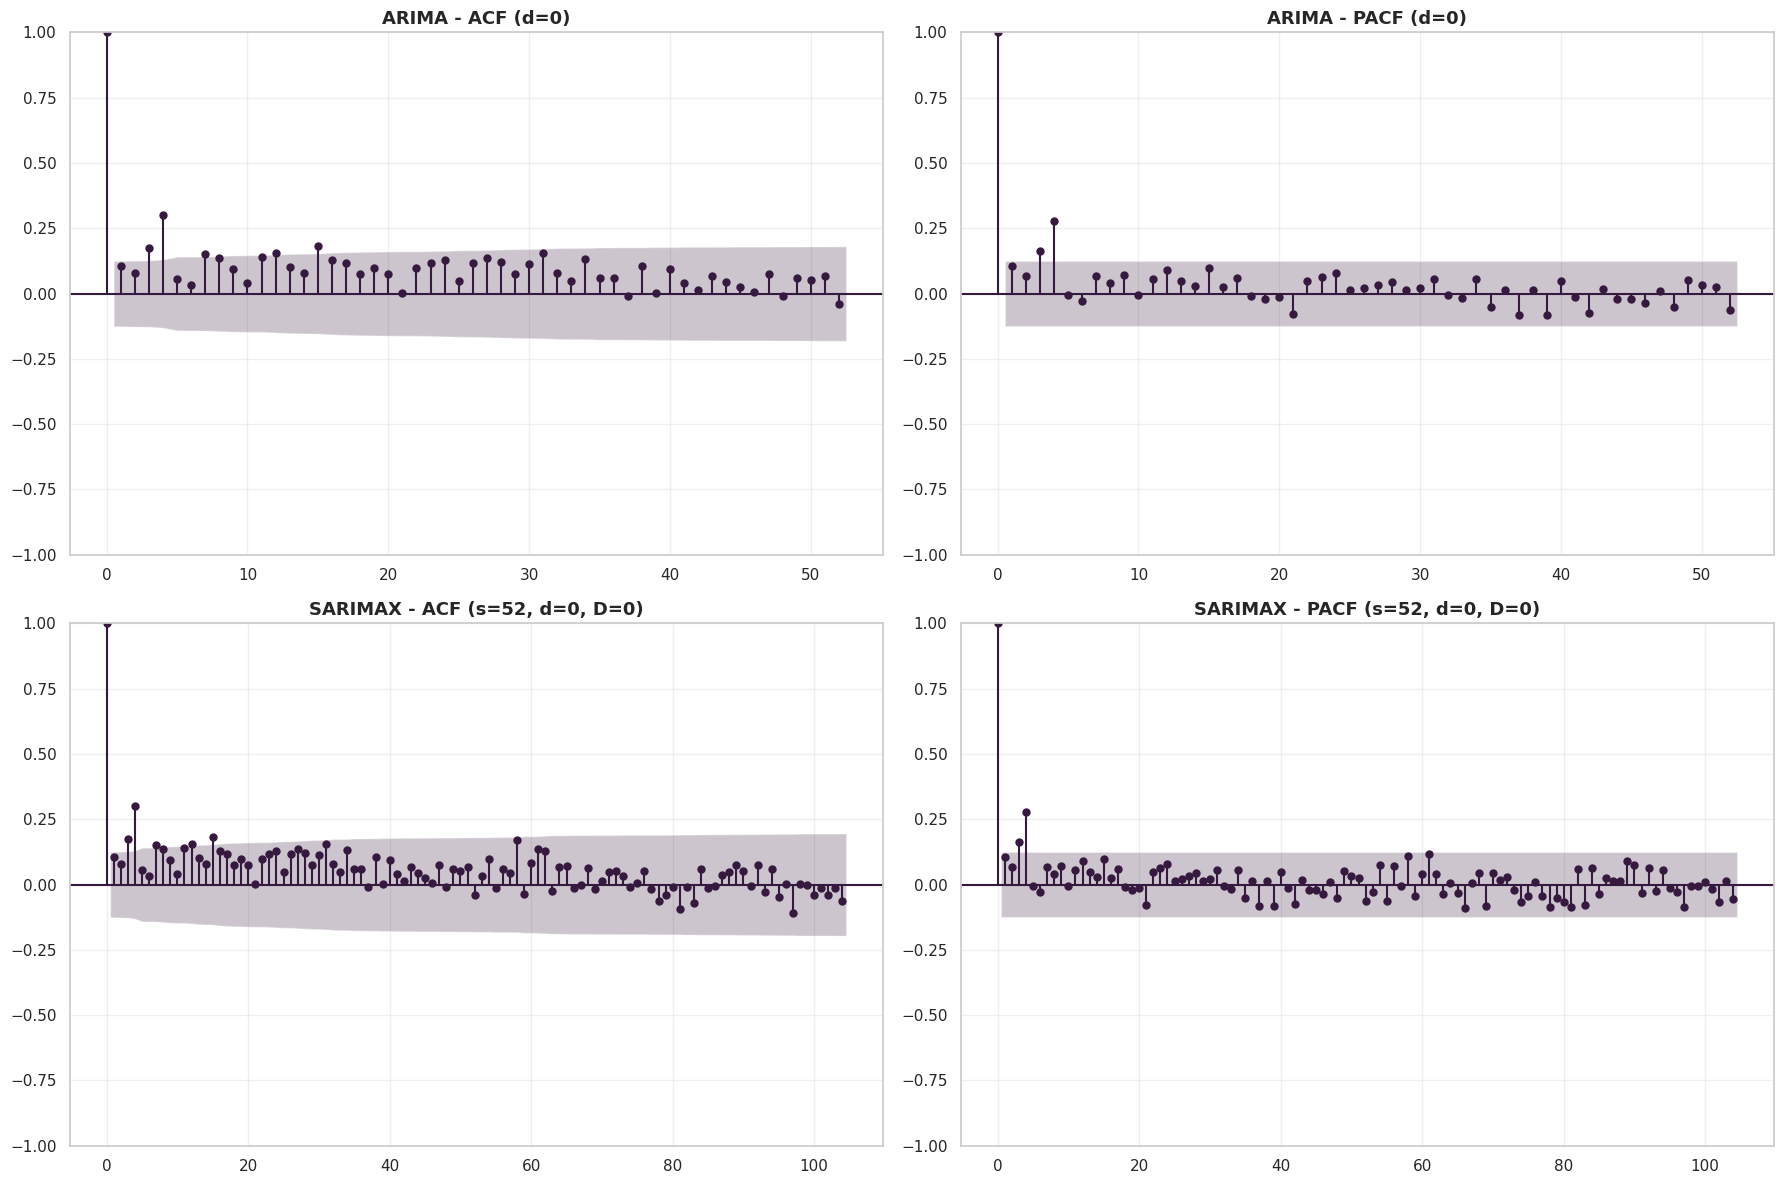

=== COMPARACIÓN ===
ARIMA analiza lags: 1 a 52 (d=0)
SARIMAX analiza lags: 1 a 104 (d=0, D=0)

⚠️ Si los gráficos muestran valores negativos fuertes,
   significa que aplicaste diferenciación innecesaria


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Serie original (YA estacionaria según tu primer gráfico)
serie_original = df_winsorizado['Cantidad_Vendida'].copy()

# Para ARIMA: usa la serie original (d=0)
serie_arima = serie_original.copy()  # SIN diferenciar

# Para SARIMAX: también usa serie original primero
# (solo diferencia si detectas estacionalidad fuerte)
s = 52
serie_sarimax = serie_original.copy()  # SIN diferenciar
# Si necesitas diferenciación estacional:
# serie_sarimax = serie_original.diff(s).dropna()  # Solo D=1

# Crear figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# ARIMA - ACF
max_lags_arima = min(52, len(serie_arima) // 2)
plot_acf(serie_arima, lags=max_lags_arima, ax=axes[0, 0], alpha=0.05)
axes[0, 0].set_title('ARIMA - ACF (d=0)', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# ARIMA - PACF
plot_pacf(serie_arima, lags=max_lags_arima, ax=axes[0, 1], alpha=0.05, method='ywm')
axes[0, 1].set_title('ARIMA - PACF (d=0)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# SARIMAX - ACF
max_lags_sarimax = min(s * 2, len(serie_sarimax) // 2)
plot_acf(serie_sarimax, lags=max_lags_sarimax, ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title(f'SARIMAX - ACF (s={s}, d=0, D=0)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)


# SARIMAX - PACF
plot_pacf(serie_sarimax, lags=max_lags_sarimax, ax=axes[1, 1], alpha=0.05, method='ywm')
axes[1, 1].set_title(f'SARIMAX - PACF (s={s}, d=0, D=0)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

print("=== COMPARACIÓN ===")
print(f"ARIMA analiza lags: 1 a {max_lags_arima} (d=0)")
print(f"SARIMAX analiza lags: 1 a {max_lags_sarimax} (d=0, D=0)")
print("\n⚠️ Si los gráficos muestran valores negativos fuertes,")
print("   significa que aplicaste diferenciación innecesaria")

🔍 ANÁLISIS VISUAL PARA DETECTAR ESTACIONALIDAD:



/tmp/ipython-input-3884241446.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[3].boxplot(datos_boxplot, labels=range(1, 14))


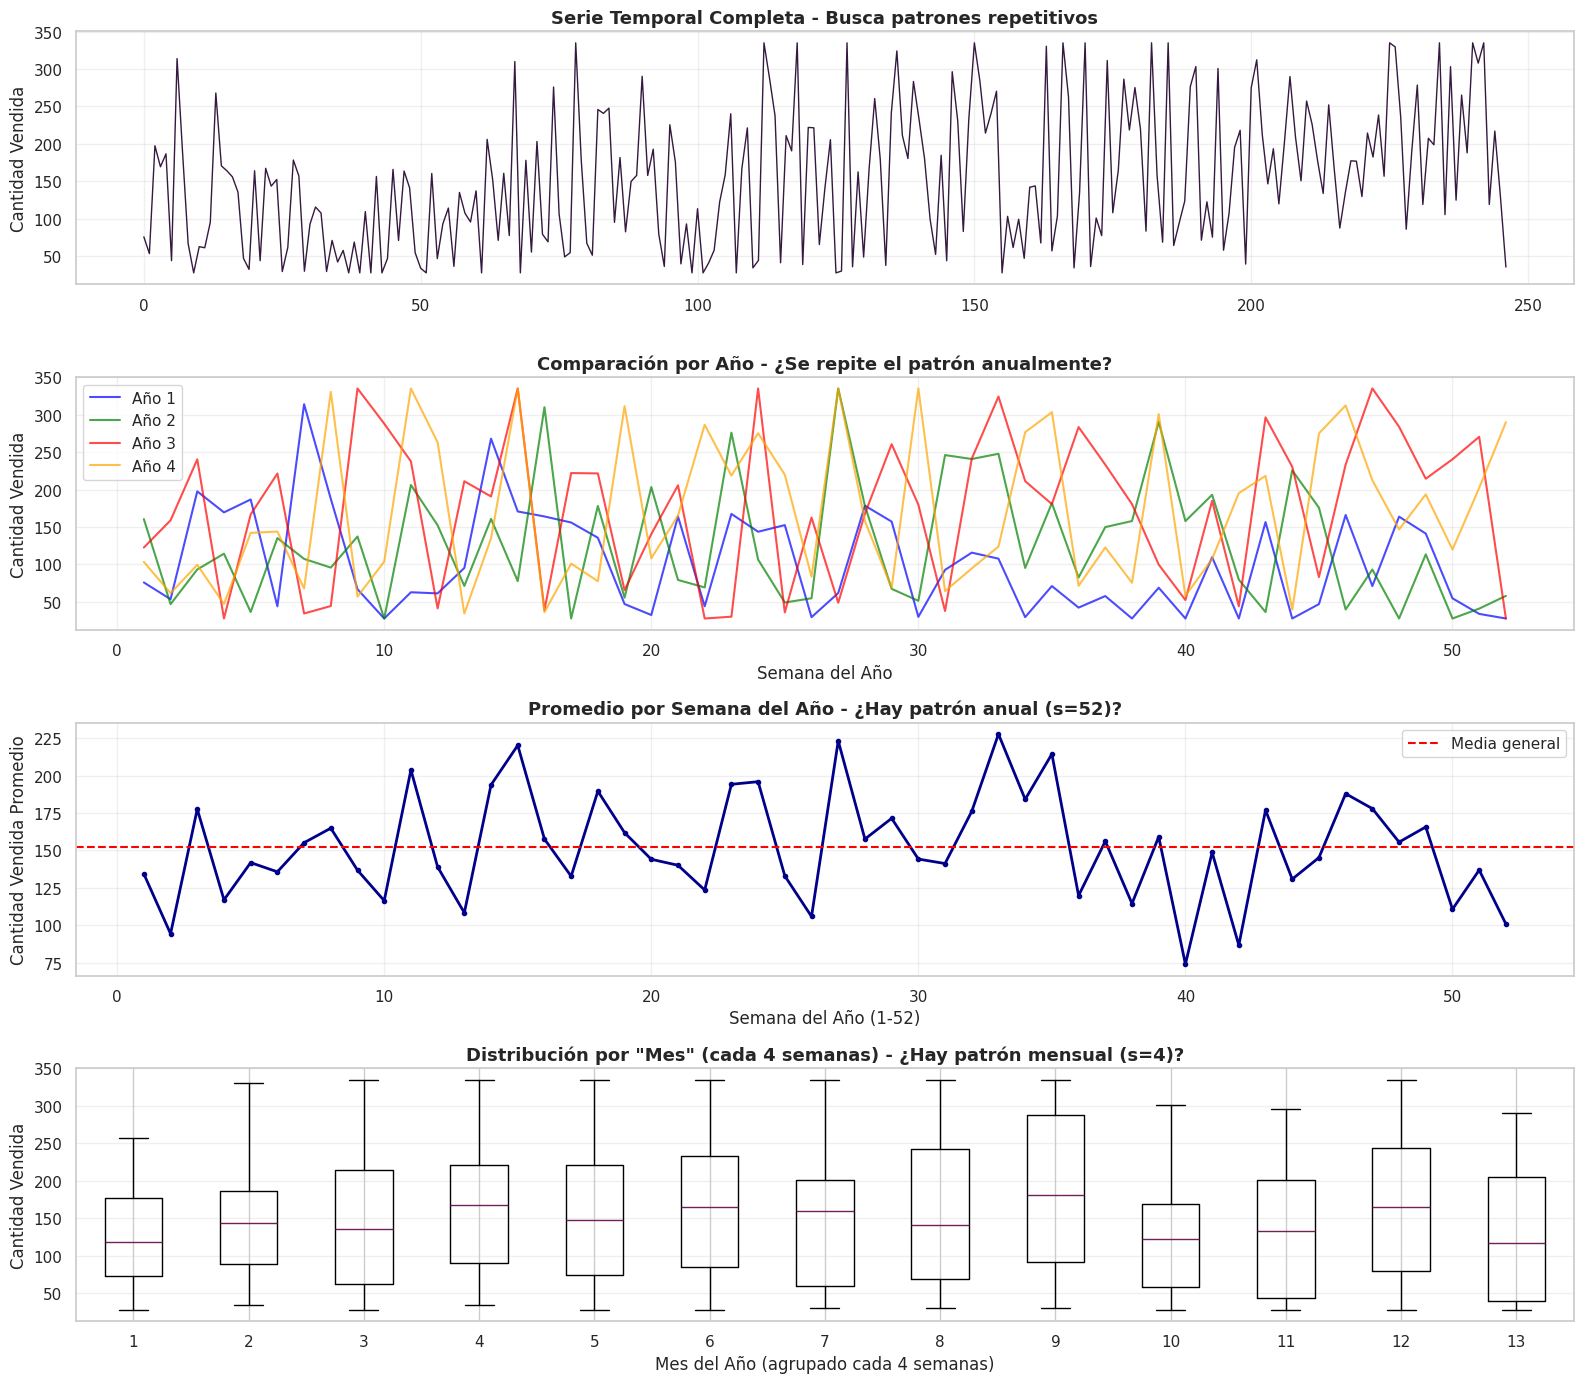


📌 INTERPRETA LOS GRÁFICOS:
   - Gráfico 2: Si las líneas siguen un patrón similar → s=52 (anual)
   - Gráfico 3: Si hay picos/valles claros en ciertas semanas → s=52 (anual)
   - Gráfico 4: Si hay diferencias entre meses → podría ser s=4 (mensual)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ============================================
# DETECTAR ESTACIONALIDAD EN TUS DATOS
# ============================================

serie = df_winsorizado['Cantidad_Vendida'].copy()

# Asumiendo que tienes un índice de fecha
# Si no lo tienes, créalo:
# df_winsorizado['Fecha'] = pd.date_range(start='2020-01-01', periods=len(serie), freq='W')

print("🔍 ANÁLISIS VISUAL PARA DETECTAR ESTACIONALIDAD:\n")

# Gráfico 1: Serie temporal completa
fig, axes = plt.subplots(4, 1, figsize=(16, 14))

# Serie completa
axes[0].plot(serie.index, serie, linewidth=1)
axes[0].set_title('Serie Temporal Completa - Busca patrones repetitivos',
                  fontsize=13, fontweight='bold')
axes[0].set_ylabel('Cantidad Vendida')
axes[0].grid(True, alpha=0.3)

# Descomposición por año (si tienes 4 años)
# Esto te ayuda a ver si el patrón se repite cada año
if len(serie) >= 52*2:  # Al menos 2 años de datos
    años = len(serie) // 52
    colores = ['blue', 'green', 'red', 'orange', 'purple']

    axes[1].set_title('Comparación por Año - ¿Se repite el patrón anualmente?',
                      fontsize=13, fontweight='bold')
    for año in range(min(años, 4)):
        inicio = año * 52
        fin = min((año + 1) * 52, len(serie))
        semanas = range(1, fin - inicio + 1)
        axes[1].plot(semanas, serie.iloc[inicio:fin].values,
                    label=f'Año {año+1}', color=colores[año], alpha=0.7)
    axes[1].set_xlabel('Semana del Año')
    axes[1].set_ylabel('Cantidad Vendida')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# Promedio por semana del año (detectar estacionalidad anual)
if len(serie) >= 52*2:
    serie_df = pd.DataFrame({
        'valor': serie.values,
        'semana_año': [(i % 52) + 1 for i in range(len(serie))]
    })
    promedio_semanal = serie_df.groupby('semana_año')['valor'].mean()

    axes[2].plot(promedio_semanal.index, promedio_semanal.values,
                linewidth=2, marker='o', markersize=3, color='darkblue')
    axes[2].set_title('Promedio por Semana del Año - ¿Hay patrón anual (s=52)?',
                      fontsize=13, fontweight='bold')
    axes[2].set_xlabel('Semana del Año (1-52)')
    axes[2].set_ylabel('Cantidad Vendida Promedio')
    axes[2].grid(True, alpha=0.3)
    axes[2].axhline(y=promedio_semanal.mean(), color='red',
                    linestyle='--', label='Media general')
    axes[2].legend()

# Boxplot por semana del año
if len(serie) >= 52*2:
    # Agrupar cada 4 semanas para ver patrón mensual
    serie_df['mes'] = [(i % 52) // 4 + 1 for i in range(len(serie))]

    datos_boxplot = [serie_df[serie_df['mes'] == m]['valor'].values
                     for m in range(1, 14)]
    axes[3].boxplot(datos_boxplot, labels=range(1, 14))
    axes[3].set_title('Distribución por "Mes" (cada 4 semanas) - ¿Hay patrón mensual (s=4)?',
                      fontsize=13, fontweight='bold')
    axes[3].set_xlabel('Mes del Año (agrupado cada 4 semanas)')
    axes[3].set_ylabel('Cantidad Vendida')
    axes[3].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📌 INTERPRETA LOS GRÁFICOS:")
print("   - Gráfico 2: Si las líneas siguen un patrón similar → s=52 (anual)")
print("   - Gráfico 3: Si hay picos/valles claros en ciertas semanas → s=52 (anual)")
print("   - Gráfico 4: Si hay diferencias entre meses → podría ser s=4 (mensual)")

**MODELO ARIMA EVALUACIÓN**


COMPARACIÓN DE MODELOS ARIMA

TABLA COMPLETA DE RESULTADOS
         Orden         AIC         BIC        HQIC       MAE      RMSE      MAPE  LB_pvalue  JB_pvalue  Skewness  Kurtosis  N_params
ARIMA(1, 0, 1) 2340.141638 2353.274453 2345.457899 74.056681 92.605842 42.483606   0.140151   0.001456  0.497399  2.224136         4
ARIMA(1, 0, 2) 2341.468207 2357.884226 2348.113534 74.671656 93.540063 42.424269   0.139072   0.001194  0.488106  2.171248         5
ARIMA(2, 0, 1) 2341.618811 2358.034830 2348.264138 74.469479 93.233280 42.443422   0.134920   0.001217  0.491977  2.183197         5
ARIMA(2, 0, 2) 2343.393656 2363.092878 2351.368048 79.686340 99.237588 42.439382   0.262578   0.001527  0.491203  2.215922         6
ARIMA(3, 0, 1) 2340.635649 2360.334871 2348.610041 78.157374 97.816305 42.363365   0.591989   0.002227  0.435418  2.145823         6
ARIMA(3, 0, 2) 2340.580002 2363.562428 2349.883459 78.720535 98.297929 42.415074   0.950674   0.002716  0.454060  2.215815         7


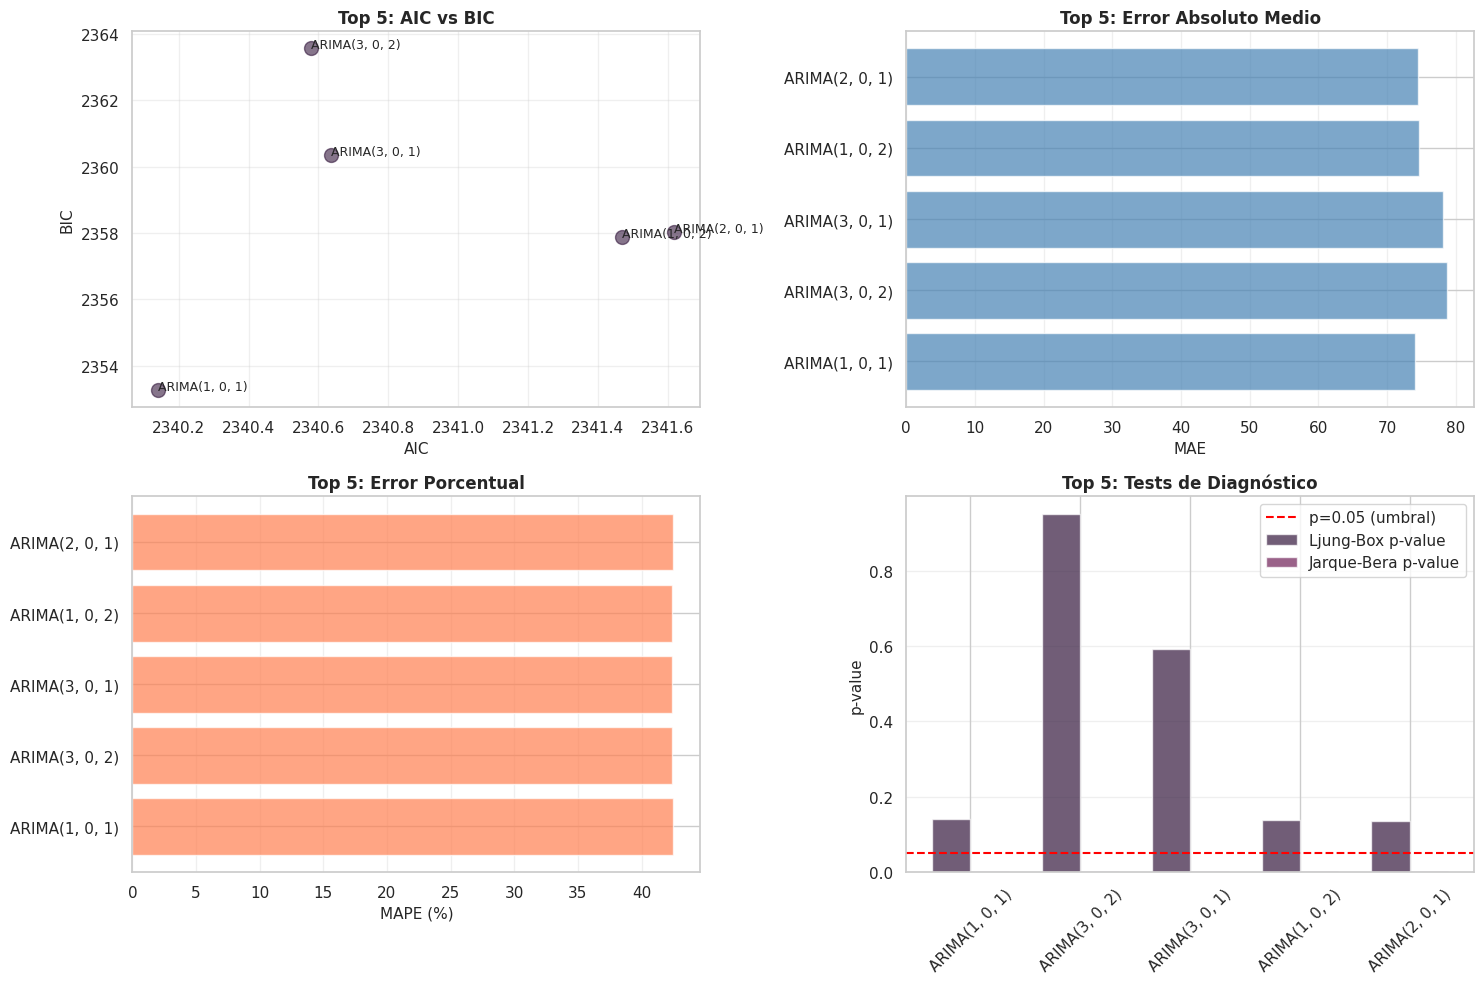

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')

# Preparar los datos
y = df_winsorizado['Cantidad_Vendida']
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Órdenes de ARIMA a probar (basados en ACF/PACF)
ordenes_arima = [
    (1, 0, 1),  # ARMA(1,1) - modelo mixto simple
    (1, 0, 2),  # ARMA(1,2) - más complejo en MA
    (2, 0, 1),  # ARMA(2,1) - más complejo en AR
    (2, 0, 2),  # ARMA(2,2) - tu modelo actual
    (3, 0, 1),  # ARMA(3,1) - AR más complejo
    (3, 0, 2),  # ARMA(3,2) - ambos complejos
]

# Diccionario para almacenar resultados
resultados = []

print("="*100)
print("COMPARACIÓN DE MODELOS ARIMA")
print("="*100)

for orden in ordenes_arima:
    try:
        # Ajustar modelo
        modelo = ARIMA(train, order=orden)
        modelo_fit = modelo.fit()

        # Predicciones
        pred = modelo_fit.forecast(steps=len(test))

        # Métricas de ajuste
        aic = modelo_fit.aic
        bic = modelo_fit.bic
        hqic = modelo_fit.hqic

        # Métricas de predicción
        mae = mean_absolute_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))
        mape = np.mean(np.abs((test - pred) / test)) * 100

        # Test de Ljung-Box
        lb_test = acorr_ljungbox(modelo_fit.resid, lags=[10], return_df=True)
        lb_pvalue = lb_test['lb_pvalue'].values[0]

        # Test de Jarque-Bera
        jb_stat, jb_pvalue = stats.jarque_bera(modelo_fit.resid)

        # Skewness y Kurtosis
        skew = stats.skew(modelo_fit.resid)
        kurt = stats.kurtosis(modelo_fit.resid, fisher=False)

        # Guardar resultados
        resultados.append({
            'Orden': f'ARIMA{orden}',
            'AIC': aic,
            'BIC': bic,
            'HQIC': hqic,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape,
            'LB_pvalue': lb_pvalue,
            'JB_pvalue': jb_pvalue,
            'Skewness': skew,
            'Kurtosis': kurt,
            'N_params': len(modelo_fit.params)
        })

    except Exception as e:
        print(f"Error en ARIMA{orden}: {str(e)}")
        continue

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)


print("\n" + "="*100)
print("TABLA COMPLETA DE RESULTADOS")
print("="*100)
print(df_resultados.to_string(index=False))

# Visualización comparativa de los top 5
import matplotlib.pyplot as plt

top5_modelos = df_resultados.nsmallest(5, 'AIC')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: AIC vs BIC
axes[0, 0].scatter(top5_modelos['AIC'], top5_modelos['BIC'], s=100, alpha=0.6)
for idx, row in top5_modelos.iterrows():
    axes[0, 0].annotate(row['Orden'], (row['AIC'], row['BIC']), fontsize=9)
axes[0, 0].set_xlabel('AIC', fontsize=11)
axes[0, 0].set_ylabel('BIC', fontsize=11)
axes[0, 0].set_title('Top 5: AIC vs BIC', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: MAE comparación
axes[0, 1].barh(top5_modelos['Orden'], top5_modelos['MAE'], color='steelblue', alpha=0.7)
axes[0, 1].set_xlabel('MAE', fontsize=11)
axes[0, 1].set_title('Top 5: Error Absoluto Medio', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Gráfico 3: MAPE comparación
axes[1, 0].barh(top5_modelos['Orden'], top5_modelos['MAPE'], color='coral', alpha=0.7)
axes[1, 0].set_xlabel('MAPE (%)', fontsize=11)
axes[1, 0].set_title('Top 5: Error Porcentual', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Diagnóstico (Ljung-Box y Jarque-Bera p-values)
x = np.arange(len(top5_modelos))
width = 0.35
axes[1, 1].bar(x - width/2, top5_modelos['LB_pvalue'], width, label='Ljung-Box p-value', alpha=0.7)
axes[1, 1].bar(x + width/2, top5_modelos['JB_pvalue'], width, label='Jarque-Bera p-value', alpha=0.7)
axes[1, 1].axhline(y=0.05, color='r', linestyle='--', label='p=0.05 (umbral)')
axes[1, 1].set_ylabel('p-value', fontsize=11)
axes[1, 1].set_title('Top 5: Tests de Diagnóstico', fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(top5_modelos['Orden'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

**ENTRENAMIENTO MODELO ARIMA**


PREPARACIÓN DE DATOS
Datos de entrenamiento: 197 semanas
Datos de prueba: 50 semanas
Total de observaciones: 247 semanas

AJUSTANDO MODELO ARIMA(3, 0, 2)

✓ Modelo ajustado exitosamente

Resumen del modelo:
                               SARIMAX Results                                
Dep. Variable:       Cantidad_Vendida   No. Observations:                  197
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1163.290
Date:                Thu, 30 Oct 2025   AIC                           2340.580
Time:                        03:02:44   BIC                           2363.562
Sample:                             0   HQIC                          2349.883
                                - 197                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
con

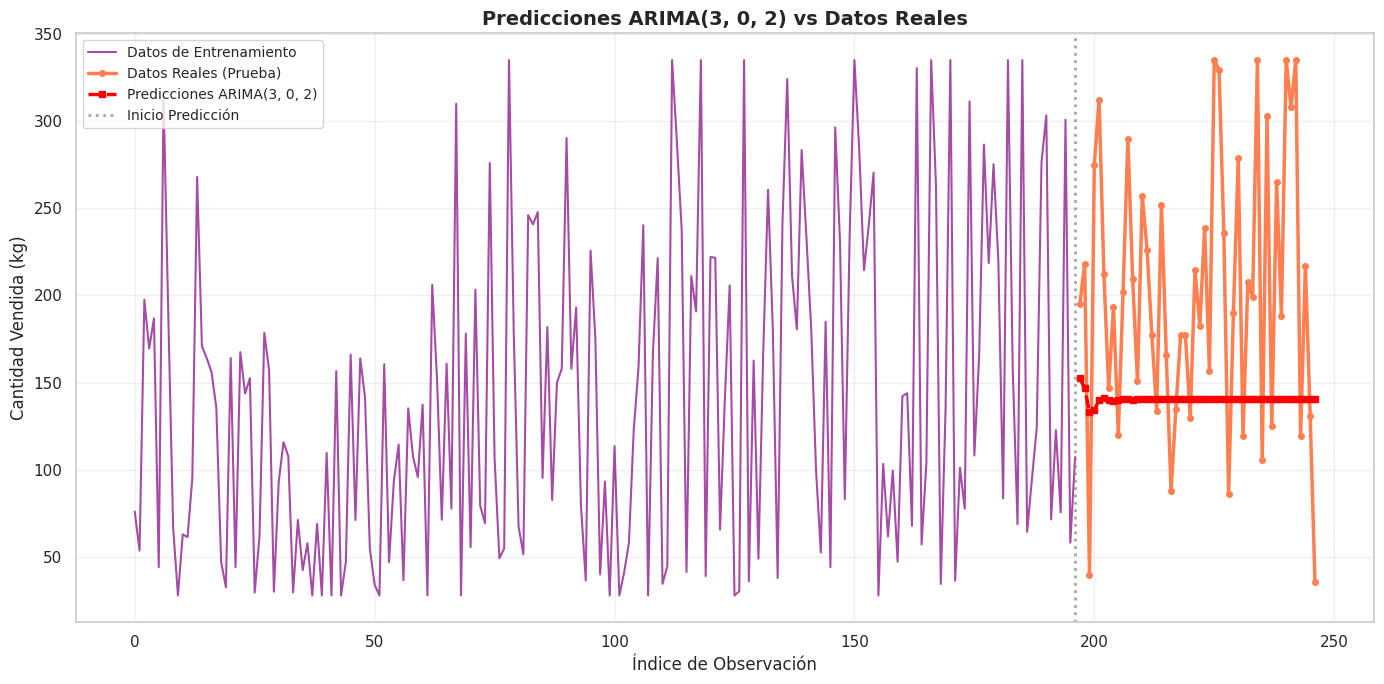


DIAGNÓSTICO DE RESIDUOS


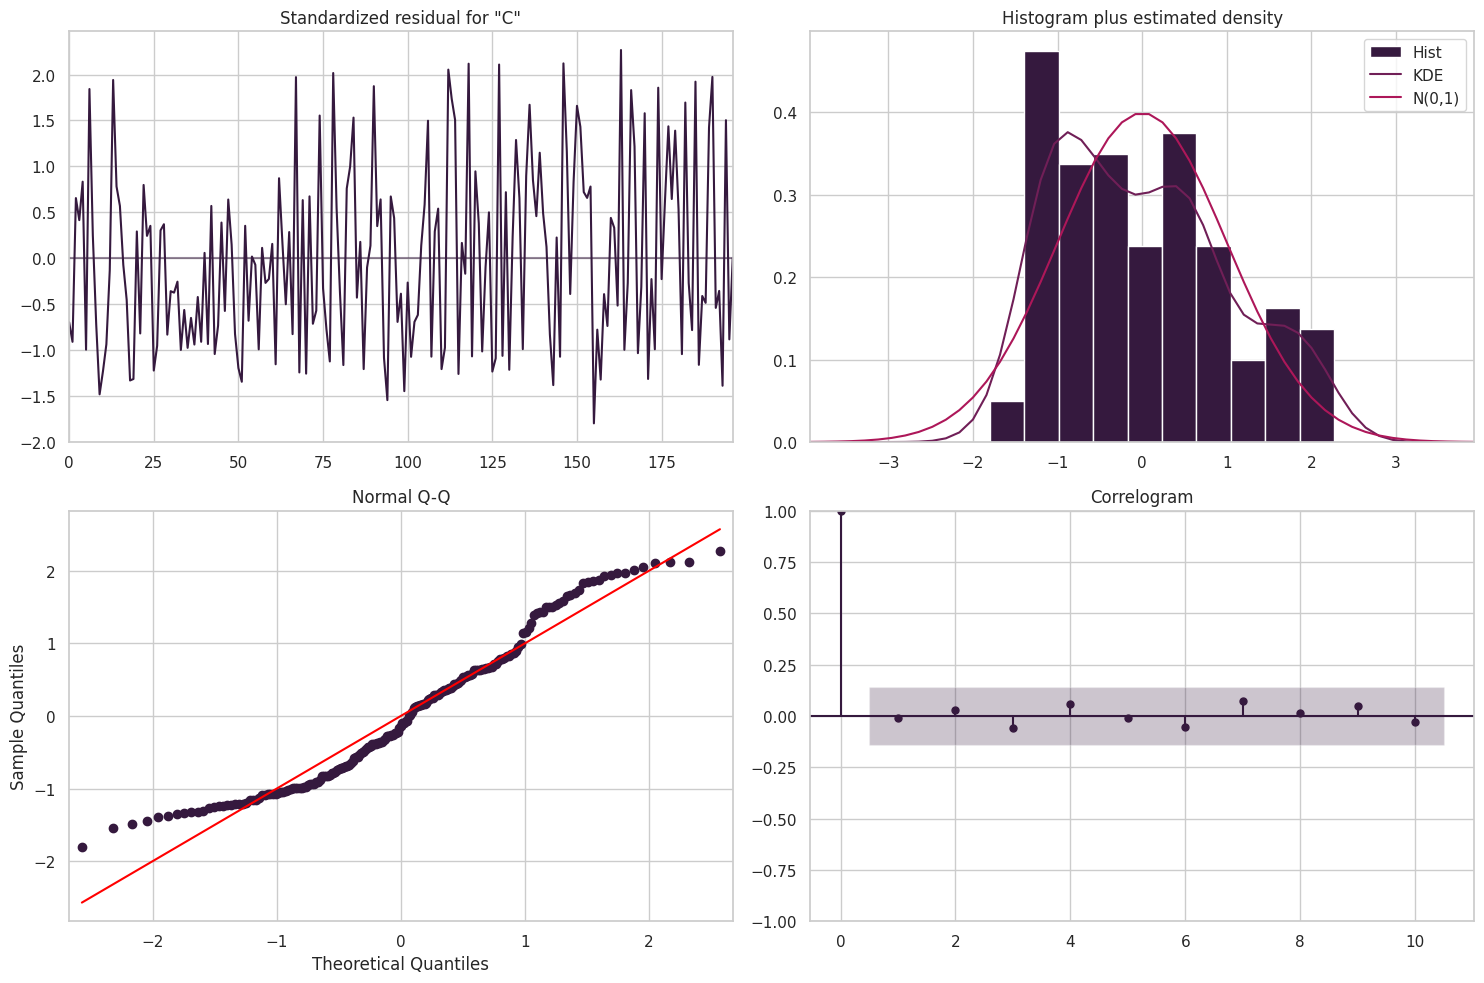


Estadísticas de Residuos:
  • Media:               0.0592
  • Desviación estándar: 88.97
  • Mínimo:              -159.66
  • Máximo:              201.11

COMPARACIÓN CON MODELO ALTERNATIVO ARIMA(1,0,1)

ARIMA(3, 0, 2) (Principal):
  MAE:  78.72 kg | RMSE: 98.30 kg | MAPE: 42.42%

ARIMA(1, 0, 1) (Alternativo):
  MAE:  74.06 kg | RMSE: 92.61 kg | MAPE: 42.48%

✓ El modelo ARIMA(1, 0, 1) tiene mejor desempeño (menor MAE)

PRIMERAS 10 PREDICCIONES
     Real  Prediccion_ARIMA       Error  Error_Porcentual
0  195.27        152.477040   42.792960         21.914764
1  218.20        146.696740   71.503260         32.769597
2   39.66        132.843505  -93.183505       -234.955889
3  274.90        134.078584  140.821416         51.226416
4  312.23        139.932397  172.297603         55.182911
5  212.29        141.116663   71.173337         33.526467
6  146.72        139.782931    6.937069          4.728101
7  193.56        139.470132   54.089868         27.944755
8  119.99        140.067513 

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# 1. PREPARACIÓN DE DATOS


# Asignar la columna 'Cantidad_Vendida' de df_winsorizado a ventas
ventas = df_winsorizado['Cantidad_Vendida']

# Dividir en entrenamiento (80%) y prueba (20%)
train_size = int(len(ventas) * 0.8)
train = ventas[:train_size]
test = ventas[train_size:]

print("="*80)
print("PREPARACIÓN DE DATOS")
print("="*80)
print(f"Datos de entrenamiento: {len(train)} semanas")
print(f"Datos de prueba: {len(test)} semanas")
print(f"Total de observaciones: {len(ventas)} semanas")


# 2. AJUSTAR MODELO ARIMA


# Definir el orden (p, d, q)
# Basado en tu análisis previo, estos son tus modelos seleccionados:
# - Modelo Principal: ARIMA(3,0,2) - Mejor validación estadística
# - Modelo Alternativo: ARIMA(1,0,1) - Más simple

# Puedes cambiar entre (3,0,2) o (1,0,1) según necesites
order = (3, 0, 2)  # Modelo principal recomendado

print("\n" + "="*80)
print(f"AJUSTANDO MODELO ARIMA{order}")
print("="*80)

# Ajustar el modelo en los datos de entrenamiento
modelo = ARIMA(train, order=order)
modelo_fit = modelo.fit()

print("\n✓ Modelo ajustado exitosamente")
print("\nResumen del modelo:")
print(modelo_fit.summary())


# 3. PREDICCIONES EN CONJUNTO DE PRUEBA


print("\n" + "="*80)
print("GENERANDO PREDICCIONES")
print("="*80)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_fit.forecast(steps=len(test))

print(f"✓ {len(predicciones)} predicciones generadas")


# 4. EVALUACIÓN DEL MODELO


print("\n" + "="*80)
print("EVALUACIÓN DEL MODELO ARIMA")
print("="*80)

# Calcular métricas de error
mae = mean_absolute_error(test, predicciones)
rmse = np.sqrt(mean_squared_error(test, predicciones))
mape = np.mean(np.abs((test - predicciones) / test)) * 100

print(f"\nMétricas de Desempeño:")
print(f"  • Error Absoluto Medio (MAE):           {mae:.2f} kg")
print(f"  • Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f} kg")
print(f"  • Error Porcentual Absoluto Medio (MAPE):  {mape:.2f}%")

# Estadísticas adicionales
print(f"\nEstadísticas de Predicción:")
print(f"  • Predicción promedio:  {predicciones.mean():.2f} kg")
print(f"  • Real promedio:        {test.mean():.2f} kg")
print(f"  • Diferencia:           {predicciones.mean() - test.mean():.2f} kg")


# 5. VISUALIZACIÓN DE RESULTADOS


plt.figure(figsize=(14, 7))

# Datos de entrenamiento
plt.plot(train.index, train, label='Datos de Entrenamiento',
         color='purple', linewidth=1.5, alpha=0.7)

# Datos reales de prueba
plt.plot(test.index, test, label='Datos Reales (Prueba)',
         color='coral', linewidth=2.5, marker='o', markersize=4)

# Predicciones
plt.plot(test.index, predicciones, label=f'Predicciones ARIMA{order}',
         color='red', linestyle='--', linewidth=2.5, marker='s', markersize=4)

# Línea vertical separando train/test
plt.axvline(x=train.index[-1], color='gray', linestyle=':',
            linewidth=2, label='Inicio Predicción', alpha=0.7)

plt.title(f'Predicciones ARIMA{order} vs Datos Reales',
          fontsize=14, fontweight='bold')
plt.xlabel('Índice de Observación', fontsize=12)
plt.ylabel('Cantidad Vendida (kg)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 6. DIAGNÓSTICO DE RESIDUOS


print("\n" + "="*80)
print("DIAGNÓSTICO DE RESIDUOS")
print("="*80)

# Gráficos de diagnóstico
fig = modelo_fit.plot_diagnostics(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Análisis de residuos
residuos = modelo_fit.resid

print(f"\nEstadísticas de Residuos:")
print(f"  • Media:               {residuos.mean():.4f}")
print(f"  • Desviación estándar: {residuos.std():.2f}")
print(f"  • Mínimo:              {residuos.min():.2f}")
print(f"  • Máximo:              {residuos.max():.2f}")


# 7. COMPARACIÓN CON MODELO ALTERNATIVO (OPCIONAL)


print("\n" + "="*80)
print("COMPARACIÓN CON MODELO ALTERNATIVO ARIMA(1,0,1)")
print("="*80)

# Ajustar modelo alternativo
order_alt = (1, 0, 1)
modelo_alt = ARIMA(train, order=order_alt)
modelo_alt_fit = modelo_alt.fit()

# Predicciones del modelo alternativo
predicciones_alt = modelo_alt_fit.forecast(steps=len(test))

# Evaluar modelo alternativo
mae_alt = mean_absolute_error(test, predicciones_alt)
rmse_alt = np.sqrt(mean_squared_error(test, predicciones_alt))
mape_alt = np.mean(np.abs((test - predicciones_alt) / test)) * 100

print(f"\nARIMA{order} (Principal):")
print(f"  MAE:  {mae:.2f} kg | RMSE: {rmse:.2f} kg | MAPE: {mape:.2f}%")

print(f"\nARIMA{order_alt} (Alternativo):")
print(f"  MAE:  {mae_alt:.2f} kg | RMSE: {rmse_alt:.2f} kg | MAPE: {mape_alt:.2f}%")

# Determinar el mejor modelo
if mae < mae_alt:
    print(f"\n✓ El modelo ARIMA{order} tiene mejor desempeño (menor MAE)")
else:
    print(f"\n✓ El modelo ARIMA{order_alt} tiene mejor desempeño (menor MAE)")


# 8. GUARDAR PREDICCIONES


# Crear DataFrame con resultados
df_resultados = pd.DataFrame({
    'Real': test.values,
    'Prediccion_ARIMA': predicciones.values,
    'Error': test.values - predicciones.values,
    'Error_Porcentual': ((test.values - predicciones.values) / test.values) * 100
})

print("\n" + "="*80)
print("PRIMERAS 10 PREDICCIONES")
print("="*80)
print(df_resultados.head(10))

# Opcional: guardar a CSV
# df_resultados.to_csv('predicciones_arima.csv', index=False)
# print("\n✓ Resultados guardados en 'predicciones_arima.csv'")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)

# 9. PRONÓSTICO FUTURO (próximas 4 semanas) con ARIMA


# 9.1 Reentrenar con toda la serie y pronosticar 4 pasos
modelo_full = ARIMA(ventas, order=order).fit()
forecast_4w = modelo_full.get_forecast(steps=4)
y_future_4w = forecast_4w.predicted_mean
conf_int   = forecast_4w.conf_int(alpha=0.05)  # 95%

print("\n" + "="*80)
print("PRONÓSTICO ARIMA (próximas 4 semanas)")
print("="*80)
print(y_future_4w.round(2))

# 9.2 Construir índice temporal futuro
use_dates = None
if 'Fecha' in df_winsorizado.columns and np.issubdtype(df_winsorizado['Fecha'].dtype, np.datetime64):
    last_date = df_winsorizado['Fecha'].iloc[-1]
    future_index = pd.date_range(last_date + pd.Timedelta(weeks=1), periods=4, freq='W')
    df_future = pd.DataFrame({'Fecha': future_index, 'Predicción': y_future_4w})
    conf_int.index = future_index
    x_start_line = future_index[0]
    x_span_end   = future_index[-1]
    x_hist = df_winsorizado[['Fecha','Cantidad_Vendida']]
    use_dates = True
elif 'Año_Semana' in df_winsorizado.columns:
    def next_year_week(ys):
        y, w = map(int, str(ys).split('-'))
        w += 1
        if w > 53: w = 1; y += 1
        if w > 52: w = 1; y += 1
        return f"{y}-{w:02d}"
    start_ys = df_winsorizado['Año_Semana'].iloc[-1]
    ys = []
    cur = start_ys
    for _ in range(4):
        cur = next_year_week(cur); ys.append(cur)
    df_future = pd.DataFrame({'Año_Semana': ys, 'Predicción': y_future_4w})
    conf_int.index = ys
    x_start_line = ys[0]; x_span_end = ys[-1]
    x_hist = df_winsorizado[['Año_Semana','Cantidad_Vendida']]
    use_dates = False
else:
    base = len(df_winsorizado)
    idx = np.arange(base, base+4)
    df_future = pd.DataFrame({'idx': idx, 'Predicción': y_future_4w})
    conf_int.index = idx
    x_start_line = idx[0]; x_span_end = idx[-1]
    x_hist = pd.DataFrame({'idx': np.arange(len(df_winsorizado)),
                           'Cantidad_Vendida': df_winsorizado['Cantidad_Vendida']})
    use_dates = None

# 9.3 Gráfico estil


VERIFICACIÓN DE DATOS

Valores nulos en Y: 0
Valores nulos en X:
Cantidad_Producida    0
Mermas                0
Inventario            0
Precio_Promedio       0
Es_Feriado            0
Pre_Feriado           0
Post_Feriado          0
dtype: int64

Dimensiones:
Y: (247,)
X: (247, 7)

Tamaño conjunto entrenamiento: 197
Tamaño conjunto prueba: 50

EVALUACIÓN DE MODELOS SARIMAX CON VARIABLES EXÓGENAS

Ajustando SARIMAX(1, 0, 2)... ✓ AIC: 2294.15, MAE: 61.83

Ajustando SARIMAX(2, 0, 2)... ✓ AIC: 2307.31, MAE: 64.39

Ajustando SARIMAX(3, 0, 1)... ✓ AIC: 2293.74, MAE: 62.19

Ajustando SARIMAX(3, 0, 2)... ✓ AIC: 2307.18, MAE: 64.47

RANKING DE MODELOS SARIMAX

TOP 5 POR AIC:
           Orden         AIC         BIC       MAE      RMSE      MAPE  LB_pvalue  JB_pvalue
SARIMAX(3, 0, 1) 2293.738630 2332.952928 62.186296 74.284498 37.669380   0.071011   0.092314
SARIMAX(1, 0, 2) 2294.146365 2330.092805 61.834944 73.929685 37.704115   0.073992   0.094036
SARIMAX(3, 0, 2) 2307.176918 2349.659074 64.46

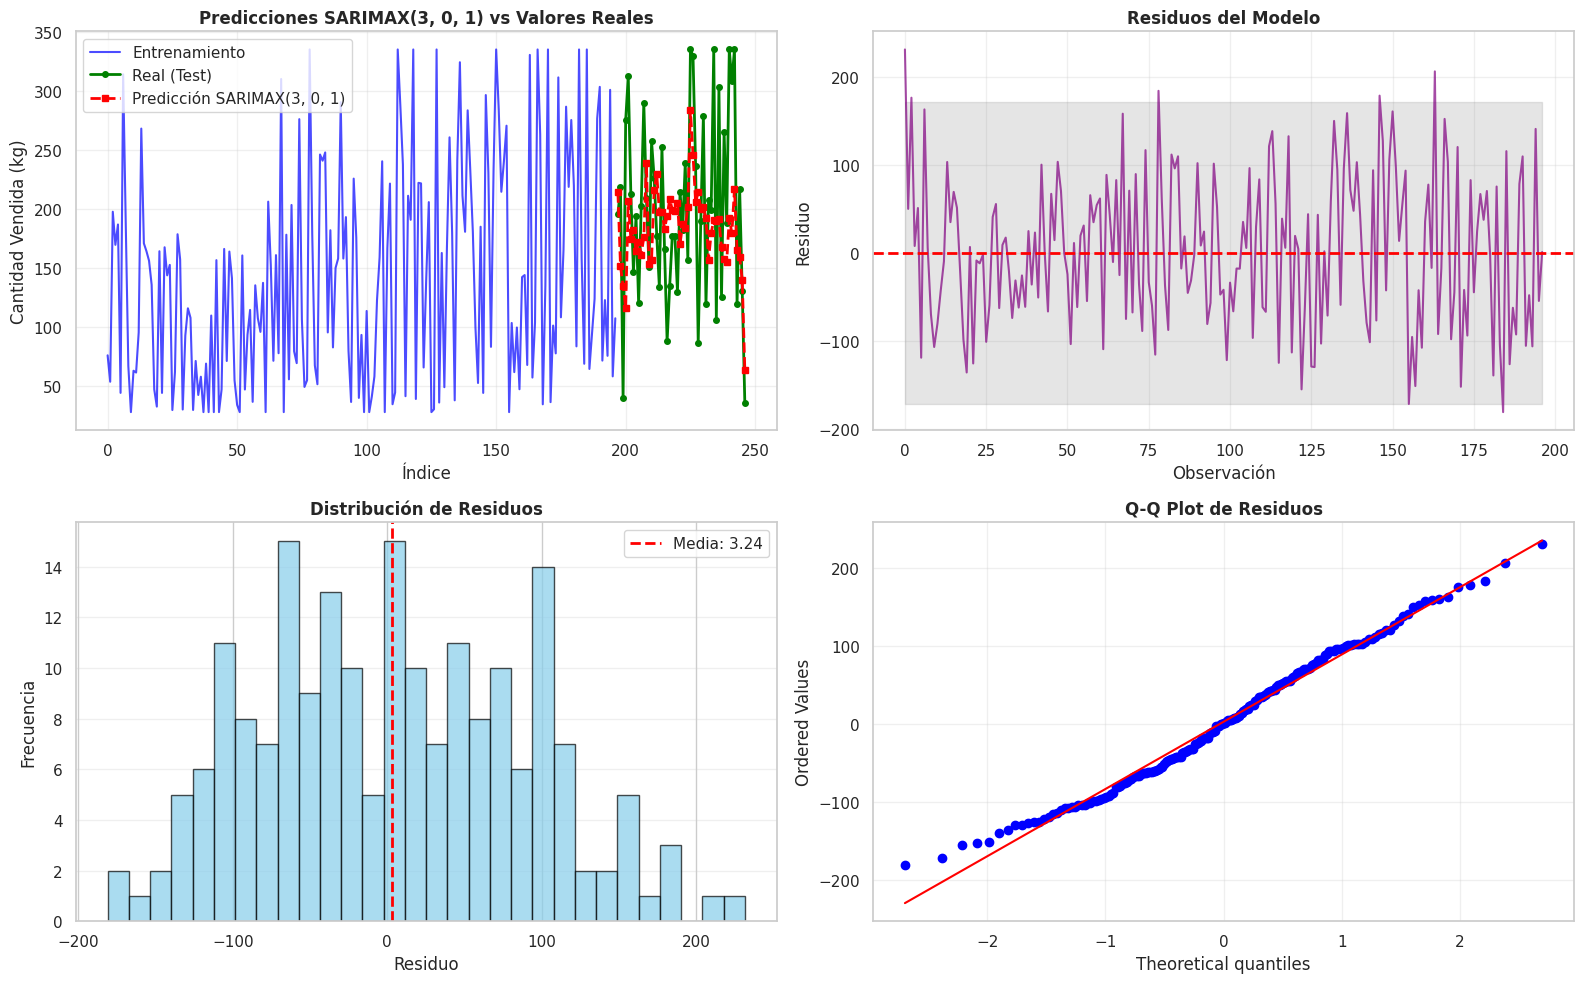

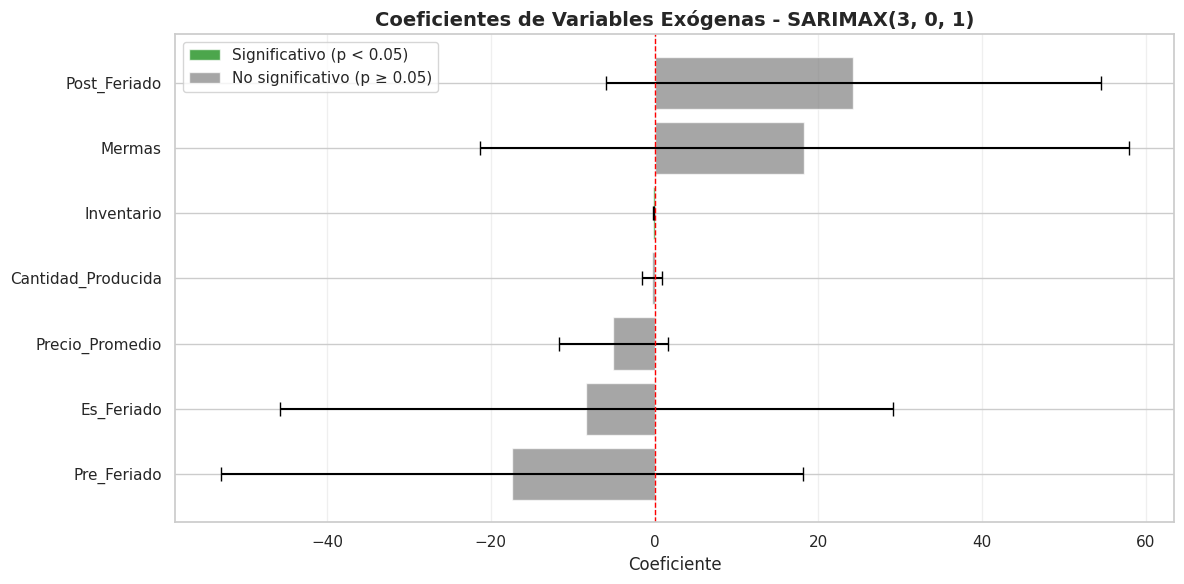


COMPARACIÓN: ARIMA(1,0,1) vs MEJOR SARIMAX
          Modelo       MAE  MAPE (%) Variables Exógenas
    ARIMA(1,0,1) 74.060000  42.48000                 No
SARIMAX(3, 0, 1) 62.186296  37.66938                 Sí

📊 Mejora respecto a ARIMA(1,0,1):
   MAE: +16.03% (mejora)
   MAPE: +11.32% (mejora)

✅ Las variables exógenas MEJORAN significativamente el modelo


PRIMERAS 10 PREDICCIONES DEL MEJOR MODELO

Primeras 10 predicciones vs valores reales:
 Fecha/Índice  Valor_Real  Predicción  Error  Error_Porcentual
          197      195.27      213.82 -18.55             -9.50
          198      218.20      151.45  66.75             30.59
          199       39.66      134.33 -94.67           -238.69
          200      274.90      116.25 158.65             57.71
          201      312.23      206.63 105.60             33.82
          202      212.29      174.15  38.14             17.97
          203      146.72      182.48 -35.76            -24.37
          204      193.56      163.95  29.61  

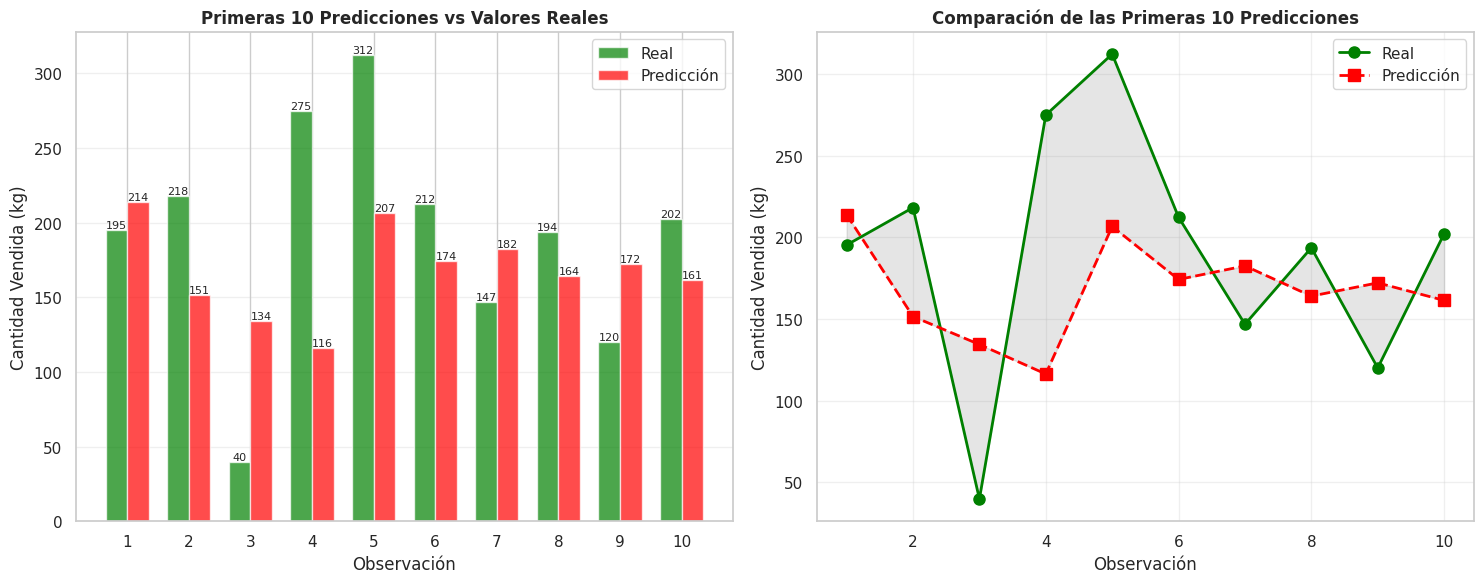


ANÁLISIS DE PRECISIÓN POR POSICIÓN DE PREDICCIÓN

Error por posición de predicción:
 Posición  Error_Abs  Error_Pct_Abs Subestimación
        1      18.55           9.50            Sí
        2      66.75          30.59            No
        3      94.67         238.69            Sí
        4     158.65          57.71            No
        5     105.60          33.82            No
        6      38.14          17.97            No
        7      35.76          24.37            Sí
        8      29.61          15.30            No
        9      52.09          43.41            Sí
       10      40.85          20.21            No

🎯 Mejor predicción: Posición 1 (Error: 9.50%)
❌ Peor predicción: Posición 3 (Error: 238.69%)

📈 Tendencia del modelo en las primeras 10 predicciones:
   Subestimaciones: 4 (40.0%)
   Sobreestimaciones: 6 (60.0%)
   → El modelo tiende a SOBREESTIMAR las ventas


PRONÓSTICO: Próximas 4 semanas (SARIMAX con exógenas)
197    91.30
198    77.12
199    78.49
200    79

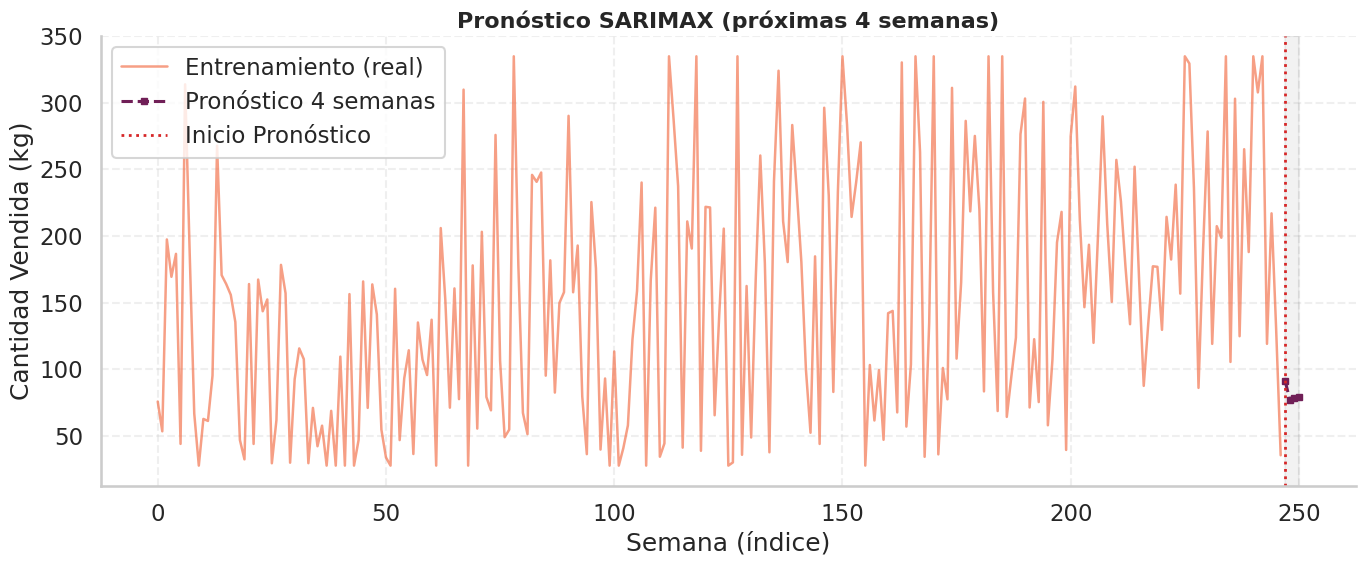

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 1. PREPARACIÓN DE DATOS


# Variable dependiente
y = df_winsorizado['Cantidad_Vendida']

# Variables exógenas
exog_vars = [
    'Cantidad_Producida',
    'Mermas',
    'Inventario',
    'Precio_Promedio',
    'Es_Feriado',
    'Pre_Feriado',
    'Post_Feriado'
]

X = df_winsorizado[exog_vars]

# Verificar que no hay valores nulos
print("="*80)
print("VERIFICACIÓN DE DATOS")
print("="*80)
print(f"\nValores nulos en Y: {y.isnull().sum()}")
print(f"Valores nulos en X:\n{X.isnull().sum()}")
print(f"\nDimensiones:")
print(f"Y: {y.shape}")
print(f"X: {X.shape}")

# Dividir en train/test (80-20)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

print(f"\nTamaño conjunto entrenamiento: {len(y_train)}")
print(f"Tamaño conjunto prueba: {len(y_test)}")


# 3. FUNCIÓN PARA AJUSTAR Y EVALUAR MODELOS SARIMAX


def ajustar_sarimax(y_train, y_test, X_train, X_test, order, seasonal_order=(0,0,0,0),
                    nombre_modelo="SARIMAX"):
    """
    Ajusta un modelo SARIMAX y retorna métricas de evaluación
    """
    try:
        # Ajustar modelo
        modelo = SARIMAX(
            y_train,
            exog=X_train,
            order=order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        modelo_fit = modelo.fit(disp=False, maxiter=200)

        # Predicciones
        pred = modelo_fit.forecast(steps=len(y_test), exog=X_test)

        # Métricas
        mae = mean_absolute_error(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mape = np.mean(np.abs((y_test - pred) / y_test)) * 100

        # Diagnóstico de residuos
        residuos = modelo_fit.resid
        lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
        lb_pvalue = lb_test['lb_pvalue'].values[0]

        jb_stat, jb_pvalue = stats.jarque_bera(residuos)
        skew = stats.skew(residuos)
        kurt = stats.kurtosis(residuos, fisher=False)

        return {
            'modelo_fit': modelo_fit,
            'predicciones': pred,
            'orden': order,
            'seasonal_order': seasonal_order,
            'AIC': modelo_fit.aic,
            'BIC': modelo_fit.bic,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape,
            'LB_pvalue': lb_pvalue,
            'JB_pvalue': jb_pvalue,
            'Skewness': skew,
            'Kurtosis': kurt,
            'N_params': len(modelo_fit.params)
        }

    except Exception as e:
        print(f"Error en {nombre_modelo}{order}: {str(e)}")
        return None


# 4. PROBAR DIFERENTES ÓRDENES DE SARIMAX


print("\n" + "="*80)
print("EVALUACIÓN DE MODELOS SARIMAX CON VARIABLES EXÓGENAS")
print("="*80)

# Órdenes a probar (basados en los mejores ARIMA previos)
ordenes_sarimax = [
    (1, 0, 2),
    (2, 0, 2),
    (3, 0, 1),
    (3, 0, 2),
]

resultados_sarimax = []

for orden in ordenes_sarimax:
    print(f"\nAjustando SARIMAX{orden}...", end=" ")
    resultado = ajustar_sarimax(y_train, y_test, X_train, X_test, orden)

    if resultado:
        resultados_sarimax.append(resultado)
        print(f"✓ AIC: {resultado['AIC']:.2f}, MAE: {resultado['MAE']:.2f}")
    else:
        print("✗ Error")

# 5. COMPARACIÓN DE RESULTADOS


df_resultados_sarimax = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ['modelo_fit', 'predicciones']}
    for r in resultados_sarimax
])

df_resultados_sarimax['Orden'] = df_resultados_sarimax.apply(
    lambda row: f"SARIMAX{row['orden']}", axis=1
)

print("\n" + "="*80)
print("RANKING DE MODELOS SARIMAX")
print("="*80)

# Top 5 por AIC
print("\nTOP 5 POR AIC:")
top5_aic = df_resultados_sarimax.nsmallest(5, 'AIC')[
    ['Orden', 'AIC', 'BIC', 'MAE', 'RMSE', 'MAPE', 'LB_pvalue', 'JB_pvalue']
]
print(top5_aic.to_string(index=False))

# Top 5 por MAE
print("\nTOP 5 POR MAE:")
top5_mae = df_resultados_sarimax.nsmallest(5, 'MAE')[
    ['Orden', 'AIC', 'BIC', 'MAE', 'RMSE', 'MAPE', 'LB_pvalue']
]
print(top5_mae.to_string(index=False))

# Top 5 por MAPE
print("\nTOP 5 POR MAPE:")
top5_mape = df_resultados_sarimax.nsmallest(5, 'MAPE')[
    ['Orden', 'AIC', 'MAE', 'MAPE', 'LB_pvalue', 'JB_pvalue']
]
print(top5_mape.to_string(index=False))


# 6. SELECCIÓN DEL MEJOR MODELO


# Filtrar modelos con residuos no autocorrelacionados
df_buenos = df_resultados_sarimax[df_resultados_sarimax['LB_pvalue'] > 0.05]

if len(df_buenos) > 0:
    mejor_modelo_info = df_buenos.nsmallest(1, 'AIC').iloc[0]
else:
    print("\n⚠️ Ningún modelo cumple con Ljung-Box. Seleccionando mejor por AIC...")
    mejor_modelo_info = df_resultados_sarimax.nsmallest(1, 'AIC').iloc[0]

print("\n" + "="*80)
print("🏆 MEJOR MODELO SARIMAX")
print("="*80)
print(f"\nModelo: {mejor_modelo_info['Orden']}")
print(f"AIC: {mejor_modelo_info['AIC']:.2f}")
print(f"BIC: {mejor_modelo_info['BIC']:.2f}")
print(f"MAE: {mejor_modelo_info['MAE']:.2f} kg")
print(f"RMSE: {mejor_modelo_info['RMSE']:.2f} kg")
print(f"MAPE: {mejor_modelo_info['MAPE']:.2f}%")
print(f"Ljung-Box p-value: {mejor_modelo_info['LB_pvalue']:.3f} {'✅' if mejor_modelo_info['LB_pvalue'] > 0.05 else '⚠️'}")
print(f"Jarque-Bera p-value: {mejor_modelo_info['JB_pvalue']:.3f} {'✅' if mejor_modelo_info['JB_pvalue'] > 0.05 else '⚠️'}")
print(f"Skewness: {mejor_modelo_info['Skewness']:.3f}")
print(f"Kurtosis: {mejor_modelo_info['Kurtosis']:.3f}")
print(f"Número de parámetros: {mejor_modelo_info['N_params']}")

# 7. ANÁLISIS DETALLADO DEL MEJOR MODELO


# Obtener el mejor modelo ajustado
mejor_idx = df_resultados_sarimax['AIC'].idxmin()
mejor_modelo_fit = resultados_sarimax[mejor_idx]['modelo_fit']
mejor_pred = resultados_sarimax[mejor_idx]['predicciones']

print("\n" + "="*80)
print("RESUMEN DETALLADO DEL MEJOR MODELO")
print("="*80)
print(mejor_modelo_fit.summary())

# Significancia de variables exógenas
print("\n" + "="*80)
print("SIGNIFICANCIA DE VARIABLES EXÓGENAS (p < 0.05)")
print("="*80)

params_df = pd.DataFrame({
    'Variable': mejor_modelo_fit.params.index,
    'Coeficiente': mejor_modelo_fit.params.values,
    'Std Error': mejor_modelo_fit.bse.values,
    'p-value': mejor_modelo_fit.pvalues.values,
    'Significativo': ['✅ Sí' if p < 0.05 else '❌ No' for p in mejor_modelo_fit.pvalues.values]
})

# Filtrar solo las variables exógenas
exog_params = params_df[params_df['Variable'].isin(exog_vars)]
print(exog_params.to_string(index=False))


# 8. VISUALIZACIONES


fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Predicciones vs Real
axes[0, 0].plot(y_train.index, y_train, label='Entrenamiento', color='blue', alpha=0.7)
axes[0, 0].plot(y_test.index, y_test, label='Real (Test)', color='green', linewidth=2, marker='o', markersize=4)
axes[0, 0].plot(y_test.index, mejor_pred, label=f'Predicción {mejor_modelo_info["Orden"]}',
                color='red', linewidth=2, linestyle='--', marker='s', markersize=4)
axes[0, 0].set_title(f'Predicciones {mejor_modelo_info["Orden"]} vs Valores Reales', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Índice')
axes[0, 0].set_ylabel('Cantidad Vendida (kg)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Tiempo
residuos = mejor_modelo_fit.resid
axes[0, 1].plot(residuos, color='purple', alpha=0.7)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].fill_between(range(len(residuos)),
                        -2*residuos.std(), 2*residuos.std(),
                        alpha=0.2, color='gray')
axes[0, 1].set_title('Residuos del Modelo', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Observación')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de residuos
axes[1, 0].hist(residuos, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].axvline(residuos.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {residuos.mean():.2f}')
axes[1, 0].set_title('Distribución de Residuos', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Residuo')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot
stats.probplot(residuos, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 9. GRÁFICO DE COEFICIENTES DE VARIABLES EXÓGENAS


# Extraer solo coeficientes de variables exógenas
exog_coef = params_df[params_df['Variable'].isin(exog_vars)].copy()
exog_coef = exog_coef.sort_values('Coeficiente')

plt.figure(figsize=(12, 6))
colors = ['green' if p < 0.05 else 'gray' for p in exog_coef['p-value']]
bars = plt.barh(exog_coef['Variable'], exog_coef['Coeficiente'], color=colors, alpha=0.7)

# Añadir barras de error
plt.errorbar(exog_coef['Coeficiente'], range(len(exog_coef)),
             xerr=1.96*exog_coef['Std Error'], fmt='none', color='black', capsize=5)

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coeficiente', fontsize=12)
plt.title(f'Coeficientes de Variables Exógenas - {mejor_modelo_info["Orden"]}',
          fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='Significativo (p < 0.05)'),
    Patch(facecolor='gray', alpha=0.7, label='No significativo (p ≥ 0.05)')
]
plt.legend(handles=legend_elements, loc='best')
plt.tight_layout()
plt.show()


# 10. COMPARACIÓN: MEJOR ARIMA vs MEJOR SARIMAX

print("\n" + "="*80)
print("COMPARACIÓN: ARIMA(1,0,1) vs MEJOR SARIMAX")
print("="*80)

# Datos del mejor ARIMA previo (ajustar según tus resultados)
arima_mae = 74.06  # Del análisis anterior
arima_mape = 42.48

mejora_mae = ((arima_mae - mejor_modelo_info['MAE']) / arima_mae) * 100
mejora_mape = ((arima_mape - mejor_modelo_info['MAPE']) / arima_mape) * 100

comparacion = pd.DataFrame({
    'Modelo': ['ARIMA(1,0,1)', mejor_modelo_info['Orden']],
    'MAE': [arima_mae, mejor_modelo_info['MAE']],
    'MAPE (%)': [arima_mape, mejor_modelo_info['MAPE']],
    'Variables Exógenas': ['No', 'Sí']
})

print(comparacion.to_string(index=False))

print(f"\n📊 Mejora respecto a ARIMA(1,0,1):")
print(f"   MAE: {mejora_mae:+.2f}% {'(mejora)' if mejora_mae > 0 else '(empeora)'}")
print(f"   MAPE: {mejora_mape:+.2f}% {'(mejora)' if mejora_mape > 0 else '(empeora)'}")

if mejora_mae > 0 and mejora_mape > 0:
    print("\n✅ Las variables exógenas MEJORAN significativamente el modelo")
elif mejora_mae < -5 or mejora_mape < -5:
    print("\n⚠️ Las variables exógenas EMPEORAN el modelo. Considerar usar ARIMA simple")
else:
    print("\n⚡ Las variables exógenas tienen impacto marginal. Evaluar trade-off complejidad vs mejora")

print("\n" + "="*80)


# 11. MOSTRAR PRIMERAS 10 PREDICCIONES


print("\n" + "="*80)
print("PRIMERAS 10 PREDICCIONES DEL MEJOR MODELO")
print("="*80)

# Crear DataFrame con las primeras 10 predicciones
n_mostrar = min(10, len(y_test))  # Por si hay menos de 10 en el conjunto de prueba

df_predicciones = pd.DataFrame({
    'Fecha/Índice': y_test.index[:n_mostrar],
    'Valor_Real': y_test.values[:n_mostrar],
    'Predicción': mejor_pred.values[:n_mostrar],
    'Error': y_test.values[:n_mostrar] - mejor_pred.values[:n_mostrar],
    'Error_Porcentual': ((y_test.values[:n_mostrar] - mejor_pred.values[:n_mostrar]) / y_test.values[:n_mostrar] * 100)
})

# Redondear para mejor visualización
df_predicciones['Valor_Real'] = df_predicciones['Valor_Real'].round(2)
df_predicciones['Predicción'] = df_predicciones['Predicción'].round(2)
df_predicciones['Error'] = df_predicciones['Error'].round(2)
df_predicciones['Error_Porcentual'] = df_predicciones['Error_Porcentual'].round(2)

print("\nPrimeras 10 predicciones vs valores reales:")
print(df_predicciones.to_string(index=False))

# Estadísticas de las primeras 10 predicciones
print(f"\n📊 Estadísticas de las primeras {n_mostrar} predicciones:")
print(f"   Error medio: {df_predicciones['Error'].mean():.2f} kg")
print(f"   Error absoluto medio: {df_predicciones['Error'].abs().mean():.2f} kg")
print(f"   Error porcentual medio: {df_predicciones['Error_Porcentual'].mean():.2f}%")
print(f"   MAPE primeras {n_mostrar}: {df_predicciones['Error_Porcentual'].abs().mean():.2f}%")


# 12. VISUALIZACIÓN DE LAS PRIMERAS 10 PREDICCIONES


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras comparativo
x_pos = np.arange(n_mostrar)
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, df_predicciones['Valor_Real'],
                     width, label='Real', color='green', alpha=0.7)
bars2 = axes[0].bar(x_pos + width/2, df_predicciones['Predicción'],
                     width, label='Predicción', color='red', alpha=0.7)

axes[0].set_xlabel('Observación')
axes[0].set_ylabel('Cantidad Vendida (kg)')
axes[0].set_title(f'Primeras {n_mostrar} Predicciones vs Valores Reales', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([f'{i+1}' for i in range(n_mostrar)])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}',
                    ha='center', va='bottom', fontsize=8)

# Gráfico de líneas con las primeras predicciones
axes[1].plot(range(1, n_mostrar+1), df_predicciones['Valor_Real'],
             marker='o', linewidth=2, markersize=8, label='Real', color='green')
axes[1].plot(range(1, n_mostrar+1), df_predicciones['Predicción'],
             marker='s', linewidth=2, markersize=8, label='Predicción',
             linestyle='--', color='red')

axes[1].set_xlabel('Observación')
axes[1].set_ylabel('Cantidad Vendida (kg)')
axes[1].set_title(f'Comparación de las Primeras {n_mostrar} Predicciones', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Añadir área sombreada para el error
axes[1].fill_between(range(1, n_mostrar+1),
                     df_predicciones['Valor_Real'],
                     df_predicciones['Predicción'],
                     alpha=0.2, color='gray', label='Error')

plt.tight_layout()
plt.show()

# 13. ANÁLISIS DE PRECISIÓN POR PREDICCIÓN


print("\n" + "="*80)
print("ANÁLISIS DE PRECISIÓN POR POSICIÓN DE PREDICCIÓN")
print("="*80)

# Calcular métricas por posición
df_precision = pd.DataFrame({
    'Posición': range(1, n_mostrar+1),
    'Error_Abs': df_predicciones['Error'].abs().values,
    'Error_Pct_Abs': df_predicciones['Error_Porcentual'].abs().values,
    'Subestimación': ['Sí' if e < 0 else 'No' for e in df_predicciones['Error'].values]
})

print("\nError por posición de predicción:")
print(df_precision.to_string(index=False))

# Identificar las mejores y peores predicciones
mejor_pred_idx = df_precision['Error_Pct_Abs'].idxmin() + 1
peor_pred_idx = df_precision['Error_Pct_Abs'].idxmax() + 1

print(f"\n🎯 Mejor predicción: Posición {mejor_pred_idx} (Error: {df_precision['Error_Pct_Abs'].min():.2f}%)")
print(f"❌ Peor predicción: Posición {peor_pred_idx} (Error: {df_precision['Error_Pct_Abs'].max():.2f}%)")

# Contar subestimaciones vs sobreestimaciones
n_subestimaciones = (df_predicciones['Error'] < 0).sum()
n_sobreestimaciones = (df_predicciones['Error'] > 0).sum()

print(f"\n📈 Tendencia del modelo en las primeras {n_mostrar} predicciones:")
print(f"   Subestimaciones: {n_subestimaciones} ({n_subestimaciones/n_mostrar*100:.1f}%)")
print(f"   Sobreestimaciones: {n_sobreestimaciones} ({n_sobreestimaciones/n_mostrar*100:.1f}%)")

if n_subestimaciones > n_sobreestimaciones:
    print("   → El modelo tiende a SUBESTIMAR las ventas")
elif n_sobreestimaciones > n_subestimaciones:
    print("   → El modelo tiende a SOBREESTIMAR las ventas")
else:
    print("   → El modelo está balanceado entre subestimaciones y sobreestimaciones")

print("\n" + "="*80)

# 14. PRONÓSTICO FUTURO (próximas 4 semanas) con exógenas


# 14.1: construir exógenas futuras (4 filas, mismo orden/columnas que exog_vars)
def build_future_exog(df_full, exog_cols, steps=4):
    """
    Crea X_future con 4 filas usando estrategia simple:
    - forward-fill de últimas observaciones para numéricos
    - si tienes feriados (Es_Feriado / Pre_Feriado / Post_Feriado) puedes
      ajustarlos manualmente aquí según tu calendario
    """
    last_rows = df_full[exog_cols].copy().tail(8)       # base de referencia
    X_future = pd.DataFrame(columns=exog_cols)

    # estrategia por defecto: mantener último valor (o promedio reciente)
    last_vals = last_rows.iloc[-1:].copy()
    mean_vals = last_rows.mean(numeric_only=True)

    for i in range(steps):
        row = last_vals.copy()
        # ejemplo alternativo: usa promedio reciente para suavizar
        # row.loc[:, :] = mean_vals.values

        # si tienes reglas para feriados, ajústalas aquí:
        # row['Es_Feriado'] = 0
        # row['Pre_Feriado'] = 0
        # row['Post_Feriado'] = 0

        X_future = pd.concat([X_future, row], ignore_index=True)

    # asegurar tipos numéricos y orden de columnas
    X_future = X_future[exog_cols].apply(pd.to_numeric, errors='coerce').fillna(method='ffill').fillna(0)
    return X_future

# crea X_future (4 semanas)
X_future = build_future_exog(df_winsorizado, exog_vars, steps=4)

# 14.2: pronóstico 4 pasos adelante
y_future_4w = mejor_modelo_fit.forecast(steps=4, exog=X_future)
print("\n" + "="*80)
print("PRONÓSTICO: Próximas 4 semanas (SARIMAX con exógenas)")
print("="*80)
print(pd.Series(y_future_4w).round(2))

# 14.3: armar índice temporal futuro usando ÍNDICE numérico
steps = 4  # por claridad
base_idx = len(df_winsorizado) - 1              # último índice real (p.ej., 246)
future_index = np.arange(base_idx + 1, base_idx + steps + 1)  # 247..250

# Tabla para el plot futuro
df_future_plot = pd.DataFrame({'Semana': future_index, 'Predicción': np.asarray(y_future_4w)})

# Histórico con el mismo eje (0..N-1)
x_hist = pd.DataFrame({
    'Semana': np.arange(len(df_winsorizado)),
    'Cantidad_Vendida': df_winsorizado['Cantidad_Vendida'].values
})

x_start_line = future_index[0]   # 247
x_span_end   = future_index[-1]  # 250

# 14.4: gráfico estilo SARIMAX con paleta 'rocket' (índice numérico)
sns.set_style("whitegrid")
sns.set_context("talk")
palette = sns.color_palette("rocket", 6)
c_hist = palette[4]
c_pred = palette[1]

plt.figure(figsize=(14,6))

# Histórico
plt.plot(x_hist['Semana'], x_hist['Cantidad_Vendida'],
         color=c_hist, linewidth=1.8, alpha=0.7, label='Entrenamiento (real)')

# Futuro
plt.plot(df_future_plot['Semana'], df_future_plot['Predicción'],
         color=c_pred, linestyle='--', marker='s', linewidth=2.2, markersize=4,
         label='Pronóstico 4 semanas')

# Línea vertical y sombreado
plt.axvline(x=x_start_line, color='tab:red', linestyle=':', linewidth=2, label='Inicio Pronóstico')
plt.axvspan(x_start_line, x_span_end, color='gray', alpha=0.10)

plt.title("Pronóstico SARIMAX (próximas 4 semanas)", fontsize=16, fontweight='bold')
plt.xlabel("Semana (índice)")
plt.ylabel("Cantidad Vendida (kg)")
plt.legend(frameon=True, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()



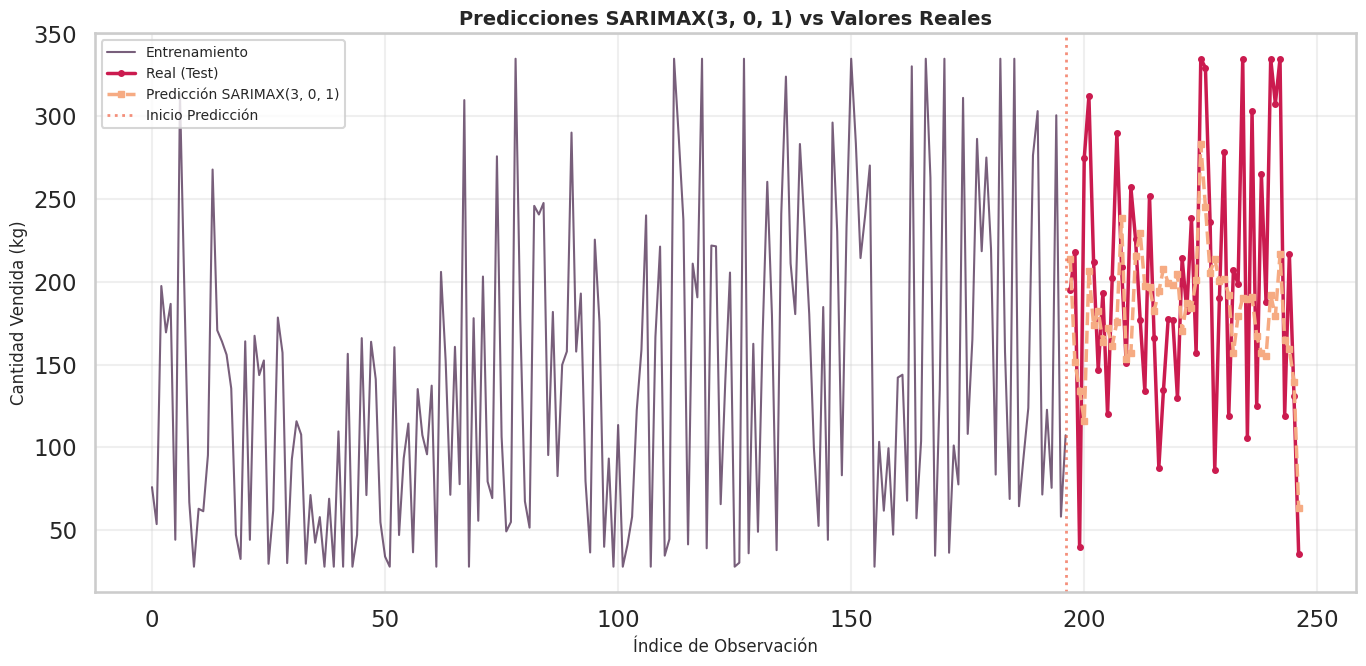

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# APLICAR ESTILO SEABORN ROCKSTAR


# Establecer el estilo de seaborn
sns.set_style("whitegrid")  # o "darkgrid", "white", "dark", "ticks"

# Usar la paleta de colores Rocket de seaborn
colores_rocket = sns.color_palette("rocket", n_colors=5)


# GRÁFICO CON COLORES ROCKET


plt.figure(figsize=(14, 7))

# Datos de entrenamiento - usar primer color de rocket
plt.plot(y_train.index, y_train,
         label='Entrenamiento',
         color=colores_rocket[0],  # Color rocket
         alpha=0.7,
         linewidth=1.5)

# Valores reales de test - usar segundo color
plt.plot(y_test.index, y_test,
         label='Real (Test)',
         color=colores_rocket[2],  # Color rocket
         linewidth=2.5,
         marker='o',
         markersize=4)

# Predicciones - usar tercer color
plt.plot(y_test.index, mejor_pred,
         label=f'Predicción {mejor_modelo_info["Orden"]}',
         color=colores_rocket[4],  # Color rocket
         linewidth=2.5,
         linestyle='--',
         marker='s',
         markersize=4)

# Línea vertical separando train/test
plt.axvline(x=y_train.index[-1],
            color=colores_rocket[3],  # Color rocket para la línea
            linestyle=':',
            linewidth=2,
            alpha=0.7,
            label='Inicio Predicción')

plt.title(f'Predicciones {mejor_modelo_info["Orden"]} vs Valores Reales',
          fontweight='bold',
          fontsize=14)
plt.xlabel('Índice de Observación', fontsize=12)
plt.ylabel('Cantidad Vendida (kg)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**MODELO XGBOOST**

In [ ]:
df_winsorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año_Semana          247 non-null    object        
 1   Año                 247 non-null    int32         
 2   Semana_Num          247 non-null    UInt32        
 3   Fecha               247 non-null    datetime64[ns]
 4   Cantidad_Producida  247 non-null    float64       
 5   Mermas              247 non-null    float64       
 6   Cantidad_Vendida    247 non-null    float64       
 7   Inventario          247 non-null    float64       
 8   Precio_Promedio     247 non-null    float64       
 9   Ventas_Total        247 non-null    float64       
 10  Es_Feriado          247 non-null    int64         
 11  Pre_Feriado         247 non-null    int64         
 12  Post_Feriado        247 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(6), int32

In [ ]:
df_winsorizado.head()

Año_Semana   Año  Semana_Num      Fecha  Cantidad_Producida  Mermas  \
0    2021-01  2021           1 2021-01-05               72.79  2.1837   
1    2021-02  2021           2 2021-01-11              228.72  6.5086   
2    2021-03  2021           3 2021-01-18              143.37  4.3011   
3    2021-04  2021           4 2021-01-25              196.70  5.9010   
4    2021-05  2021           5 2021-02-01               81.55  2.1095   

   Cantidad_Vendida  Inventario  Precio_Promedio  Ventas_Total  Es_Feriado  \
0             75.98    818.2863        17.892143       1014.76           0   
1             53.64    986.8577        17.919444        700.60           0   
2            197.53    928.3966        16.600000       1928.03           0   
3            169.52    949.6756        18.448485       1756.24           0   
4            186.74    842.3761        17.297222       2008.81           0   

   Pre_Feriado  Post_Feriado  
0            0             1  
1            0             0  
2            0             0  
3            0             0  
4            0             0

In [ ]:
df_winsorizado.describe()

Año  Semana_Num                          Fecha  \
count   247.000000       247.0                            247   
mean   2022.894737   25.631579  2023-05-16 14:46:09.230769152   
min    2021.000000         1.0            2021-01-05 00:00:00   
25%    2022.000000        13.0            2022-03-10 12:00:00   
50%    2023.000000        25.0            2023-05-15 00:00:00   
75%    2024.000000        38.0            2024-07-18 12:00:00   
max    2025.000000        52.0            2025-09-29 00:00:00   
std       1.375250   14.648382                            NaN   

       Cantidad_Producida      Mermas  Cantidad_Vendida   Inventario  \
count          247.000000  247.000000        247.000000   247.000000   
mean           159.099764    4.703199        152.754818   748.072557   
min              0.000000    0.000000         27.910000   110.098000   
25%             98.110000    2.693150         68.330000   609.334426   
50%            162.700000    4.787500        149.930000   787.923550   
75%            222.450000    6.634550        218.385000   906.277100   
max            446.150000   13.392100        334.890000  1309.684350   
std             97.834902    2.942029         92.896674   239.480485   

       Precio_Promedio  Ventas_Total  Es_Feriado  Pre_Feriado  Post_Feriado  
count       247.000000    247.000000  247.000000   247.000000    247.000000  
mean         15.033898   1768.647611    0.165992     0.153846      0.149798  
min           9.000000    103.040000    0.000000     0.000000      0.000000  
25%          13.648790    917.540000    0.000000     0.000000      0.000000  
50%          15.022222   1671.030000    0.000000     0.000000      0.000000  
75%          16.274464   2467.850000    0.000000     0.000000      0.000000  
max          23.000000   5042.040000    1.000000     1.000000      1.000000  
std           1.942409   1028.136957    0.372829     0.361534      0.357598

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

def plot_predictions(df, y_train, y_test, y_pred):
    """Genera gráfico de entrenamiento, prueba y predicciones."""
    # Crear un índice temporal coherente (puede ser fecha o número de semana)
    train_index = df.iloc[:len(y_train)].index
    test_index = df.iloc[len(y_train):].index

    plt.figure(figsize=(14,6))
    plt.plot(train_index, y_train, label="Entrenamiento (real)", color="gray", alpha=0.6)
    plt.plot(test_index, y_test, label="Prueba (real)", color="blue", linewidth=2)
    plt.plot(test_index, y_pred, label="Predicción XGBoost", color="red", linestyle="--", linewidth=2)

    plt.title("Predicción de Cantidad Vendida - XGBoost", fontsize=14)
    plt.xlabel("Índice temporal o semana")
    plt.ylabel("Cantidad vendida")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

def run_model(df):
    print("="*70)
    print("MODELO XGBOOST - PREDICCIÓN DE CANTIDAD VENDIDA")
    print("="*70)

    # Excluir variables no predictoras
    exclude_cols = ["Cantidad_Vendida", "Año_Semana"]
    X = df.drop(columns=[col for col in exclude_cols if col in df.columns])
    y = df["Cantidad_Vendida"]

    # Asegurar tipo numérico
    X = X.apply(pd.to_numeric, errors="coerce")
    X = X.fillna(0)

    # División de datos (mantiene orden temporal)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    print("Datos de entrenamiento:", X_train.shape)
    print("Datos de prueba:       ", X_test.shape)
    print("-"*70)

    # Crear y entrenar modelo
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluación
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("Métricas del modelo:")
    print(f"MAE:  {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²:   {r2:.3f}")
    print("-"*70)

    # Comparación de valores reales vs predichos
    comparison = pd.DataFrame({
        "Real": y_test.values,
        "Predicho": y_pred
    }).reset_index(drop=True)

    print("Ejemplo de predicciones:")
    print(comparison.head(10))

    # Generar gráfico
    plot_predictions(df, y_train, y_test, y_pred)

        # Ver estructura del booster
    booster = model.get_booster()

    # Parámetros del modelo
    print("Parámetros del modelo:")
    print(model.get_params())

    # Número de árboles
    print("Número de árboles:", len(booster.get_dump()))

    # Número total de nodos (≈ parámetros)
    num_nodes = sum([tree.count('\n') for tree in booster.get_dump()])
    print("Número total de nodos (≈ parámetros):", num_nodes)

    # Importancia de características
    importances = model.feature_importances_
    features = X_train.columns

    print("\nImportancia de características:")
    for f, imp in zip(features, importances):
        print(f"{f}: {imp:.4f}")

    return model, comparison, y_train, y_test, y_pred, X_train, X_test




MODELO XGBOOST - PREDICCIÓN DE CANTIDAD VENDIDA
Datos de entrenamiento: (197, 11)
Datos de prueba:        (50, 11)
----------------------------------------------------------------------
Métricas del modelo:
MAE:  20.082
RMSE: 25.706
R²:   0.890
----------------------------------------------------------------------
Ejemplo de predicciones:
     Real    Predicho
0  195.27  172.055145
1  218.20  208.644547
2   39.66   38.917023
3  274.90  261.603821
4  312.23  312.889282
5  212.29  222.571472
6  146.72  162.022964
7  193.56  192.183441
8  119.99  150.099594
9  202.17  257.320190


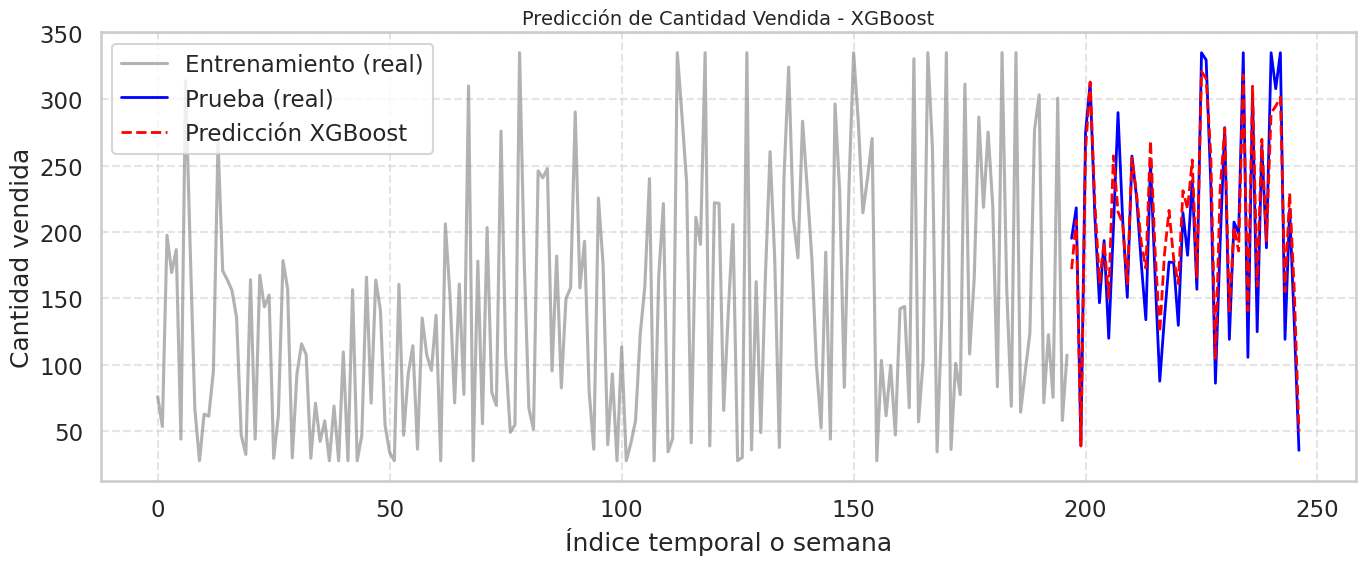

Parámetros del modelo:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Número de árboles: 300
Número total de nodos (≈ parámetros)

In [ ]:
results = run_model(df_winsorizado)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Helpers de calendario

def _ensure_fecha(df):
    df = df.copy()
    if 'Fecha' in df.columns and np.issubdtype(df['Fecha'].dtype, np.datetime64):
        return df
    # Si no hay Fecha, intentamos construirla desde Año y Semana_Num (lunes de esa ISO week)
    if {'Año','Semana_Num'}.issubset(df.columns):
        # Usamos ISO week: lunes de la semana
        df['Fecha'] = pd.to_datetime(df['Año'].astype(int).astype(str) + '-1', format='%G-%u') \
                        + pd.to_timedelta((df['Semana_Num'].astype(int)-1)*7, unit='D')
        return df
    # Si existe Año_Semana tipo "YYYY-ww"
    if 'Año_Semana' in df.columns:
        parts = df['Año_Semana'].astype(str).str.split('-', expand=True)
        if parts.shape[1] == 2:
            año = parts[0].astype(int)
            semana = parts[1].astype(int)
            df['Fecha'] = pd.to_datetime(año.astype(str) + '-1', format='%G-%u') \
                          + pd.to_timedelta((semana-1)*7, unit='D')
            return df
    raise ValueError("No se pudo determinar 'Fecha'. Proporciona 'Fecha' o ('Año','Semana_Num') o 'Año_Semana'.")

def _next_year_week(year:int, week:int):
    # Avanza una semana en calendario ISO (simplificado: 52->1, 53->1)
    week += 1
    if week > 53:  # por si hay año con semana 53
        week = 1
        year += 1
    if week > 52:  # mayoría de años
        # dejamos 53 por si tu data tiene esa semana; si no, lo mandamos a 1
        week = 1
        year += 1
    return year, week


# 2) Feature engineering

def build_features(df_raw):
    """
    Devuelve df con features consistentes para train y forecast.
    - Requiere 'Fecha' (datetime) y 'Cantidad_Vendida', 'Inventario', 'Mermas', 'Cantidad_Producida' (si existen).
    """
    df = _ensure_fecha(df_raw).copy()
    df = df.sort_values('Fecha').reset_index(drop=True)

    # Variables temporales
    df['Mes'] = df['Fecha'].dt.month
    df['Trimestre'] = df['Fecha'].dt.quarter
    df['Dia_Semana'] = df['Fecha'].dt.dayofweek
    # Semana ISO (número)
    df['Semana_Año'] = df['Fecha'].dt.isocalendar().week.astype(int)
    df['Año'] = df['Fecha'].dt.isocalendar().year.astype(int)
    # Tendencia simple
    df['Tendencia'] = np.arange(len(df))

    # Lags (si existe Cantidad_Vendida)
    if 'Cantidad_Vendida' in df.columns:
        for lag in [1,2,3,4]:
            df[f'Lag_{lag}'] = df['Cantidad_Vendida'].shift(lag)
        # Medias móviles basadas en rezagos
        df['MA_3'] = df['Cantidad_Vendida'].shift(1).rolling(3).mean()
        df['MA_6'] = df['Cantidad_Vendida'].shift(1).rolling(6).mean()

    # Ratios si hay columnas
    if {'Inventario','Cantidad_Vendida'}.issubset(df.columns):
        df['Ratio_Inv_Venta'] = df['Inventario'] / (df['Cantidad_Vendida'] + 1)
    else:
        df['Ratio_Inv_Venta'] = np.nan
    if {'Mermas','Cantidad_Producida'}.issubset(df.columns):
        df['Ratio_Mermas'] = df['Mermas'] / (df['Cantidad_Producida'] + 1)
    else:
        df['Ratio_Mermas'] = np.nan

    return df


# 3) Entrenar SIN la última semana y guardar columnas

def train_excluding_last(df_raw):
    df_feat = build_features(df_raw)

    # Excluir la última fila REAL del entrenamiento
    df_train = df_feat.iloc[:-1].copy()

    # Columnas a excluir SI existen
    exclude_cols = {'Cantidad_Vendida','Fecha','Año_Semana','Ventas_Total'}
    # Construimos X e y
    feature_cols = [c for c in df_train.columns if c not in exclude_cols]
    X_train = df_train[feature_cols].select_dtypes(include=[np.number]).fillna(0)
    y_train = df_train['Cantidad_Vendida']

    # Guardamos exactamente el listado de columnas numéricas usadas
    feature_cols_num = list(X_train.columns)

    # Modelo
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )

    model.fit(X_train, y_train)

    return model, feature_cols_num, df_feat


# 4) Forecast iterativo 4 semanas

def forecast_next_4_weeks_excluding_last(df_raw, weeks_ahead=4):
    model, feature_cols_num, df_feat = train_excluding_last(df_raw)

    # Partimos del df_feat ORIGINAL (incluye la última real), y vamos agregando semanas futuras
    df_forecast = df_feat.copy()

    preds = []
    for _ in range(weeks_ahead):
        # 4.1) Crear la fila "placeholder" de la próxima semana
        last_fecha = df_forecast['Fecha'].iloc[-1]
        next_fecha = last_fecha + pd.Timedelta(days=7)

        new_row = {col: np.nan for col in df_forecast.columns}
        new_row['Fecha'] = next_fecha

        # Si tienes Año y Semana_Num, actualízalos también (opcional)
        if {'Año','Semana_Num'}.issubset(df_forecast.columns):
            last_year = int(df_forecast['Año'].iloc[-1])
            last_week = int(df_forecast['Semana_Num'].iloc[-1]) if 'Semana_Num' in df_forecast.columns else int(df_forecast['Semana_Año'].iloc[-1])
            ny, nw = _next_year_week(last_year, last_week)
            new_row['Año'] = ny
            new_row['Semana_Num'] = nw

        # Añadir la fila vacía
        df_forecast = pd.concat([df_forecast, pd.DataFrame([new_row])], ignore_index=True)

        # 4.2) Recalcular features en TODO el df (ahora incluye la fila futura)
        df_forecast = build_features(df_forecast)

        # 4.3) Armar X_new con EXACTAS columnas usadas en el entrenamiento
        X_new = df_forecast.iloc[[-1]][feature_cols_num].select_dtypes(include=[np.number]).fillna(0)

        # 4.4) Predecir y asignar
        y_hat = float(model.predict(X_new)[0])
        preds.append({'Fecha': df_forecast['Fecha'].iloc[-1], 'Prediccion': y_hat})
        # Escribimos la predicción como Cantidad_Vendida para que la siguiente iteración tenga lags correctos
        df_forecast.loc[df_forecast.index[-1], 'Cantidad_Vendida'] = y_hat

    pred_df = pd.DataFrame(preds)
    # Si quieres Año-Semana legible:
    pred_df['Año_Semana'] = pred_df['Fecha'].dt.isocalendar().year.astype(str) + "-" + \
                            pred_df['Fecha'].dt.isocalendar().week.astype(str).str.zfill(2)
    return model, pred_df, feature_cols_num


# 5) (Opcional) Métricas de backtest con la cola real

def backtest_last_block(df_raw, model, feature_cols_num, test_size=8):
    """Evalúa el modelo en las últimas 'test_size' semanas previas a la última real utilizada."""
    df_feat = build_features(df_raw).dropna().reset_index(drop=True)
    if len(df_feat) <= test_size+1:
        print("Serie muy corta para backtest.")
        return None

    train_idx = len(df_feat) - test_size - 1  # -1 para excluir la última real del entrenamiento original
    df_train = df_feat.iloc[:train_idx]
    df_test  = df_feat.iloc[train_idx: -1]    # hasta la penúltima real

    X_test = df_test[feature_cols_num].select_dtypes(include=[np.number]).fillna(0)
    y_test = df_test['Cantidad_Vendida']
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Backtest últimas {test_size} semanas -> MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")
    return pd.DataFrame({'Fecha': df_test['Fecha'], 'Real': y_test.values, 'Predicho': y_pred})




In [ ]:
model, pred_4w, feature_cols = forecast_next_4_weeks_excluding_last(df_winsorizado, weeks_ahead=4)
print(pred_4w)


       Fecha  Prediccion Año_Semana
0 2025-10-06  285.524445    2025-41
1 2025-10-13  260.611267    2025-42
2 2025-10-20  261.168854    2025-43
3 2025-10-27  267.104431    2025-44


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def _ensure_fecha_col(df):
    df = df.copy()
    if 'Fecha' in df.columns and np.issubdtype(df['Fecha'].dtype, np.datetime64):
        return df
    if 'Año_Semana' in df.columns:
        parts = df['Año_Semana'].astype(str).str.split('-', expand=True)
        if parts.shape[1] == 2:
            year = parts[0].astype(int)
            week = parts[1].astype(int)
            df['Fecha'] = pd.to_datetime(year.astype(str) + '-1', format='%G-%u') \
                          + pd.to_timedelta((week-1)*7, unit='D')
            return df
    raise ValueError("Proporciona 'Fecha' (datetime) o 'Año_Semana' (YYYY-ww).")

def plot_history_with_forecast(df_hist, df_fore, y_col_hist='Cantidad_Vendida', y_col_fore='Prediccion'):
    df_hist = _ensure_fecha_col(df_hist)
    df_fore = _ensure_fecha_col(df_fore)

    plt.figure(figsize=(13,6))
    # línea histórico
    plt.plot(df_hist['Fecha'], df_hist[y_col_hist], label='Histórico (real)', linewidth=2)
    # línea forecast
    plt.plot(df_fore['Fecha'], df_fore[y_col_fore], label='Pronóstico (4 semanas)', linestyle='--', linewidth=2, marker='o')

    # sombreado del período futuro
    start_shade = df_fore['Fecha'].min()
    end_shade = df_fore['Fecha'].max()
    plt.axvspan(start_shade, end_shade, color='gray', alpha=0.15, label='Ventana de pronóstico')

    # anotaciones de puntos (opcional)
    for x, y in zip(df_fore['Fecha'], df_fore[y_col_fore]):
        plt.annotate(f"{y:.0f}", (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=9)

    plt.title('Histórico + Pronóstico 4 semanas', fontsize=14)
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad vendida')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

# USO:
# plot_history_with_forecast(df_winsorizado, pred_4w)


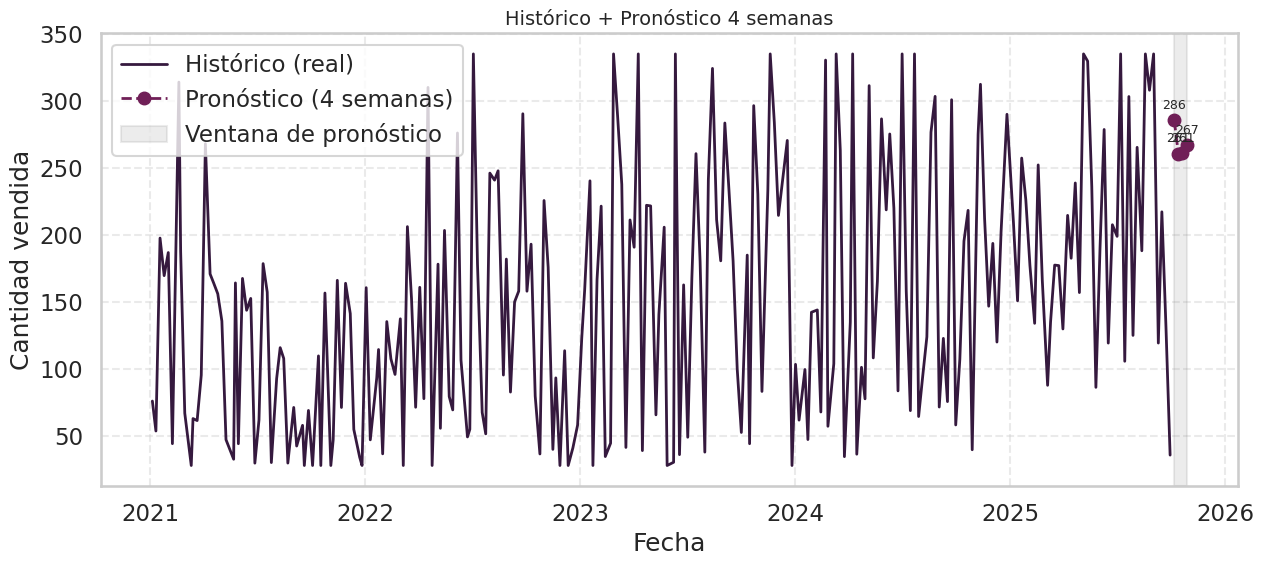

In [ ]:
plot_history_with_forecast(df_winsorizado, pred_4w)

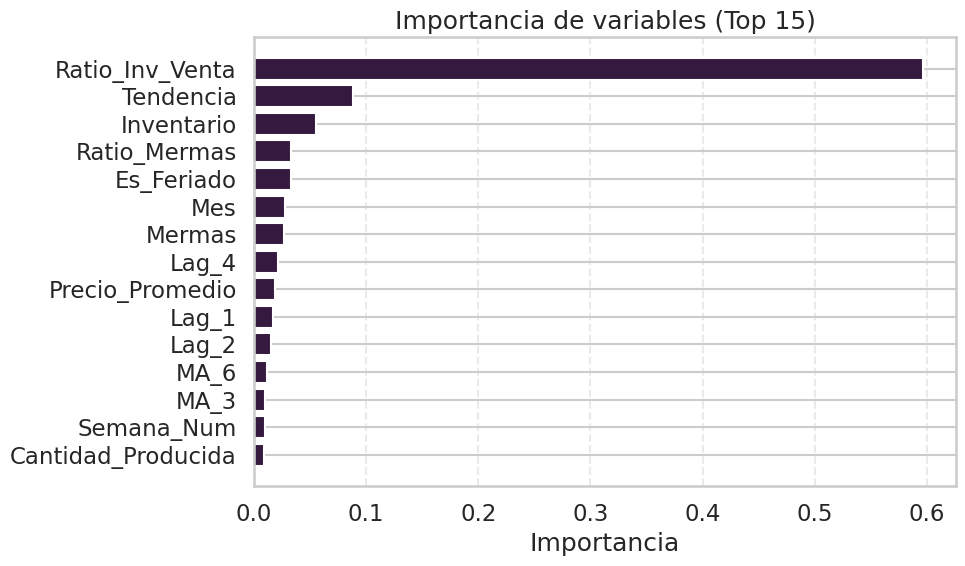

In [ ]:
def plot_feature_importance(model, feature_cols, top=15):
    import numpy as np
    import matplotlib.pyplot as plt

    importances = model.feature_importances_
    order = np.argsort(importances)[::-1][:top]
    feats = np.array(feature_cols)[order]
    vals = importances[order]

    plt.figure(figsize=(10,6))
    plt.barh(range(len(feats)), vals[::-1])
    plt.yticks(range(len(feats)), feats[::-1])
    plt.xlabel('Importancia')
    plt.title(f'Importancia de variables (Top {top})')
    plt.grid(True, axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# USO:
plot_feature_importance(model, feature_cols)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_xgboost_importance_all(model, top_n=15):
    """
    Visualiza las importancias de variables en un modelo XGBoost usando
    las métricas: weight, gain y cover. Usa Seaborn con paleta 'rocket'.
    """
    sns.set_theme(style="whitegrid", palette="rocket")

    # Obtener booster
    booster = model.get_booster()
    importance_types = ['weight', 'gain', 'cover']
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for idx, imp_type in enumerate(importance_types):
        # Obtener importancia
        importance_dict = booster.get_score(importance_type=imp_type)

        # Convertir a DataFrame ordenado
        importance_df = (
            pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
            .sort_values('Importance', ascending=False)
            .head(top_n)
        )

        # Graficar
        ax = axes[idx]
        sns.barplot(
            data=importance_df,
            y='Feature',
            x='Importance',
            ax=ax,
            palette="rocket"
        )
        ax.set_title(f"Top {top_n} Features - {imp_type.capitalize()}", fontsize=12, fontweight='bold')
        ax.set_xlabel('Importancia')
        ax.set_ylabel('')
        ax.invert_yaxis()

        # Anotar valores
        for i, val in enumerate(importance_df['Importance']):
            ax.text(val, i, f'{val:.2f}', va='center', fontsize=9)

    plt.suptitle("Importancia de Variables en XGBoost (weight, gain, cover)", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


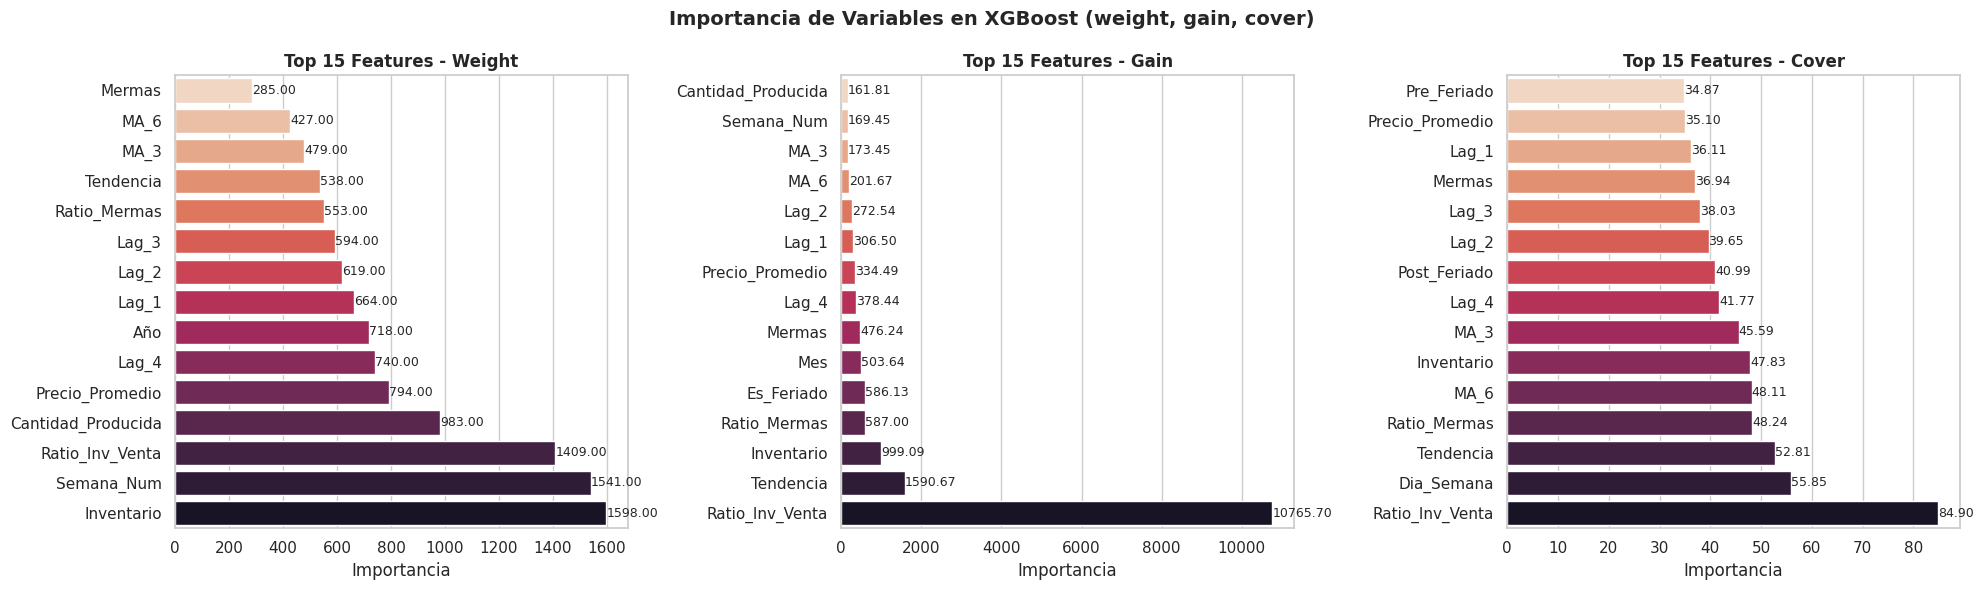

In [ ]:
plot_xgboost_importance_all(model, top_n=15)

In [ ]:
def show_forecast_table(pred_4w, round_to=2, export_csv=None):
    df = pred_4w.copy()
    if 'Prediccion' in df.columns:
        df['Prediccion'] = df['Prediccion'].round(round_to)
    if export_csv:
        df.to_csv(export_csv, index=False)
        print(f"✅ Exportado a {export_csv}")
    return df

# USO:
show_forecast_table(pred_4w, round_to=1, export_csv='forecast_4w.csv')


✅ Exportado a forecast_4w.csv


Fecha  Prediccion Año_Semana
0 2025-10-06       285.5    2025-41
1 2025-10-13       260.6    2025-42
2 2025-10-20       261.2    2025-43
3 2025-10-27       267.1    2025-44

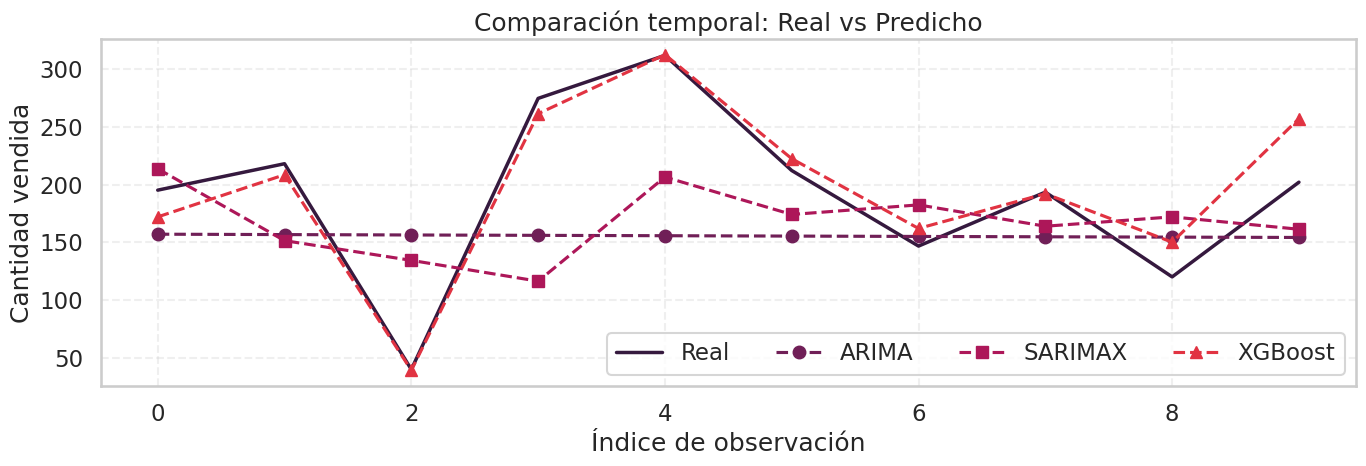

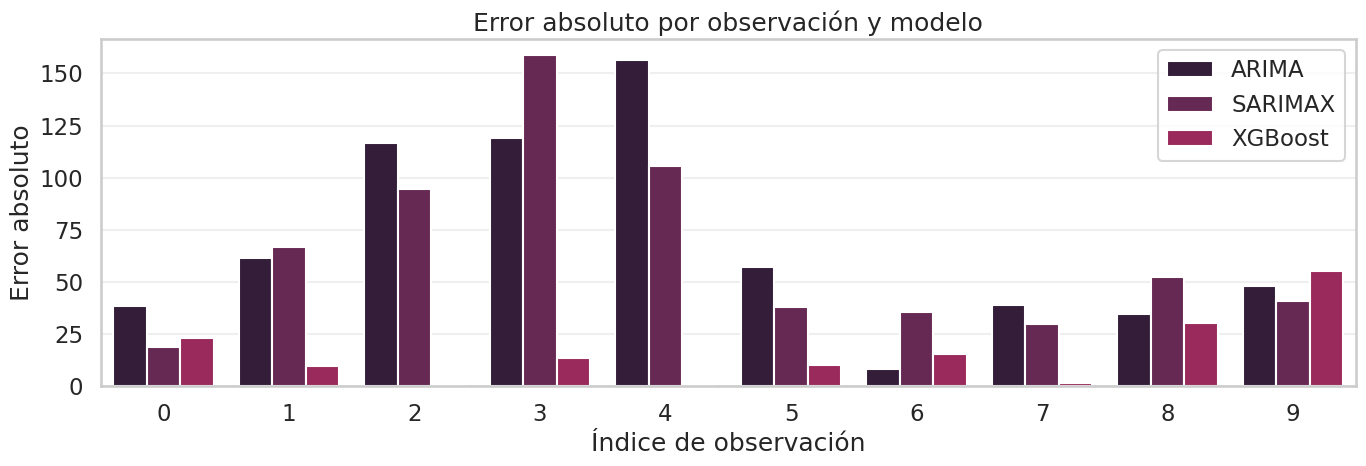

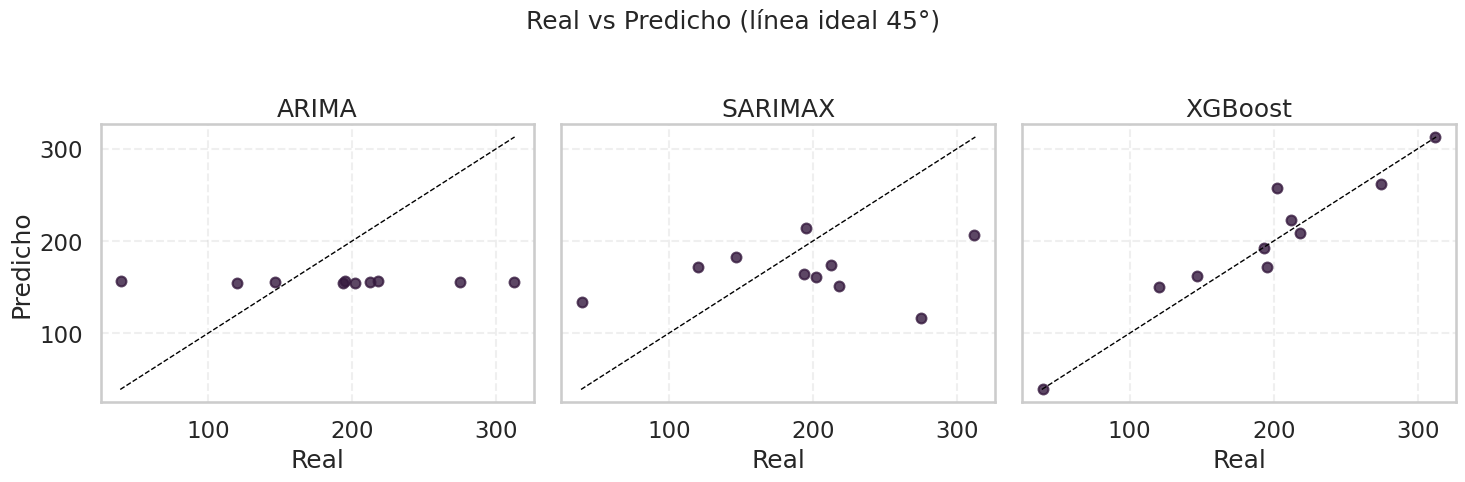

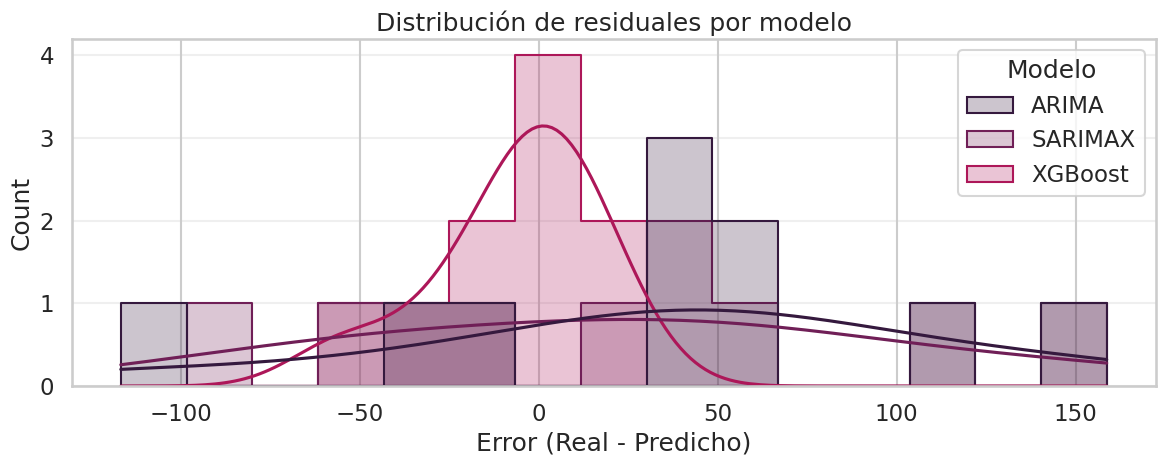

Métricas resumidas:
 Modelo   MAE  RMSE  MAPE (%)
XGBoost 15.97 22.58      9.15
SARIMAX 64.07 76.21     49.16
  ARIMA 67.83 81.11     54.04


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ejemplo de carga (opcional)
data = {
    "REAL":[195.27,218.20,39.66,274.90,312.23,212.29,146.72,193.56,119.99,202.17],
    "Prediccion_ARIMA":[157.04,156.70,156.36,156.04,155.72,155.40,155.09,154.79,154.50,154.21],
    "Predicción SARIMAX":[213.82,151.45,134.33,116.25,206.63,174.15,182.48,163.95,172.08,161.32],
    "XGBOOST":[172.06,208.64,38.92,261.60,312.89,222.57,162.02,192.18,150.10,257.32]
}
df = pd.DataFrame(data)

# Configuración visual
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("rocket")

# 1) Serie temporal: REAL vs modelos
def plot_series(df, save=None):
    idx = np.arange(len(df))
    plt.figure(figsize=(14,5))
    plt.plot(idx, df["REAL"], label="Real", linewidth=2.5)
    plt.plot(idx, df["Prediccion_ARIMA"], "--", marker="o", label="ARIMA")
    plt.plot(idx, df["Predicción SARIMAX"], "--", marker="s", label="SARIMAX")
    plt.plot(idx, df["XGBOOST"], "--", marker="^", label="XGBoost")
    plt.title("Comparación temporal: Real vs Predicho")
    plt.xlabel("Índice de observación")
    plt.ylabel("Cantidad vendida")
    plt.legend(ncol=4, frameon=True)
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    if save: plt.savefig(save, dpi=150, bbox_inches="tight")
    plt.show()

# 2) Errores absolutos por observación
def plot_abs_errors(df, save=None):
    err = pd.DataFrame({
        "Obs": np.arange(len(df)),
        "ARIMA": (df["REAL"]-df["Prediccion_ARIMA"]).abs(),
        "SARIMAX": (df["REAL"]-df["Predicción SARIMAX"]).abs(),
        "XGBoost": (df["REAL"]-df["XGBOOST"]).abs()
    })
    err_melt = err.melt(id_vars="Obs", var_name="Modelo", value_name="Error absoluto")
    plt.figure(figsize=(14,5))
    sns.barplot(data=err_melt, x="Obs", y="Error absoluto", hue="Modelo")
    plt.title("Error absoluto por observación y modelo")
    plt.xlabel("Índice de observación"); plt.ylabel("Error absoluto")
    plt.legend(frameon=True)
    plt.grid(alpha=0.3, axis="y")
    plt.tight_layout()
    if save: plt.savefig(save, dpi=150, bbox_inches="tight")
    plt.show()

# 3) Dispersión Real vs Predicho (con 45°)
def plot_scatter(df, save=None):
    fig, ax = plt.subplots(1,3, figsize=(15,4.8), sharex=True, sharey=True)
    modelos = [
        ("ARIMA", df["Prediccion_ARIMA"]),
        ("SARIMAX", df["Predicción SARIMAX"]),
        ("XGBoost", df["XGBOOST"]),
    ]
    lim_min = min(df["REAL"].min(), df[["Prediccion_ARIMA","Predicción SARIMAX","XGBOOST"]].min().min())
    lim_max = max(df["REAL"].max(), df[["Prediccion_ARIMA","Predicción SARIMAX","XGBOOST"]].max().max())
    for i,(name,yhat) in enumerate(modelos):
        ax[i].scatter(df["REAL"], yhat, s=50, alpha=0.8)
        ax[i].plot([lim_min, lim_max], [lim_min, lim_max], "k--", linewidth=1)  # línea 45°
        ax[i].set_title(name)
        ax[i].set_xlabel("Real")
        if i==0: ax[i].set_ylabel("Predicho")
        ax[i].grid(alpha=0.3, linestyle="--")
    fig.suptitle("Real vs Predicho (línea ideal 45°)", y=1.02, fontsize=18)
    plt.tight_layout()
    if save: plt.savefig(save, dpi=150, bbox_inches="tight")
    plt.show()

#  4) Distribución de errores (histogramas)
def plot_residuals(df, save=None):
    resid = pd.DataFrame({
        "ARIMA": df["REAL"]-df["Prediccion_ARIMA"],
        "SARIMAX": df["REAL"]-df["Predicción SARIMAX"],
        "XGBoost": df["REAL"]-df["XGBOOST"]
    })
    resid_melt = resid.melt(var_name="Modelo", value_name="Residual")
    plt.figure(figsize=(12,5))
    sns.histplot(data=resid_melt, x="Residual", hue="Modelo", kde=True, bins=15, element="step")
    plt.title("Distribución de residuales por modelo")
    plt.xlabel("Error (Real - Predicho)")
    plt.grid(alpha=0.3, axis="y")
    plt.tight_layout()
    if save: plt.savefig(save, dpi=150, bbox_inches="tight")
    plt.show()

#5) Tabla de métricas
def metrics_table(df):
    def mape(y, yhat):
        y = np.asarray(y); yhat = np.asarray(yhat)
        return np.mean(np.abs((y - yhat) / np.clip(y, 1e-6, None))) * 100
    met = pd.DataFrame({
        "Modelo":["ARIMA","SARIMAX","XGBoost"],
        "MAE":[
            np.mean(np.abs(df["REAL"]-df["Prediccion_ARIMA"])),
            np.mean(np.abs(df["REAL"]-df["Predicción SARIMAX"])),
            np.mean(np.abs(df["REAL"]-df["XGBOOST"])),
        ],
        "RMSE":[
            np.sqrt(np.mean((df["REAL"]-df["Prediccion_ARIMA"])**2)),
            np.sqrt(np.mean((df["REAL"]-df["Predicción SARIMAX"])**2)),
            np.sqrt(np.mean((df["REAL"]-df["XGBOOST"])**2)),
        ],
        "MAPE (%)":[
            mape(df["REAL"], df["Prediccion_ARIMA"]),
            mape(df["REAL"], df["Predicción SARIMAX"]),
            mape(df["REAL"], df["XGBOOST"]),
        ]
    }).sort_values("MAE")
    return met


plot_series(df)
plot_abs_errors(df)
plot_scatter(df)
plot_residuals(df)

print("Métricas resumidas:")
print(metrics_table(df).round(2).to_string(index=False))
